In [1]:
import pandas as pd
import os
from sys import platform
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pickle
import seaborn as sns
from minepy import MINE
%config InlineBackend.figure_format = 'retina'

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1.Raw Data Loading

In [116]:
dir_raw_data = '.\AnalyticExcercise_20180214.xlsx'

In [117]:
raw_data_df = pd.read_excel(dir_raw_data)

In [118]:
raw_data_df

ID   ST_CNTYNAME GENDER HISPANIC ETHNIC ETHNIC2  AGE_20161231 AGECAT7  SPELLAGE  INYEAR  SPELL      START       STOP  SPELLONE TYPE PLACE1 PLACE2          PLACE2_DATE LASTPLACE  LEVELCHG  NPLACES  MOVES  DISCH  RUNS  REENTER  DURAT      DURMO  DURCAT  RECAT EXIT  IM    IY    IYMO  OM    OY    OYMO
0     3000901899  PA_Allegheny      F        U     WH      WH            20       7        17    2014      1 2014-01-02 2014-04-29         1   SG    PSG                                   PSG         0        1      0      1     0        0    117   3.836066       3      6  XRF   1  2014  201401   4  2014  201404
1     3002061648  PA_Allegheny      M        U     BL      BL             7       3         4    2014      1 2014-01-03 2014-03-04         1   KC    PKC                                   PKC         0        1      0      1     0        0     60   1.967213       2      6  XRF   1  2014  201401   3  2014  201403
2     3002306442  PA_Allegheny      M        N     WH      WH             3       1         0    2014      1 2014-01-03 2014-02-25         1   KC    PKC                                   PKC         0        1      0      1     0        1     53   1.737705       2      1  XRF   1  2014  201401   2  2014  201402
3     3002012787  PA_Allegheny      M        N     BL      BL             6       3         4    2014      1 2014-01-06 2016-08-02         1   FC    PFC                                   PFC         0        1      0      1     0        0    939  30.786885       6      3  XLC   1  2014  201401   8  2016  201608
4     3002035176  PA_Allegheny      F        N     BL      BL             5       2         2    2014      1 2014-01-06 2016-08-02         1   KC    PKC                                   PKC         0        1      0      1     0        0    939  30.786885       6      3  XLC   1  2014  201401   8  2016  201608
...          ...           ...    ...      ...    ...     ...           ...     ...       ...     ...    ...        ...        ...       ...  ...    ...    ...                  ...       ...       ...      ...    ...    ...   ...      ...    ...        ...     ...    ...  ...  ..   ...     ...  ..   ...     ...
2844  3002607921  PA_Allegheny      M        N     WH      WH             2       2         2    2016      1 2016-12-27 2017-01-01         1   KC    PKC    PKC  2016-12-30 00:00:00       PKC         0        2      1      0     0        0      5   0.163934       1      0  ZTC  12  2016  201612   1  2017  201701
2845  3000416337  PA_Allegheny      M        N     BL      BL            14       6        14    2016      1 2016-12-30 2017-01-01         1   SG    PSG                                   PSG         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701
2846  3002142798  PA_Allegheny      F        N     BL      BL             5       3         5    2016      1 2016-12-30 2017-01-01         1   SF    PSF                                   PSF         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701
2847  3002490207  PA_Allegheny      M        N     WH      WH             2       2         2    2016      1 2016-12-30 2017-01-01         1   KC    PKC                                   PKC         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701
2848  3002490213  PA_Allegheny      M        N     WH      WH             2       2         2    2016      1 2016-12-30 2017-01-01         1   KC    PKC                                   PKC         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701

[2849 rows x 36 columns]

In [119]:
raw_data_df.shape

(2849, 36)

# 2. Data Ingestion

## 2.1 Feature Classification Based on Data Type

In [120]:
feature_list = list(raw_data_df.columns)
feature_list

['ID',
 'ST_CNTYNAME',
 'GENDER',
 'HISPANIC',
 'ETHNIC',
 'ETHNIC2',
 'AGE_20161231',
 'AGECAT7',
 'SPELLAGE',
 'INYEAR',
 'SPELL',
 'START',
 'STOP',
 'SPELLONE',
 'TYPE',
 'PLACE1',
 'PLACE2',
 'PLACE2_DATE',
 'LASTPLACE',
 'LEVELCHG',
 'NPLACES',
 'MOVES',
 'DISCH',
 'RUNS',
 'REENTER',
 'DURAT',
 'DURMO',
 'DURCAT',
 'RECAT',
 'EXIT',
 'IM',
 'IY',
 'IYMO',
 'OM',
 'OY',
 'OYMO']

In [121]:
len(feature_list)

36

In [122]:
raw_nominal_var = ['ID','ST_CNTYNAME','GENDER','HISPANIC','ETHNIC','ETHNIC2','SPELL','SPELLONE','TYPE','PLACE1','PLACE2', 'LASTPLACE','LEVELCHG','DISCH','REENTER','EXIT']
raw_ordinal_var = ['AGECAT7','DURCAT','RECAT']
raw_numerical_var = ['AGE_20161231','SPELLAGE','NPLACES','MOVES', 'RUNS','DURAT','DURMO']
raw_date_var = ['INYEAR', 'START','STOP', 'PLACE2_DATE','IM','IY','IYMO','OM','OY','OYMO']

In [123]:
len(raw_nominal_var)+len(raw_ordinal_var)+len(raw_numerical_var)+len(raw_date_var)

36

## 2.2 Data Missing (Space & NaN) and Imputation

In [279]:
data_df = raw_data_df.replace(' ',np.NaN)

In [280]:
data_df

ID   ST_CNTYNAME GENDER HISPANIC ETHNIC ETHNIC2  AGE_20161231  AGECAT7  SPELLAGE  INYEAR  SPELL      START       STOP  SPELLONE TYPE PLACE1 PLACE2          PLACE2_DATE LASTPLACE  LEVELCHG  NPLACES  MOVES  DISCH  RUNS  REENTER  DURAT      DURMO  DURCAT  RECAT EXIT  IM    IY    IYMO  OM    OY    OYMO
0     3000901899  PA_Allegheny      F        U     WH      WH            20      7.0        17    2014      1 2014-01-02 2014-04-29         1   SG    PSG    NaN                  NaN       PSG         0        1      0      1     0        0    117   3.836066       3      6  XRF   1  2014  201401   4  2014  201404
1     3002061648  PA_Allegheny      M        U     BL      BL             7      3.0         4    2014      1 2014-01-03 2014-03-04         1   KC    PKC    NaN                  NaN       PKC         0        1      0      1     0        0     60   1.967213       2      6  XRF   1  2014  201401   3  2014  201403
2     3002306442  PA_Allegheny      M        N     WH      WH             3      1.0         0    2014      1 2014-01-03 2014-02-25         1   KC    PKC    NaN                  NaN       PKC         0        1      0      1     0        1     53   1.737705       2      1  XRF   1  2014  201401   2  2014  201402
3     3002012787  PA_Allegheny      M        N     BL      BL             6      3.0         4    2014      1 2014-01-06 2016-08-02         1   FC    PFC    NaN                  NaN       PFC         0        1      0      1     0        0    939  30.786885       6      3  XLC   1  2014  201401   8  2016  201608
4     3002035176  PA_Allegheny      F        N     BL      BL             5      2.0         2    2014      1 2014-01-06 2016-08-02         1   KC    PKC    NaN                  NaN       PKC         0        1      0      1     0        0    939  30.786885       6      3  XLC   1  2014  201401   8  2016  201608
...          ...           ...    ...      ...    ...     ...           ...      ...       ...     ...    ...        ...        ...       ...  ...    ...    ...                  ...       ...       ...      ...    ...    ...   ...      ...    ...        ...     ...    ...  ...  ..   ...     ...  ..   ...     ...
2844  3002607921  PA_Allegheny      M        N     WH      WH             2      2.0         2    2016      1 2016-12-27 2017-01-01         1   KC    PKC    PKC  2016-12-30 00:00:00       PKC         0        2      1      0     0        0      5   0.163934       1      0  ZTC  12  2016  201612   1  2017  201701
2845  3000416337  PA_Allegheny      M        N     BL      BL            14      6.0        14    2016      1 2016-12-30 2017-01-01         1   SG    PSG    NaN                  NaN       PSG         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701
2846  3002142798  PA_Allegheny      F        N     BL      BL             5      3.0         5    2016      1 2016-12-30 2017-01-01         1   SF    PSF    NaN                  NaN       PSF         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701
2847  3002490207  PA_Allegheny      M        N     WH      WH             2      2.0         2    2016      1 2016-12-30 2017-01-01         1   KC    PKC    NaN                  NaN       PKC         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701
2848  3002490213  PA_Allegheny      M        N     WH      WH             2      2.0         2    2016      1 2016-12-30 2017-01-01         1   KC    PKC    NaN                  NaN       PKC         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701

[2849 rows x 36 columns]

In [281]:
data_df.shape

(2849, 36)

In [282]:
nan_count=data_df.isnull().sum(axis = 0)
nan_count.sort_values(ascending=False)

PLACE2_DATE     1799
PLACE2          1799
AGECAT7           20
ST_CNTYNAME        0
GENDER             0
HISPANIC           0
ETHNIC             0
ETHNIC2            0
AGE_20161231       0
OY                 0
INYEAR             0
SPELL              0
START              0
STOP               0
SPELLONE           0
TYPE               0
PLACE1             0
SPELLAGE           0
OYMO               0
LASTPLACE          0
DURCAT             0
OM                 0
IYMO               0
IY                 0
IM                 0
EXIT               0
RECAT              0
DURMO              0
LEVELCHG           0
DURAT              0
REENTER            0
RUNS               0
DISCH              0
MOVES              0
NPLACES            0
ID                 0
dtype: int64

In [283]:
data_df=data_df.fillna(0)
data_df

ID   ST_CNTYNAME GENDER HISPANIC ETHNIC ETHNIC2  AGE_20161231  AGECAT7  SPELLAGE  INYEAR  SPELL      START       STOP  SPELLONE TYPE PLACE1 PLACE2          PLACE2_DATE LASTPLACE  LEVELCHG  NPLACES  MOVES  DISCH  RUNS  REENTER  DURAT      DURMO  DURCAT  RECAT EXIT  IM    IY    IYMO  OM    OY    OYMO
0     3000901899  PA_Allegheny      F        U     WH      WH            20      7.0        17    2014      1 2014-01-02 2014-04-29         1   SG    PSG      0                    0       PSG         0        1      0      1     0        0    117   3.836066       3      6  XRF   1  2014  201401   4  2014  201404
1     3002061648  PA_Allegheny      M        U     BL      BL             7      3.0         4    2014      1 2014-01-03 2014-03-04         1   KC    PKC      0                    0       PKC         0        1      0      1     0        0     60   1.967213       2      6  XRF   1  2014  201401   3  2014  201403
2     3002306442  PA_Allegheny      M        N     WH      WH             3      1.0         0    2014      1 2014-01-03 2014-02-25         1   KC    PKC      0                    0       PKC         0        1      0      1     0        1     53   1.737705       2      1  XRF   1  2014  201401   2  2014  201402
3     3002012787  PA_Allegheny      M        N     BL      BL             6      3.0         4    2014      1 2014-01-06 2016-08-02         1   FC    PFC      0                    0       PFC         0        1      0      1     0        0    939  30.786885       6      3  XLC   1  2014  201401   8  2016  201608
4     3002035176  PA_Allegheny      F        N     BL      BL             5      2.0         2    2014      1 2014-01-06 2016-08-02         1   KC    PKC      0                    0       PKC         0        1      0      1     0        0    939  30.786885       6      3  XLC   1  2014  201401   8  2016  201608
...          ...           ...    ...      ...    ...     ...           ...      ...       ...     ...    ...        ...        ...       ...  ...    ...    ...                  ...       ...       ...      ...    ...    ...   ...      ...    ...        ...     ...    ...  ...  ..   ...     ...  ..   ...     ...
2844  3002607921  PA_Allegheny      M        N     WH      WH             2      2.0         2    2016      1 2016-12-27 2017-01-01         1   KC    PKC    PKC  2016-12-30 00:00:00       PKC         0        2      1      0     0        0      5   0.163934       1      0  ZTC  12  2016  201612   1  2017  201701
2845  3000416337  PA_Allegheny      M        N     BL      BL            14      6.0        14    2016      1 2016-12-30 2017-01-01         1   SG    PSG      0                    0       PSG         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701
2846  3002142798  PA_Allegheny      F        N     BL      BL             5      3.0         5    2016      1 2016-12-30 2017-01-01         1   SF    PSF      0                    0       PSF         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701
2847  3002490207  PA_Allegheny      M        N     WH      WH             2      2.0         2    2016      1 2016-12-30 2017-01-01         1   KC    PKC      0                    0       PKC         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701
2848  3002490213  PA_Allegheny      M        N     WH      WH             2      2.0         2    2016      1 2016-12-30 2017-01-01         1   KC    PKC      0                    0       PKC         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701

[2849 rows x 36 columns]

In [284]:
nan_count=data_df.isnull().sum(axis = 0)
nan_count.sort_values(ascending=False)

OYMO            0
OY              0
PLACE1          0
TYPE            0
SPELLONE        0
STOP            0
START           0
SPELL           0
INYEAR          0
SPELLAGE        0
AGECAT7         0
AGE_20161231    0
ETHNIC2         0
ETHNIC          0
HISPANIC        0
GENDER          0
ST_CNTYNAME     0
PLACE2          0
PLACE2_DATE     0
LASTPLACE       0
DURCAT          0
OM              0
IYMO            0
IY              0
IM              0
EXIT            0
RECAT           0
DURMO           0
LEVELCHG        0
DURAT           0
REENTER         0
RUNS            0
DISCH           0
MOVES           0
NPLACES         0
ID              0
dtype: int64

## 2.3 Distribution and Visualization for Each Feature and the Output Variable

### 2.3.1 Establishing our Output Variable——Whether the Second Spell Will Happen

In [285]:
raw_nominal_var = ['ID','ST_CNTYNAME','GENDER','HISPANIC','ETHNIC','ETHNIC2','SPELL','SPELLONE','TYPE','PLACE1','PLACE2', 'LASTPLACE','LEVELCHG','DISCH','REENTER','EXIT']
raw_ordinal_var = ['AGECAT7','DURCAT','RECAT']
raw_numerical_var = ['AGE_20161231','SPELLAGE','NPLACES','MOVES', 'RUNS','DURAT','DURMO']
raw_date_var = ['INYEAR', 'START','STOP', 'PLACE2_DATE','IM','IY','IYMO','OM','OY','OYMO']

In [286]:
data_df['PLACE2'][data_df['PLACE2']!=0].count()

1050

In [287]:
data_df['PLACE2'][data_df['PLACE2']==0].count()

1799

In [288]:
data_df['PLACE2'][data_df['PLACE2']!=0].count()/data_df.shape[0]

0.36855036855036855

Around 36.86% of children with one previous spell have entered the second spell. This is a relatively high ratio, which means this might be an interesting topic worth deeper researching.

In [289]:
data_df['Second Or Not'] = data_df['PLACE2'].apply(lambda x:x != 0)
data_df['Second Or Not'] 

0       False
1       False
2       False
3       False
4       False
        ...  
2844     True
2845    False
2846    False
2847    False
2848    False
Name: Second Or Not, Length: 2849, dtype: bool

In [290]:
data_df['Second Or Not'].value_counts()

False    1799
True     1050
Name: Second Or Not, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

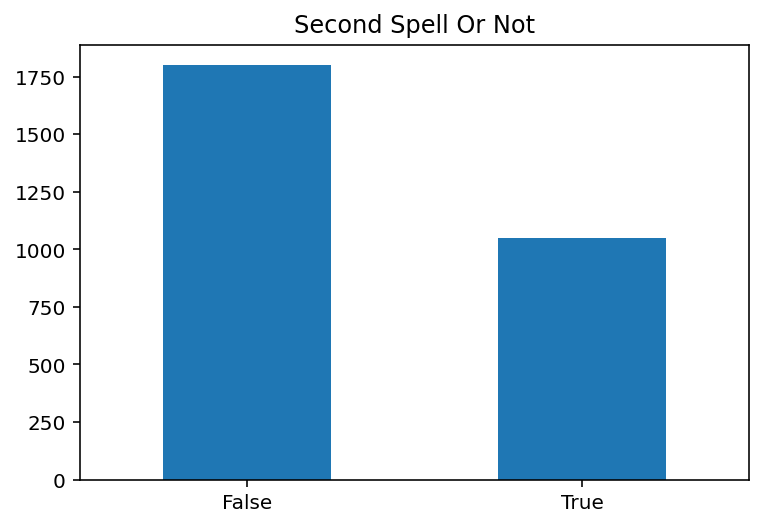

In [291]:
data_df['Second Or Not'].value_counts().plot(kind = 'bar')
plt.title('Second Spell Or Not')
plt.xticks(rotation = 0)

In [292]:
data_df['Second Or Not'] = data_df['Second Or Not'].astype(int)
data_df['Second Or Not']

0       0
1       0
2       0
3       0
4       0
       ..
2844    1
2845    0
2846    0
2847    0
2848    0
Name: Second Or Not, Length: 2849, dtype: int32

In [293]:
data_df

ID   ST_CNTYNAME GENDER HISPANIC ETHNIC ETHNIC2  AGE_20161231  AGECAT7  SPELLAGE  INYEAR  SPELL      START       STOP  SPELLONE TYPE PLACE1 PLACE2          PLACE2_DATE LASTPLACE  LEVELCHG  NPLACES  MOVES  DISCH  RUNS  REENTER  DURAT      DURMO  DURCAT  RECAT EXIT  IM    IY    IYMO  OM    OY    OYMO  Second Or Not
0     3000901899  PA_Allegheny      F        U     WH      WH            20      7.0        17    2014      1 2014-01-02 2014-04-29         1   SG    PSG      0                    0       PSG         0        1      0      1     0        0    117   3.836066       3      6  XRF   1  2014  201401   4  2014  201404              0
1     3002061648  PA_Allegheny      M        U     BL      BL             7      3.0         4    2014      1 2014-01-03 2014-03-04         1   KC    PKC      0                    0       PKC         0        1      0      1     0        0     60   1.967213       2      6  XRF   1  2014  201401   3  2014  201403              0
2     3002306442  PA_Allegheny      M        N     WH      WH             3      1.0         0    2014      1 2014-01-03 2014-02-25         1   KC    PKC      0                    0       PKC         0        1      0      1     0        1     53   1.737705       2      1  XRF   1  2014  201401   2  2014  201402              0
3     3002012787  PA_Allegheny      M        N     BL      BL             6      3.0         4    2014      1 2014-01-06 2016-08-02         1   FC    PFC      0                    0       PFC         0        1      0      1     0        0    939  30.786885       6      3  XLC   1  2014  201401   8  2016  201608              0
4     3002035176  PA_Allegheny      F        N     BL      BL             5      2.0         2    2014      1 2014-01-06 2016-08-02         1   KC    PKC      0                    0       PKC         0        1      0      1     0        0    939  30.786885       6      3  XLC   1  2014  201401   8  2016  201608              0
...          ...           ...    ...      ...    ...     ...           ...      ...       ...     ...    ...        ...        ...       ...  ...    ...    ...                  ...       ...       ...      ...    ...    ...   ...      ...    ...        ...     ...    ...  ...  ..   ...     ...  ..   ...     ...            ...
2844  3002607921  PA_Allegheny      M        N     WH      WH             2      2.0         2    2016      1 2016-12-27 2017-01-01         1   KC    PKC    PKC  2016-12-30 00:00:00       PKC         0        2      1      0     0        0      5   0.163934       1      0  ZTC  12  2016  201612   1  2017  201701              1
2845  3000416337  PA_Allegheny      M        N     BL      BL            14      6.0        14    2016      1 2016-12-30 2017-01-01         1   SG    PSG      0                    0       PSG         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701              0
2846  3002142798  PA_Allegheny      F        N     BL      BL             5      3.0         5    2016      1 2016-12-30 2017-01-01         1   SF    PSF      0                    0       PSF         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701              0
2847  3002490207  PA_Allegheny      M        N     WH      WH             2      2.0         2    2016      1 2016-12-30 2017-01-01         1   KC    PKC      0                    0       PKC         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701              0
2848  3002490213  PA_Allegheny      M        N     WH      WH             2      2.0         2    2016      1 2016-12-30 2017-01-01         1   KC    PKC      0                    0       PKC         0        1      0      0     0        0      2   0.065574       1      0  ZTC  12  2016  201612   1  2017  201701              0

[2849 rows x 37 columns]

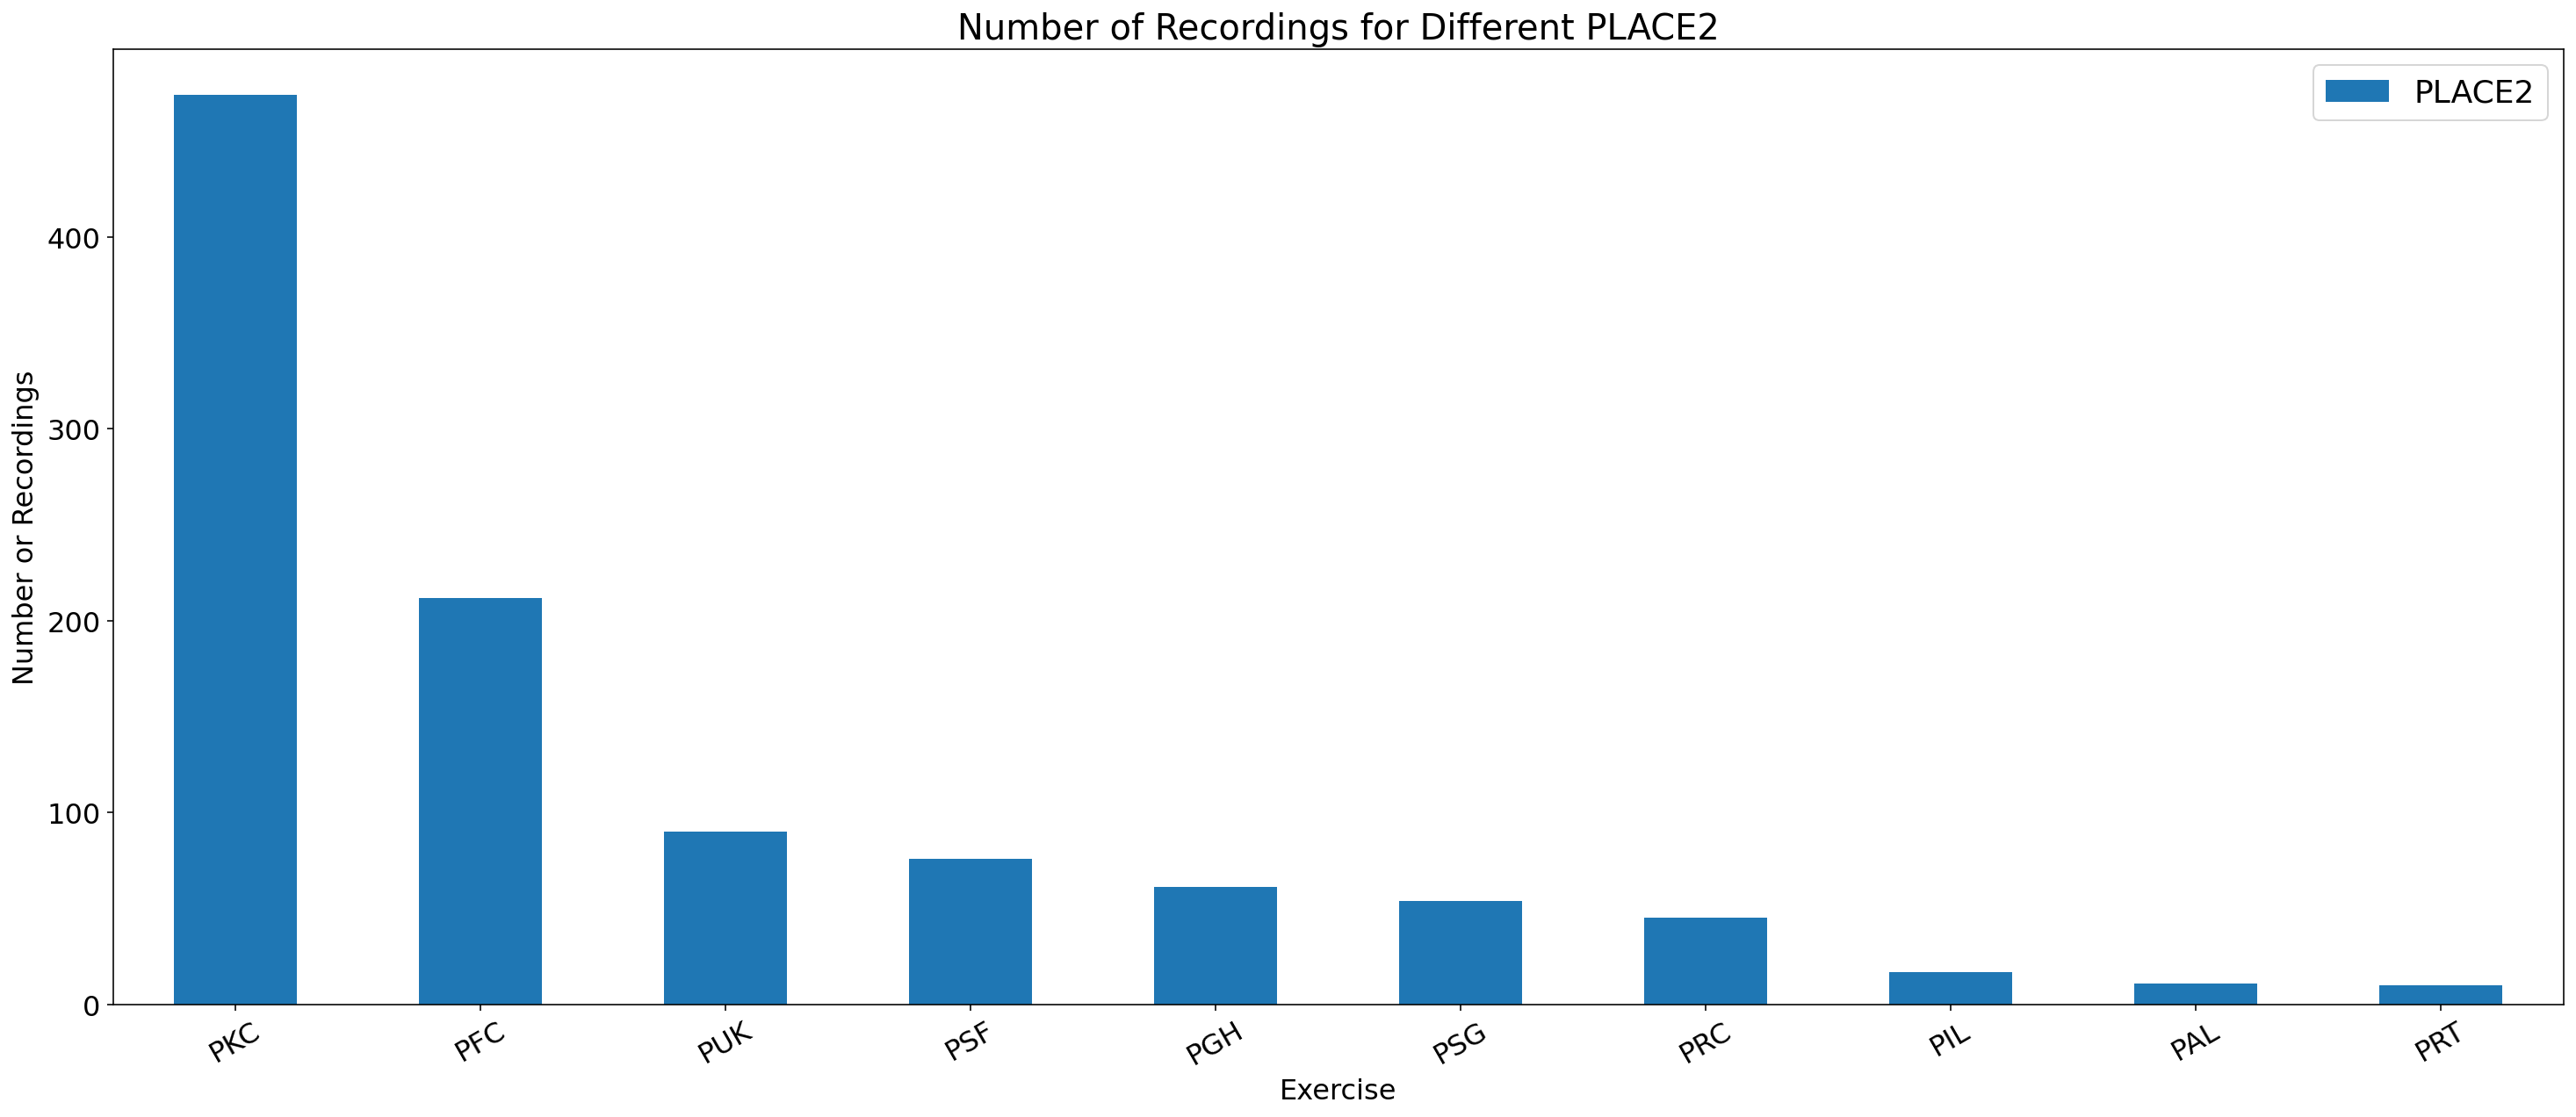

In [294]:
order = data_df['PLACE2'][data_df['PLACE2']!=0].value_counts()
order.to_dict()

fig,ax = plt.subplots(figsize=(25,10))
order.plot.bar()
ax.set_title('Number of Recordings for Different PLACE2',fontsize=20)
plt.xlabel('Exercise', fontsize=16)
plt.ylabel('Number or Recordings', fontsize=16)
ax.tick_params(axis='y', which='major', labelsize=16,rotation = 0)
ax.tick_params(axis='x', which='major', labelsize=16,rotation = 30)
plt.legend(loc='upper right',prop={'size': 18})

  ### 2.3.2 Distribution of Each Features on Y = 0 (No Second Spell) and Y = 1 (Second Spell)

#### Nominal Features

In [295]:
raw_nominal_var

['ID',
 'ST_CNTYNAME',
 'GENDER',
 'HISPANIC',
 'ETHNIC',
 'ETHNIC2',
 'SPELL',
 'SPELLONE',
 'TYPE',
 'PLACE1',
 'PLACE2',
 'LASTPLACE',
 'LEVELCHG',
 'DISCH',
 'REENTER',
 'EXIT']

In [296]:
data_df[raw_nominal_var].describe(include=['O'])

ST_CNTYNAME GENDER HISPANIC ETHNIC ETHNIC2  TYPE PLACE1  PLACE2 LASTPLACE  EXIT
count           2849   2849     2849   2849    2849  2849   2849    2849      2849  2849
unique             1      2        3      7       3    11     10      11        10    11
top     PA_Allegheny      M        N     BL      BL    KC    PKC       0       PKC   XRF
freq            2849   1454     2105   1243    1243  1514   1303    1799      1507  1306

In [297]:
data_df[raw_nominal_var].describe()

ID       SPELL     SPELLONE     LEVELCHG        DISCH      REENTER
count  2.849000e+03  2849.00000  2849.000000  2849.000000  2849.000000  2849.000000
mean   3.001924e+09     1.17901     0.861706     0.282555     0.627238     0.138294
std    6.894736e+05     0.50929     0.345269     0.450321     0.483625     0.345269
min    3.000001e+09     1.00000     0.000000     0.000000     0.000000     0.000000
25%    3.001722e+09     1.00000     1.000000     0.000000     0.000000     0.000000
50%    3.002200e+09     1.00000     1.000000     0.000000     1.000000     0.000000
75%    3.002396e+09     1.00000     1.000000     1.000000     1.000000     0.000000
max    3.002608e+09     6.00000     1.000000     1.000000     1.000000     1.000000

In [307]:
binary_var = []
for feature in raw_nominal_var :
    print(feature,':',data_df[feature].nunique())
    if data_df[feature].nunique() == 2:
        binary_var += [feature]
    print()

ID : 2458

ST_CNTYNAME : 1

GENDER : 2

HISPANIC : 3

ETHNIC : 7

ETHNIC2 : 3

SPELL : 6

SPELLONE : 2

TYPE : 11

PLACE1 : 10

PLACE2 : 11

LASTPLACE : 10

LEVELCHG : 2

DISCH : 2

REENTER : 2

EXIT : 11



In [308]:
binary_var

['GENDER', 'SPELLONE', 'LEVELCHG', 'DISCH', 'REENTER']

In [311]:
multi_var = set(raw_nominal_var) - set(binary_var)-set(['ST_CNTYNAME','ID'])
multi_var

{'ETHNIC',
 'ETHNIC2',
 'EXIT',
 'HISPANIC',
 'LASTPLACE',
 'PLACE1',
 'PLACE2',
 'SPELL',
 'TYPE'}

In [298]:
selected_nominal_features = [ 'GENDER',
 'HISPANIC',
 'ETHNIC',
 'ETHNIC2',
 'SPELL',
 'SPELLONE',
 'TYPE',
 'PLACE1',
 'PLACE2',
 'LASTPLACE',
 'LEVELCHG',
 'DISCH',
 'REENTER',
 'EXIT']

In [299]:
for feature in selected_nominal_features :
    print(data_df[feature].value_counts())
    print()

M    1454
F    1395
Name: GENDER, dtype: int64

N    2105
U     650
Y      94
Name: HISPANIC, dtype: int64

BL    1243
WH     996
UK     249
MU     190
OT     163
AS       6
AN       2
Name: ETHNIC, dtype: int64

BL    1243
WH     996
OT     610
Name: ETHNIC2, dtype: int64

1    2455
2     310
3      62
4      14
5       6
6       2
Name: SPELL, dtype: int64

1    2455
0     394
Name: SPELLONE, dtype: int64

KC    1514
FC     470
SG     281
SF     268
GH      85
UK      64
RC      52
AL      48
MX      32
IL      20
RT      15
Name: TYPE, dtype: int64

PKC    1303
PSF     502
PFC     435
PSG     419
PAL      68
PGH      60
PRC      27
PUK      21
PIL       7
PRT       7
Name: PLACE1, dtype: int64

0      1799
PKC     474
PFC     212
PUK      90
PSF      76
PGH      61
PSG      54
PRC      45
PIL      17
PAL      11
PRT      10
Name: PLACE2, dtype: int64

PKC    1507
PFC     484
PSG     272
PSF     247
PGH     100
PUK      88
PRC      63
PAL      48
PIL      28
PRT      12
Name: LASTPLA

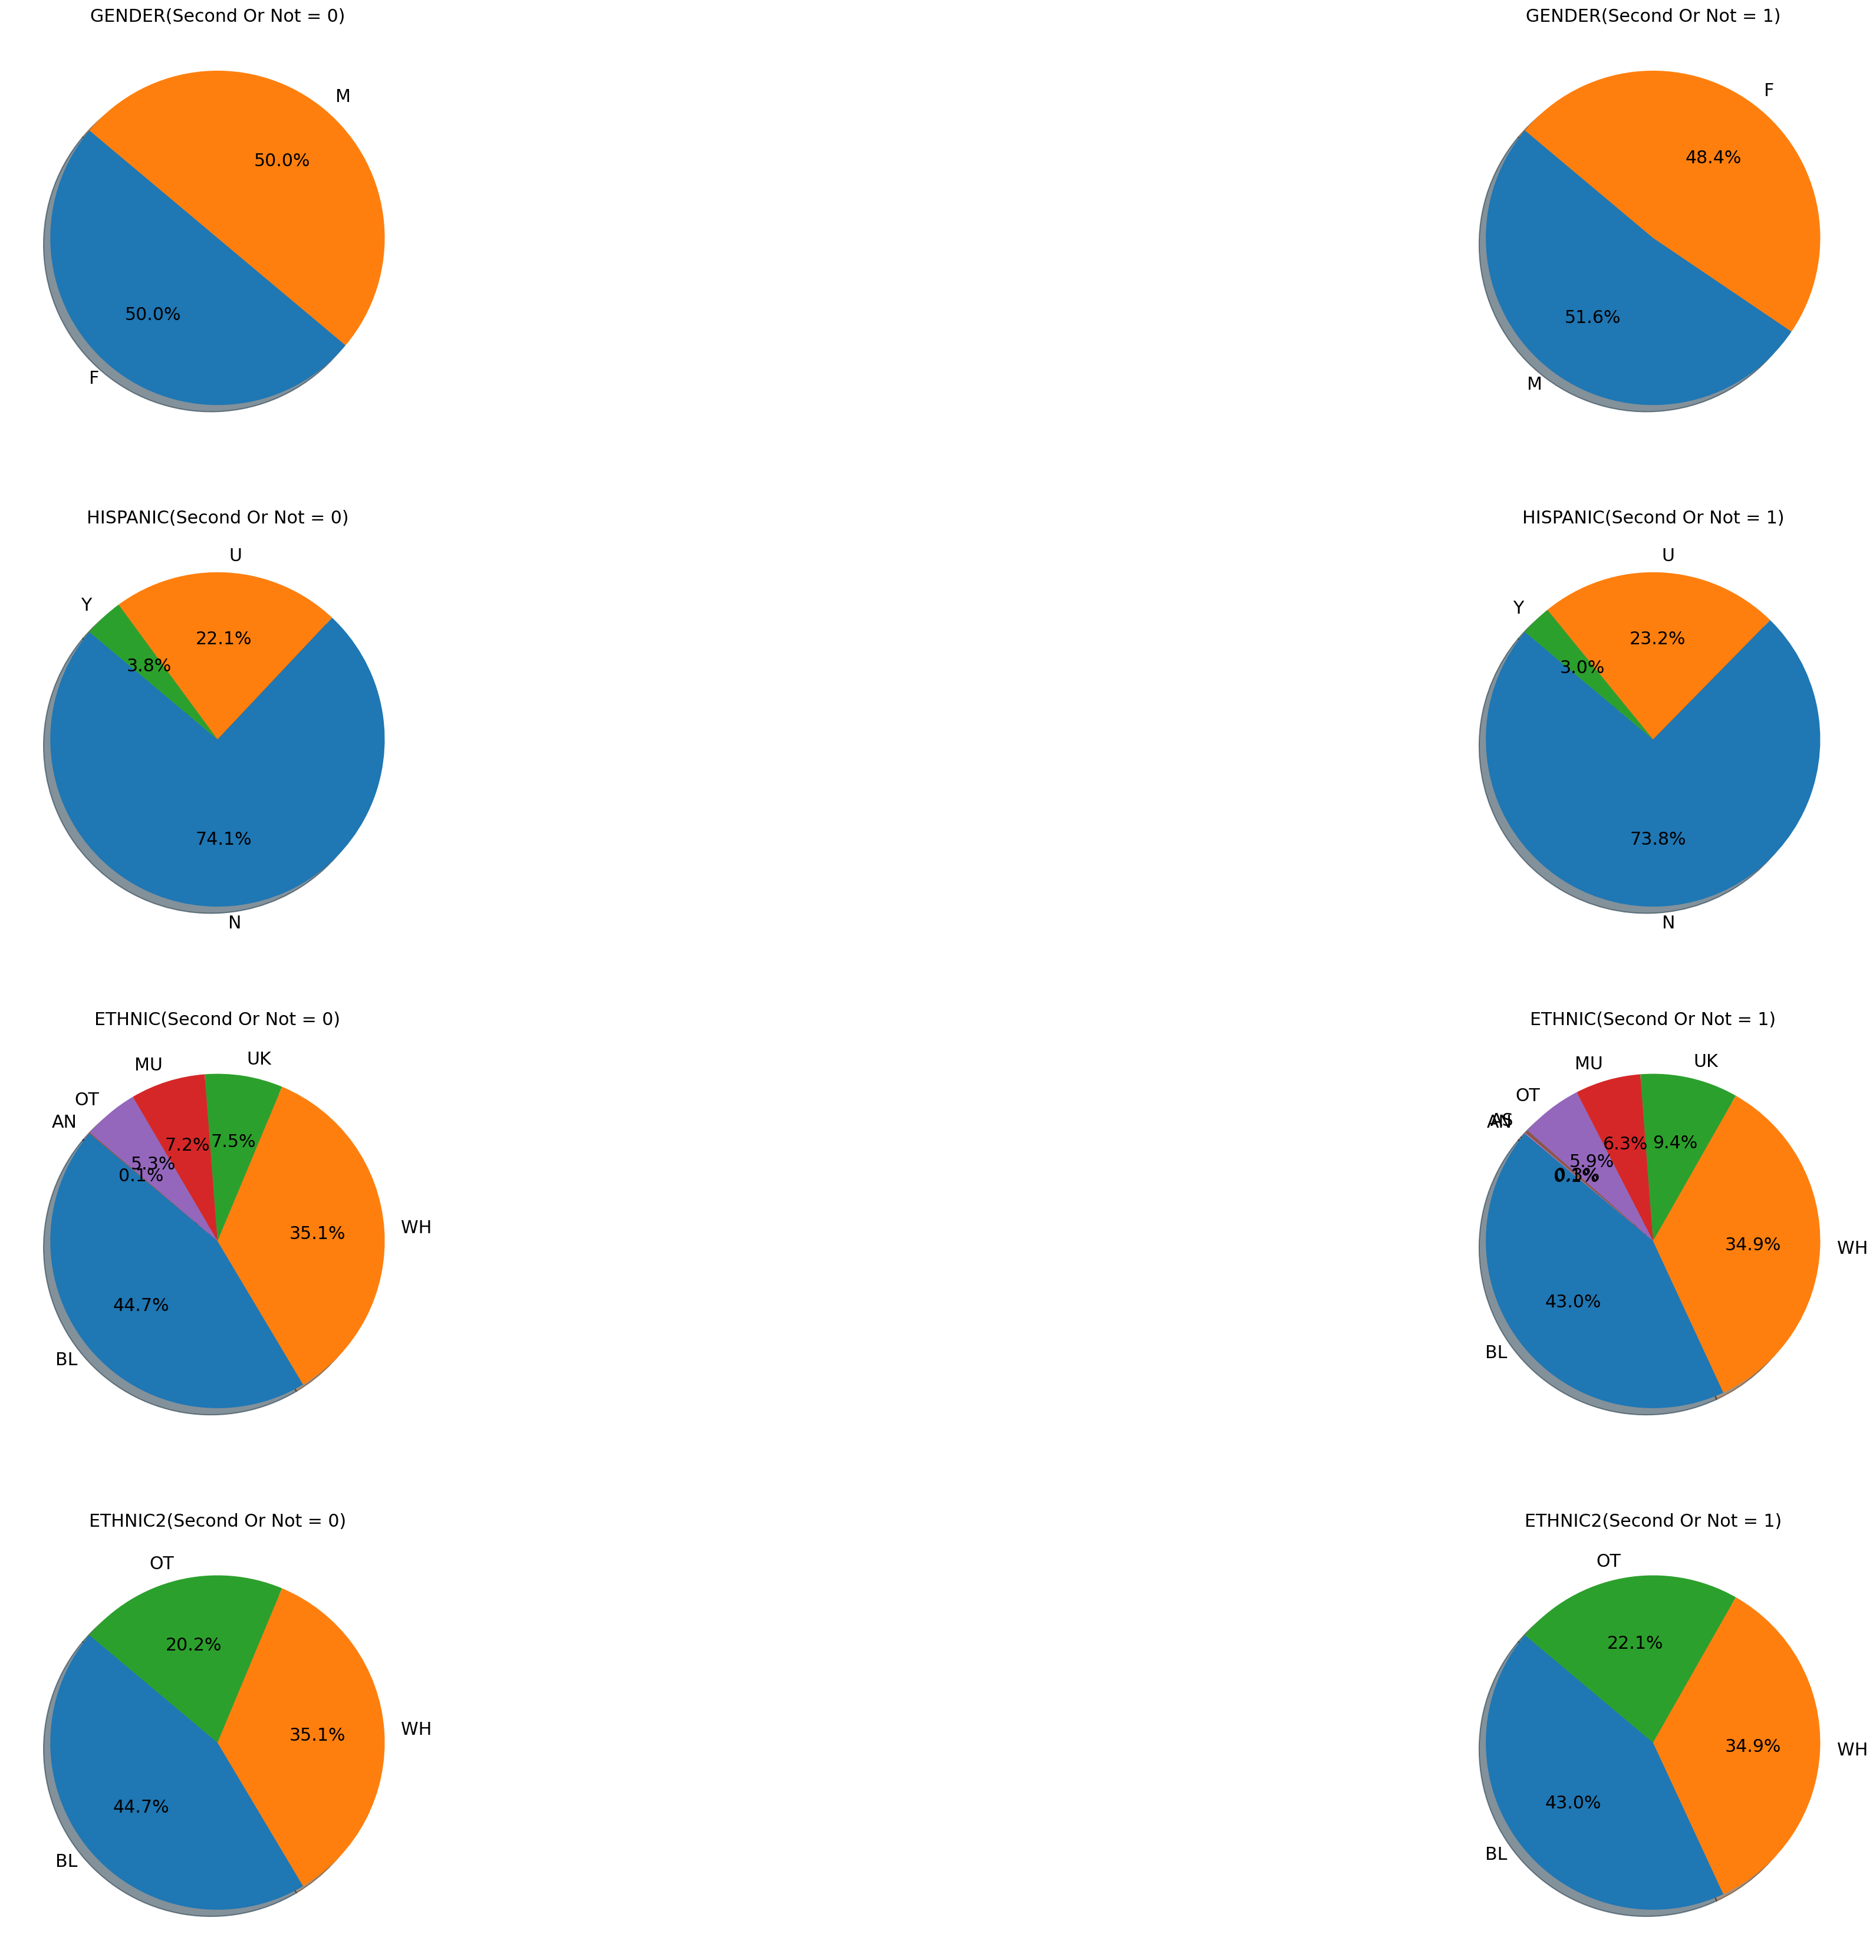

In [38]:
fig = plt.figure(figsize = (40,30))
                            
count = 1
for col in selected_nominal_features[:4]:
    ax = fig.add_subplot(4,2,count)
    count_series = data_df[data_df['Second Or Not']==1][col].value_counts()
    labels = count_series .index
    values = count_series .values
    plt.pie(count_series, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140,textprops={'fontsize': 15})
    title = col + '(Second Or Not = '+str(0)+')'
    plt.title(title,fontsize = 15)
    count +=1
    ax = fig.add_subplot(4,2,count)
    count_series = data_df[data_df['Second Or Not']==0][col].value_counts()
    labels = count_series .index
    values = count_series .values
    plt.pie(count_series, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140,textprops={'fontsize': 15})
    title = col + '(Second Or Not = '+str(1)+')'
    plt.title(title,fontsize = 15)
    count +=1

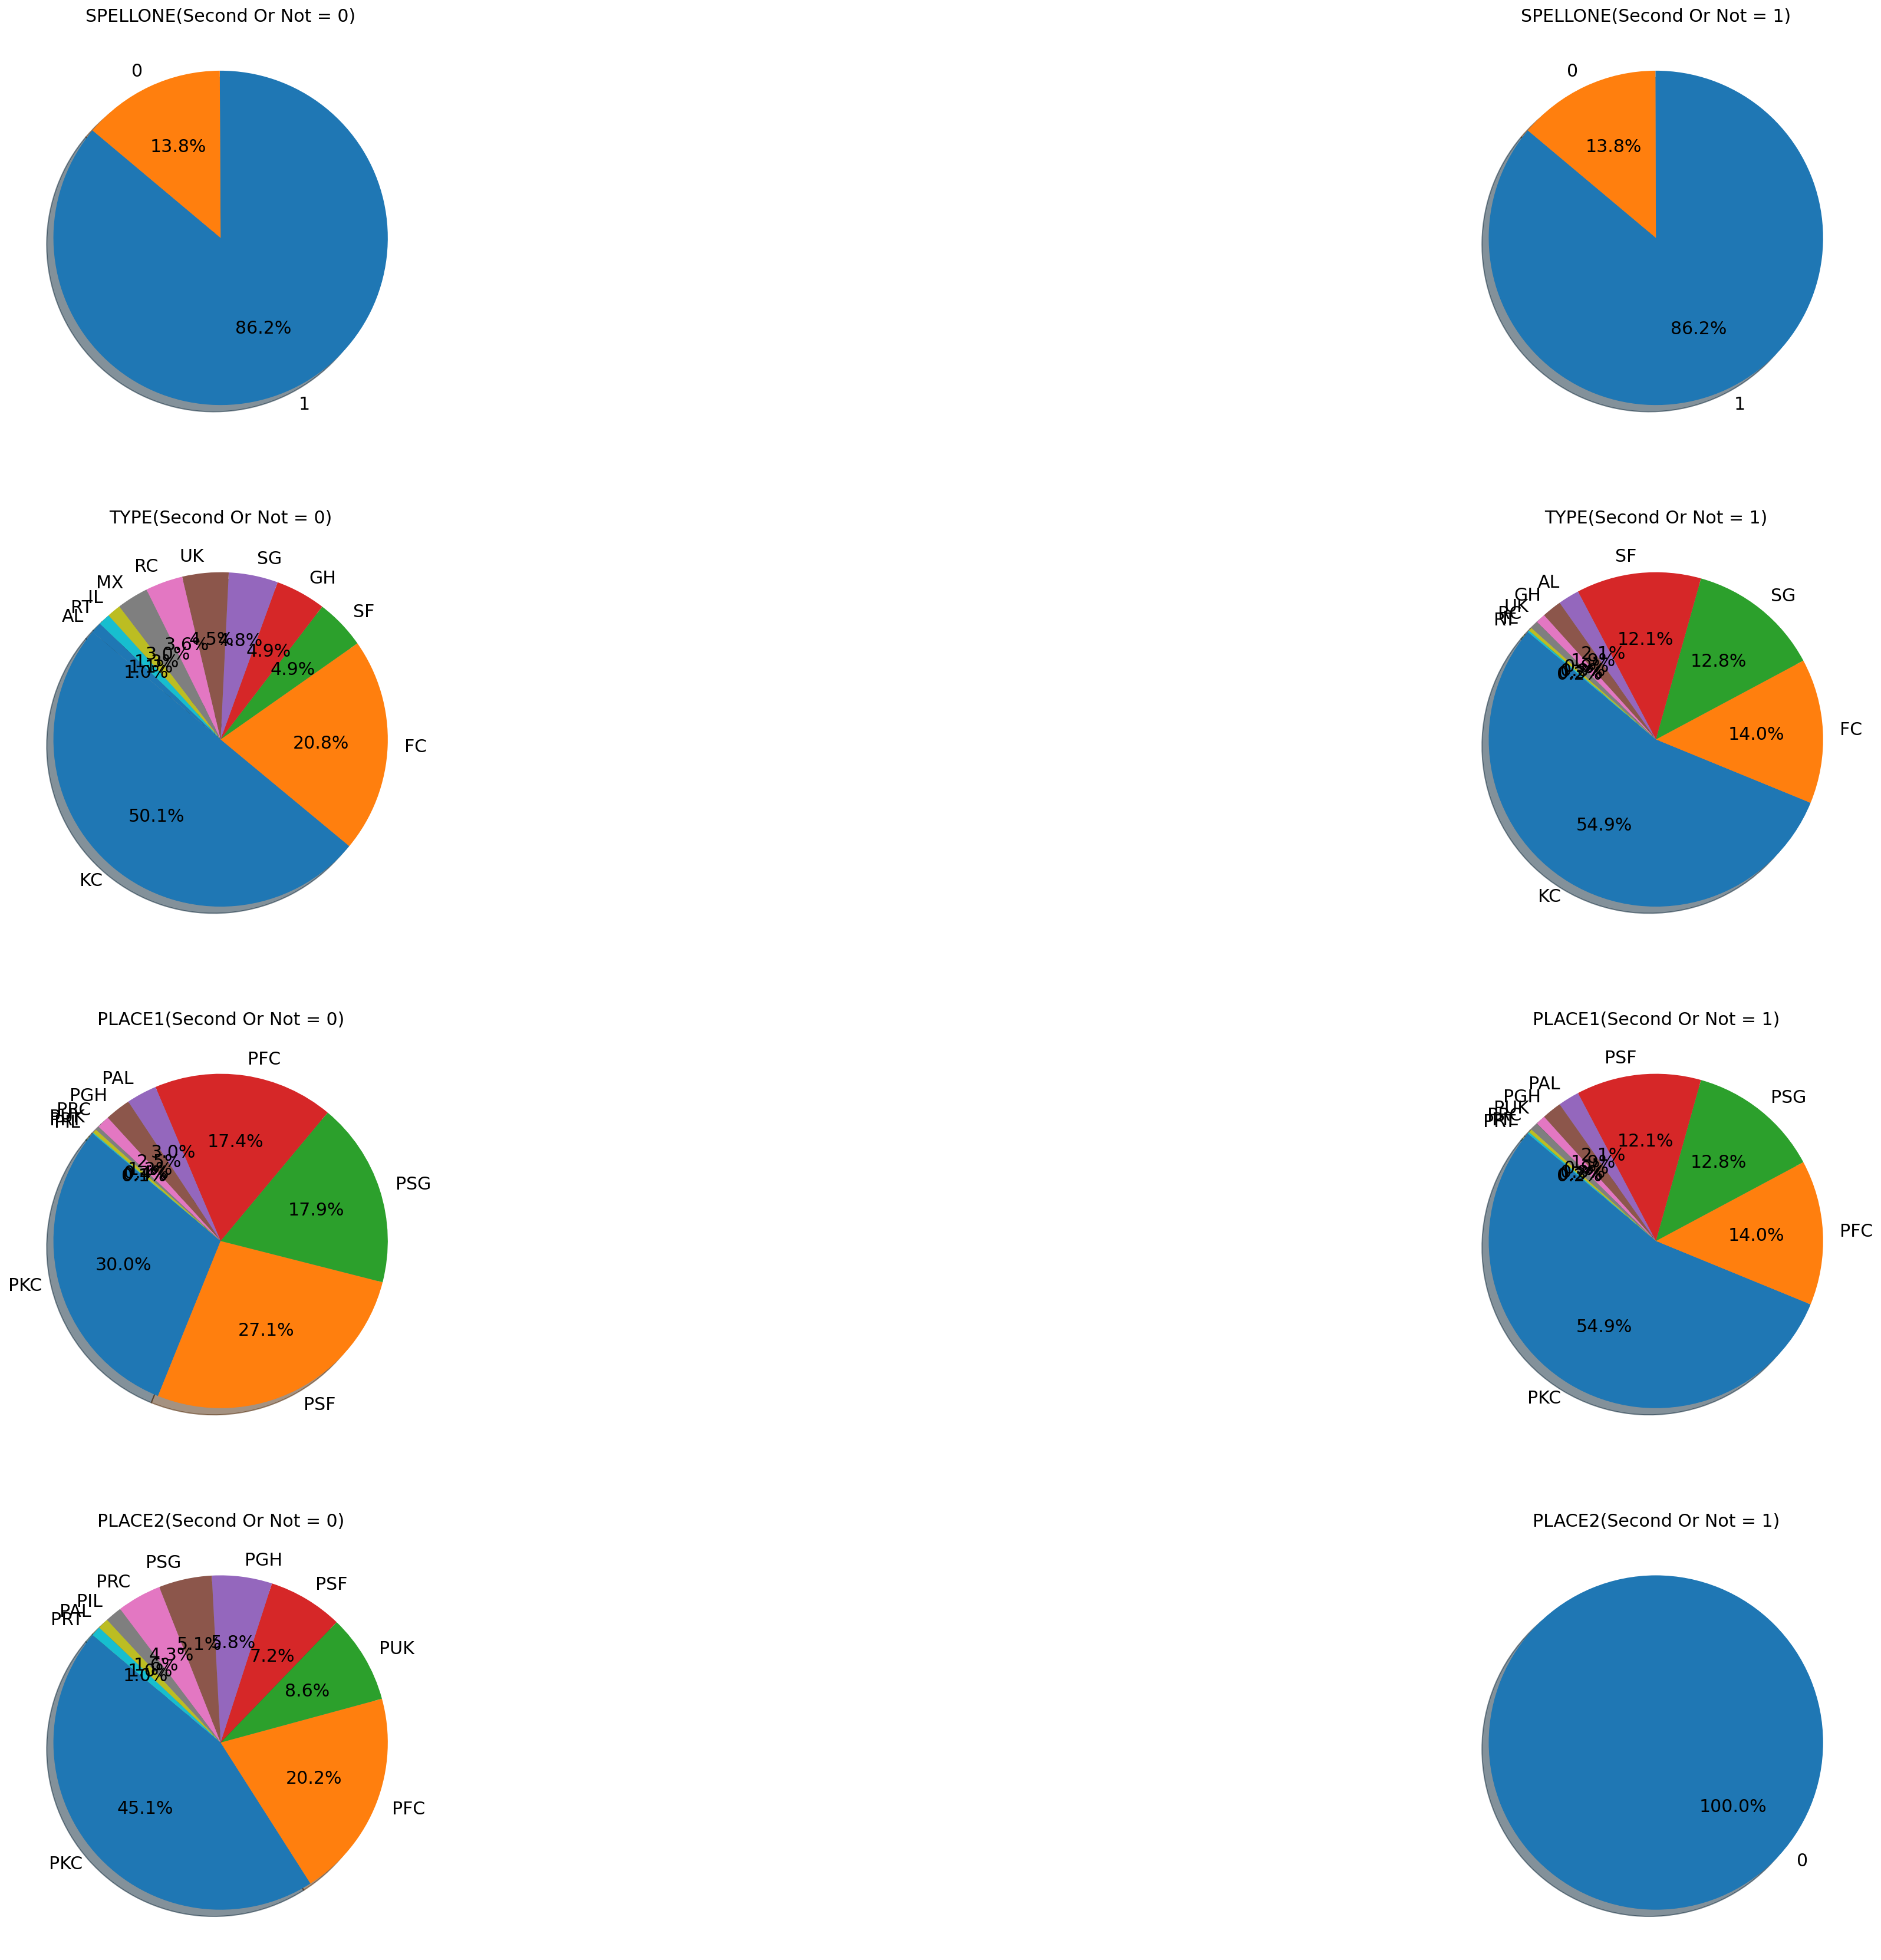

In [73]:
fig = plt.figure(figsize = (40,30))
                            
count = 1
for col in selected_nominal_features[5:9]:
    ax = fig.add_subplot(4,2,count)
    count_series = data_df[data_df['Second Or Not']==1][col].value_counts()
    labels = count_series .index
    values = count_series .values
    plt.pie(count_series, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140,textprops={'fontsize': 15})
    title = col + '(Second Or Not = '+str(0)+')'
    plt.title(title,fontsize = 15)
    count +=1
    ax = fig.add_subplot(4,2,count)
    count_series = data_df[data_df['Second Or Not']==0][col].value_counts()
    labels = count_series .index
    values = count_series .values
    plt.pie(count_series, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140,textprops={'fontsize': 15})
    title = col + '(Second Or Not = '+str(1)+')'
    plt.title(title,fontsize = 15)
    count +=1

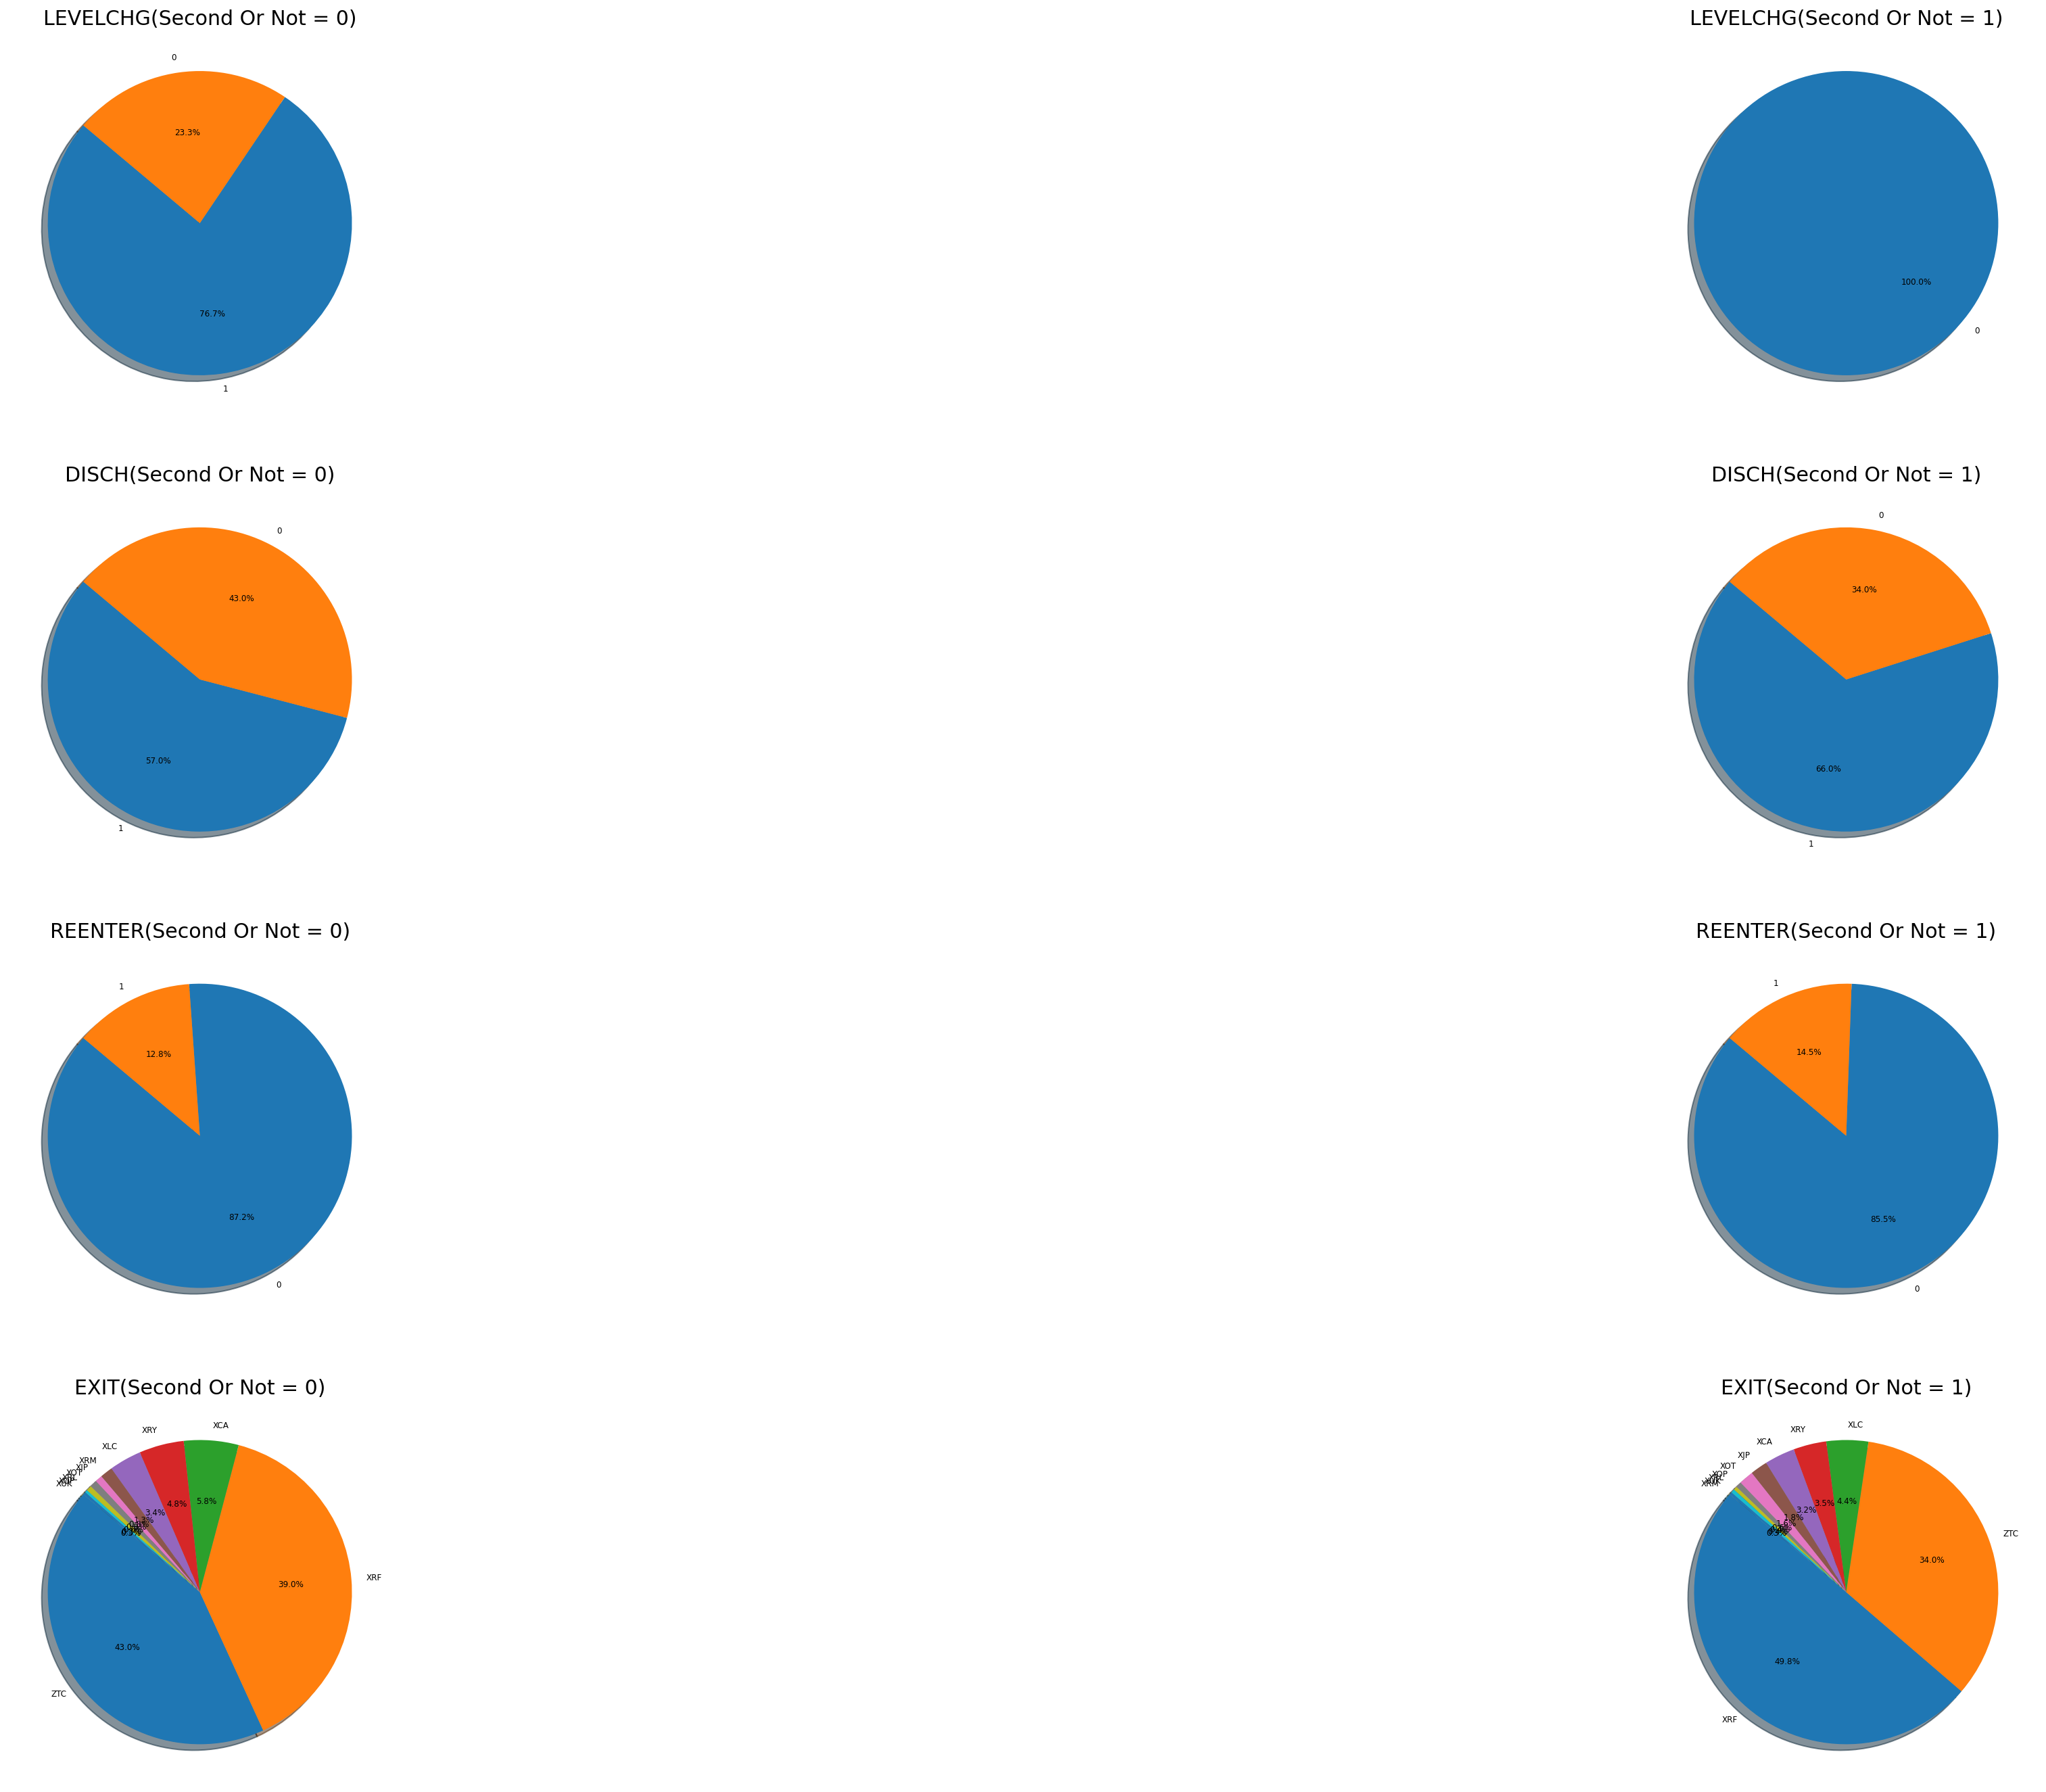

In [43]:
fig = plt.figure(figsize = (40,30))
                            
count = 1
for col in selected_nominal_features[10:]:
    ax = fig.add_subplot(5,2,count)
    count_series = data_df[data_df['Second Or Not']==1][col].value_counts()
    labels = count_series .index
    values = count_series .values
    plt.pie(count_series, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140,textprops={'fontsize': 6})
    title = col + '(Second Or Not = '+str(0)+')'
    plt.title(title,fontsize = 15)
    count +=1
    ax = fig.add_subplot(5,2,count)
    count_series = data_df[data_df['Second Or Not']==0][col].value_counts()
    labels = count_series .index
    values = count_series .values
    plt.pie(count_series, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140,textprops={'fontsize': 6})
    title = col + '(Second Or Not = '+str(1)+')'
    plt.title(title,fontsize = 15)
    count +=1

#### Ordinal Features

In [45]:
raw_ordinal_var

['AGECAT7', 'DURCAT', 'RECAT']

In [79]:
data_df[raw_ordinal_var].describe()

AGECAT7       DURCAT        RECAT
count  2849.000000  2849.000000  2849.000000
mean      3.763426     3.282906     2.481221
std       2.161537     1.714321     2.299796
min       0.000000     1.000000     0.000000
25%       2.000000     2.000000     0.000000
50%       3.000000     3.000000     2.000000
75%       6.000000     5.000000     4.000000
max       7.000000     6.000000     6.000000

In [76]:
for feature in raw_ordinal_var:
    print(data_df[feature].value_counts())
    print()

1.0    582
7.0    457
3.0    440
2.0    397
6.0    376
4.0    314
5.0    263
0.0     20
Name: AGECAT7, dtype: int64

1    588
4    511
2    510
3    460
6    421
5    359
Name: DURCAT, dtype: int64

0    1062
6     432
4     410
5     279
3     261
2     254
1     151
Name: RECAT, dtype: int64



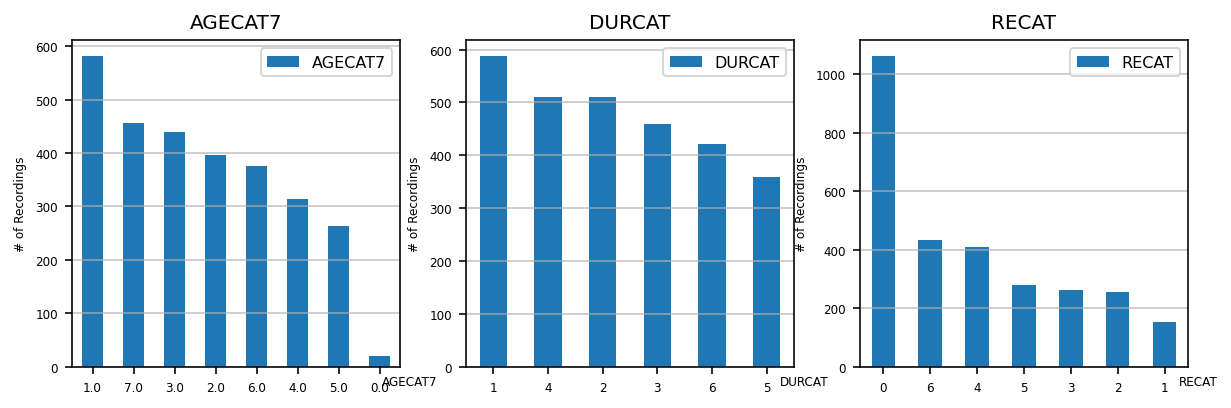

In [52]:
fig = plt.figure(figsize = (50,10))
count = 1
for feature in raw_ordinal_var:
    ax = fig.add_subplot(1,3,count)
    data_df[feature].value_counts().plot(kind = 'bar',figsize = (10,3))
    plt.grid(axis='y', alpha=0.75)  
    plt.xlabel(feature, fontsize=6)
    plt.ylabel('# of Recordings', fontsize=6)
    title = feature
    ax.set_title(title,fontsize=10)
    ax.xaxis.set_label_coords(1.03, -0.025)
    ax.tick_params(axis='both', which='major', labelsize=6,rotation = 0)
    plt.legend(loc='upper right',prop={'size': 8})
    count +=1

#### Numerical Features

In [53]:
raw_numerical_var

['AGE_20161231', 'SPELLAGE', 'NPLACES', 'MOVES', 'RUNS', 'DURAT', 'DURMO']

In [80]:
data_df[raw_numerical_var].describe()

AGE_20161231     SPELLAGE      NPLACES        MOVES         RUNS        DURAT        DURMO
count   2849.000000  2849.000000  2849.000000  2849.000000  2849.000000  2849.000000  2849.000000
mean       8.405756     7.019656     1.598105     0.598105     0.039663   244.080730     8.002647
std        6.171500     6.025254     1.039060     1.039060     0.195201   251.065257     8.231648
min        0.000000     0.000000     1.000000     0.000000     0.000000     1.000000     0.032787
25%        3.000000     1.000000     1.000000     0.000000     0.000000    37.000000     1.213115
50%        7.000000     6.000000     1.000000     0.000000     0.000000   151.000000     4.950820
75%       15.000000    13.000000     2.000000     1.000000     0.000000   404.000000    13.245902
max       23.000000    20.000000    13.000000    12.000000     1.000000  1089.000000    35.704918

In [81]:
for feature in raw_numerical_var:
    print(data_df[feature].value_counts())
    print()

2     292
1     244
3     238
17    177
16    166
4     151
18    142
5     140
0     139
15    137
6     133
7     125
8     119
9     101
14     94
11     93
10     92
12     83
13     80
19     69
20     31
23      1
21      1
22      1
Name: AGE_20161231, dtype: int64

0     549
1     220
2     197
16    196
15    173
3     169
14    153
4     151
17    129
5     124
6     114
13    110
7     105
8     101
10     96
9      83
11     82
12     73
18     15
20      5
19      4
Name: SPELLAGE, dtype: int64

1     1805
2      668
3      220
4       84
5       43
6       19
7        3
8        3
9        2
13       1
11       1
Name: NPLACES, dtype: int64

0     1805
1      668
2      220
3       84
4       43
5       19
7        3
6        3
8        2
12       1
10       1
Name: MOVES, dtype: int64

0    2736
1     113
Name: RUNS, dtype: int64

2      81
3      72
1      56
4      34
32     24
       ..
848     1
860     1
864     1
880     1
930     1
Name: DURAT, Length: 694, dtype:

In [86]:
def violinplt(x,y,title):
    fig,ax = plt.subplots(figsize = (25,10))
    sns.violinplot(x =data_df[x],y = data_df[y])
    ax.set_title(title)
    plt.xticks(rotation = 30)

In [83]:
def boxplt(x,y,title):
    fig,ax=plt.subplots(figsize = (25,10))
    sns.boxplot(x =x, y=y,data=data_df[[y,x]])
    ax.set_title(title)
    plt.xticks(rotation = 30)

<Figure size 8640x11520 with 0 Axes>

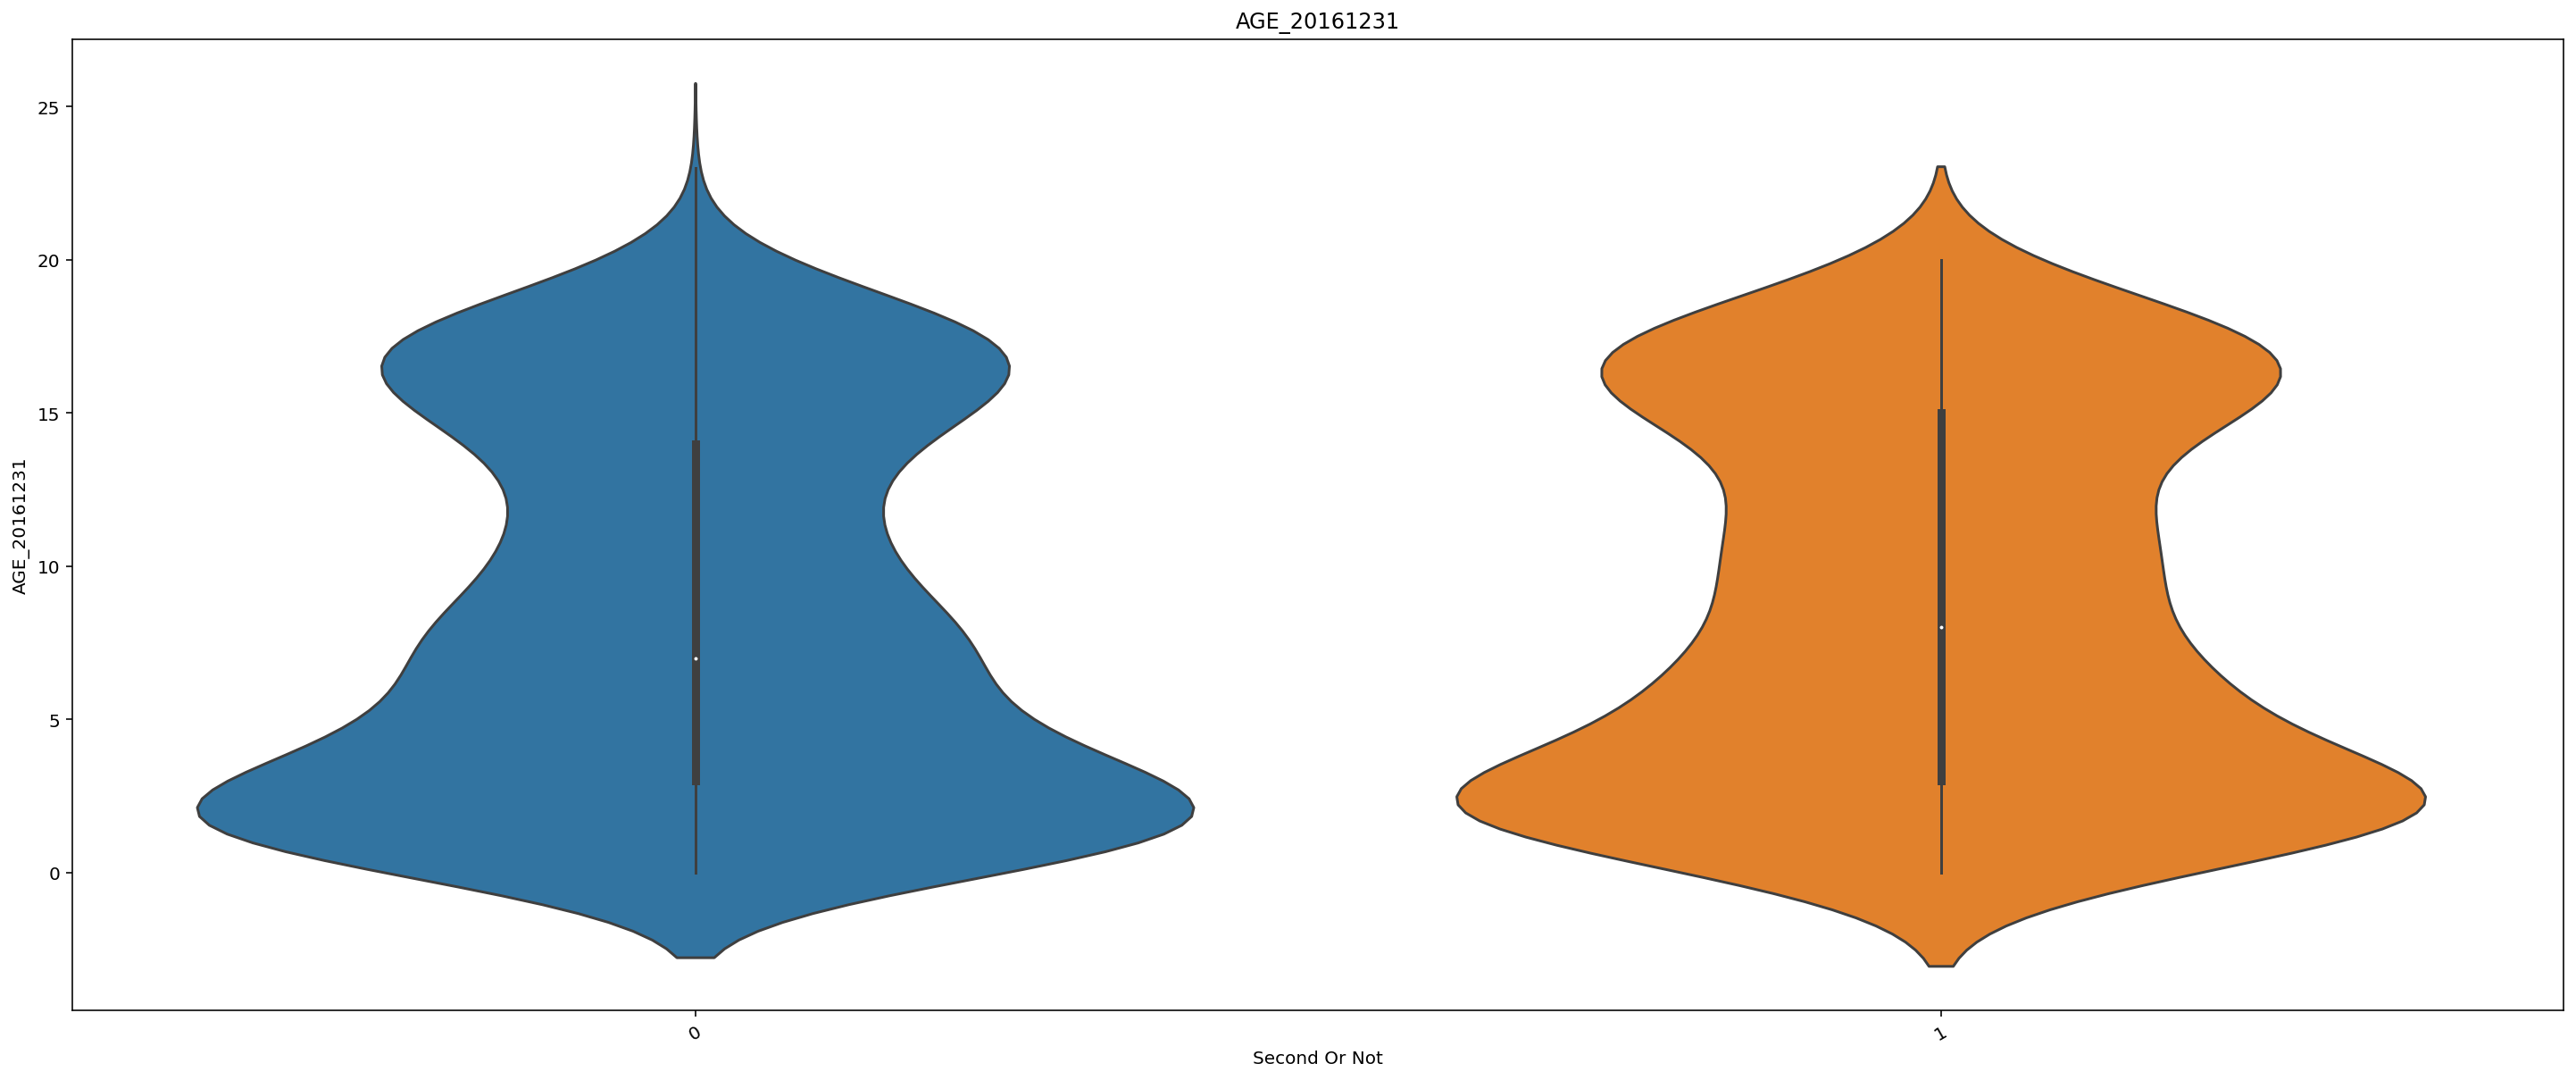

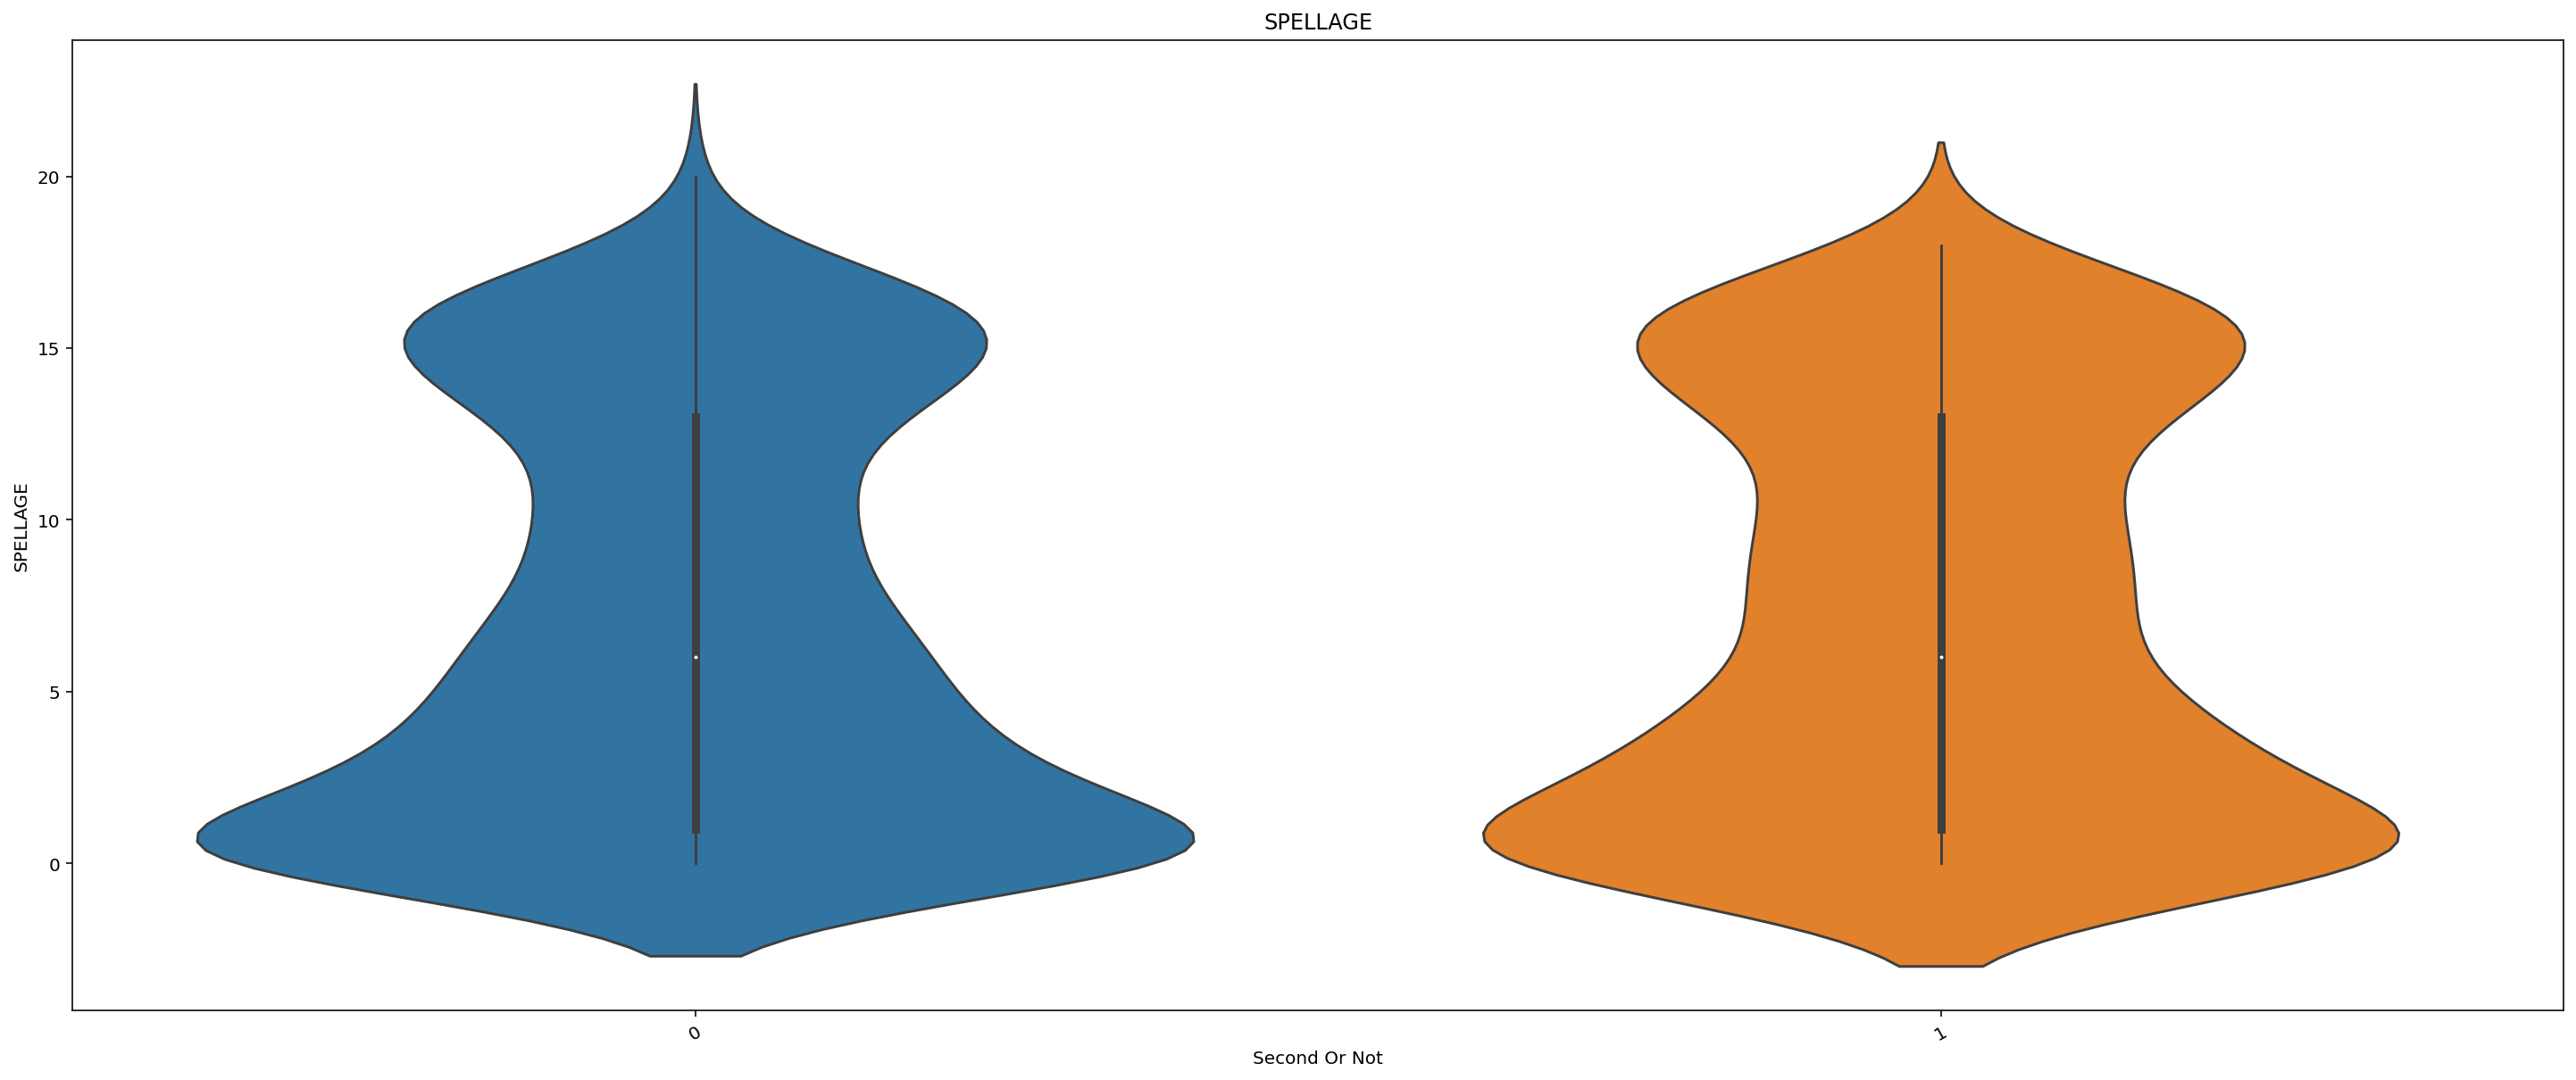

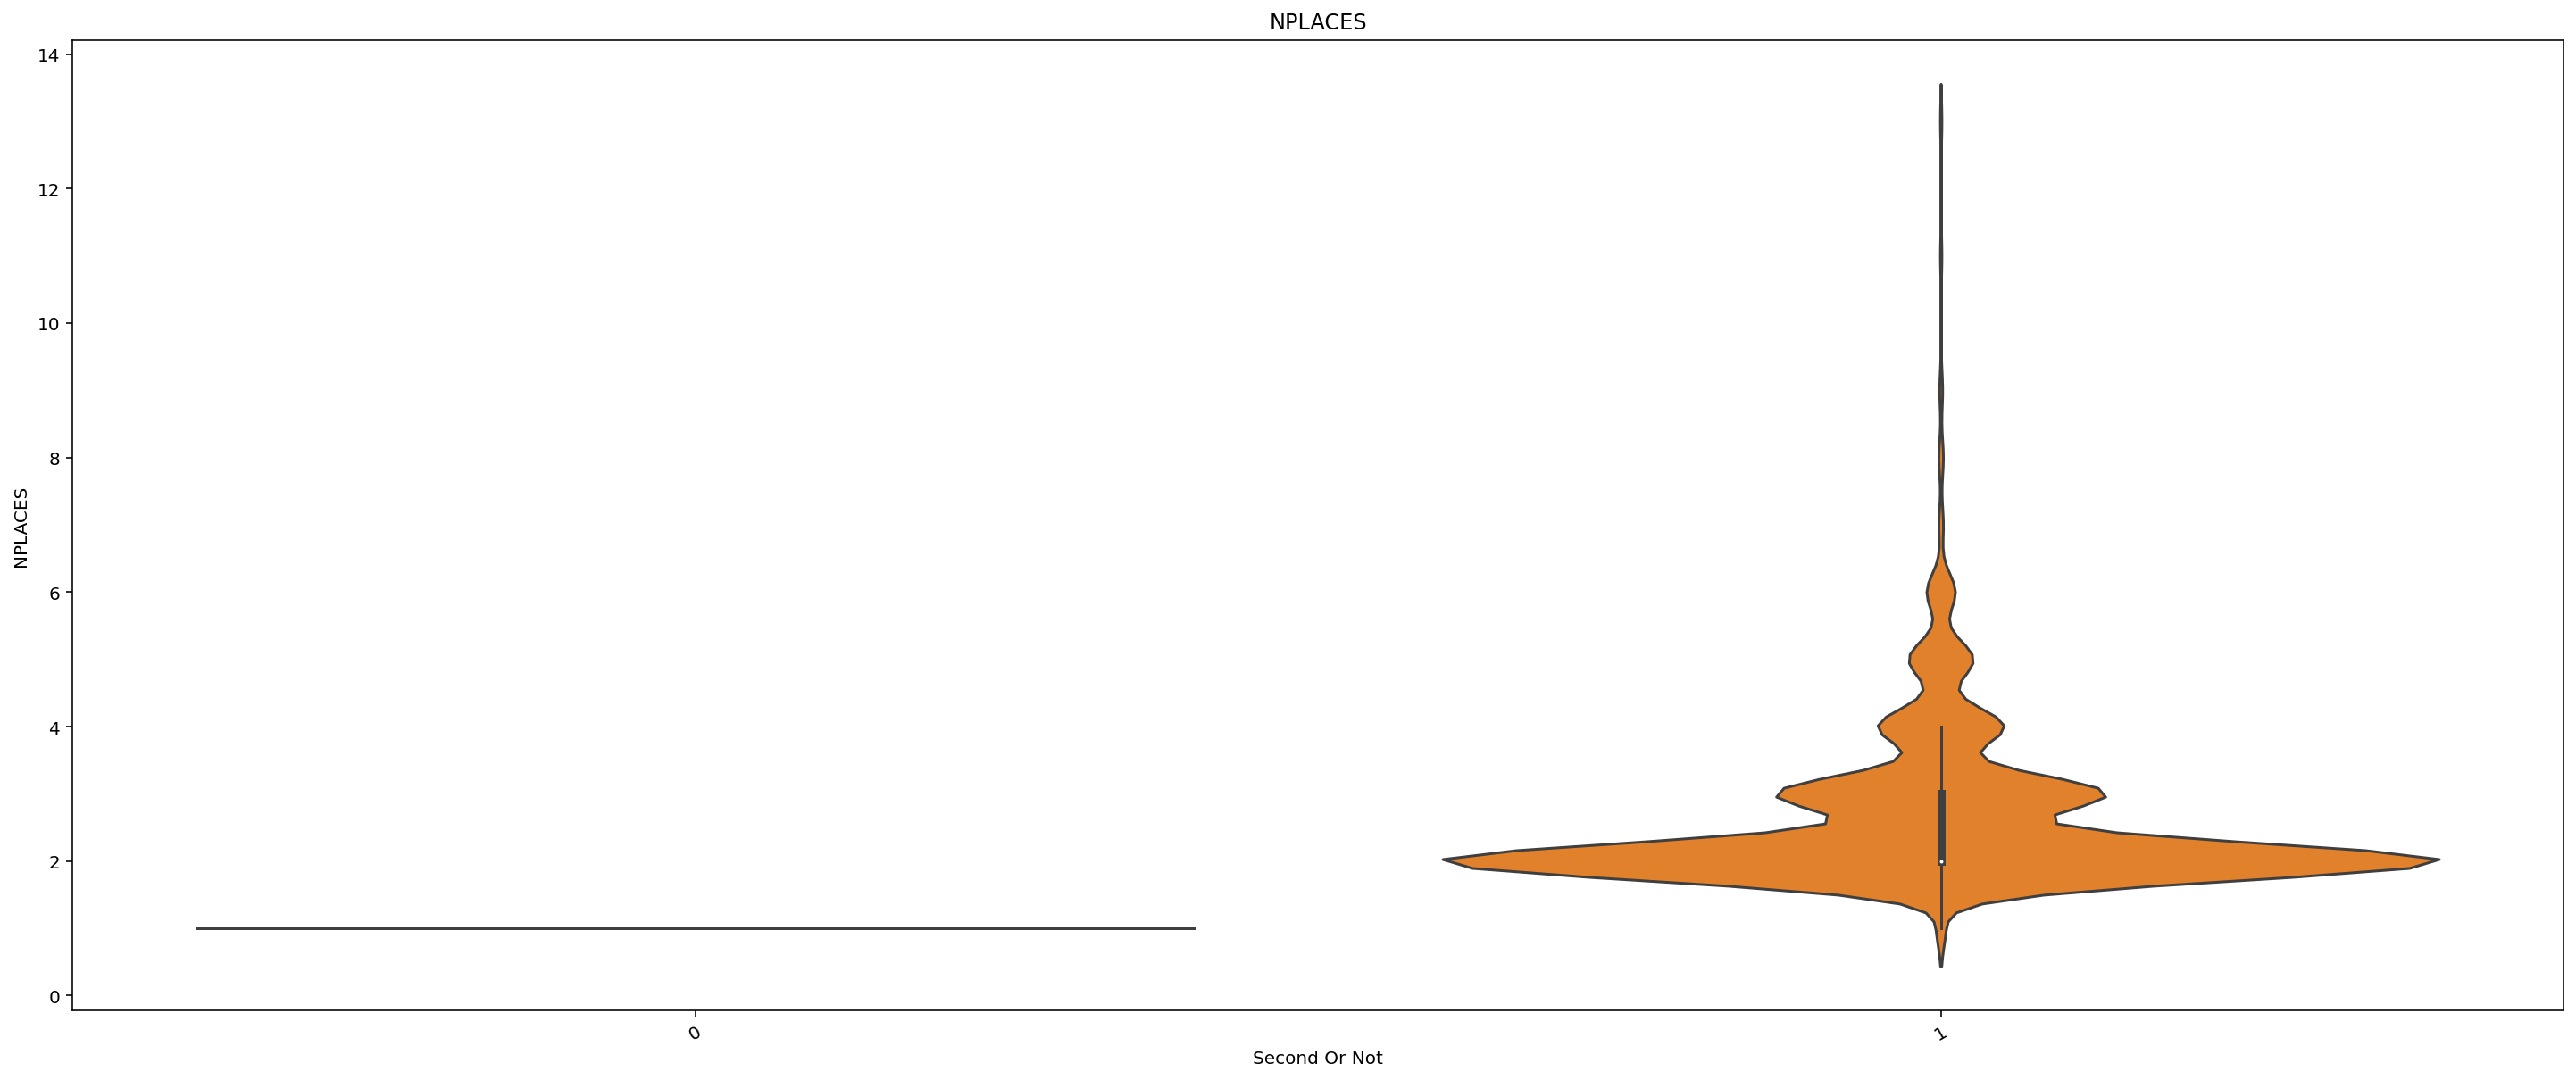

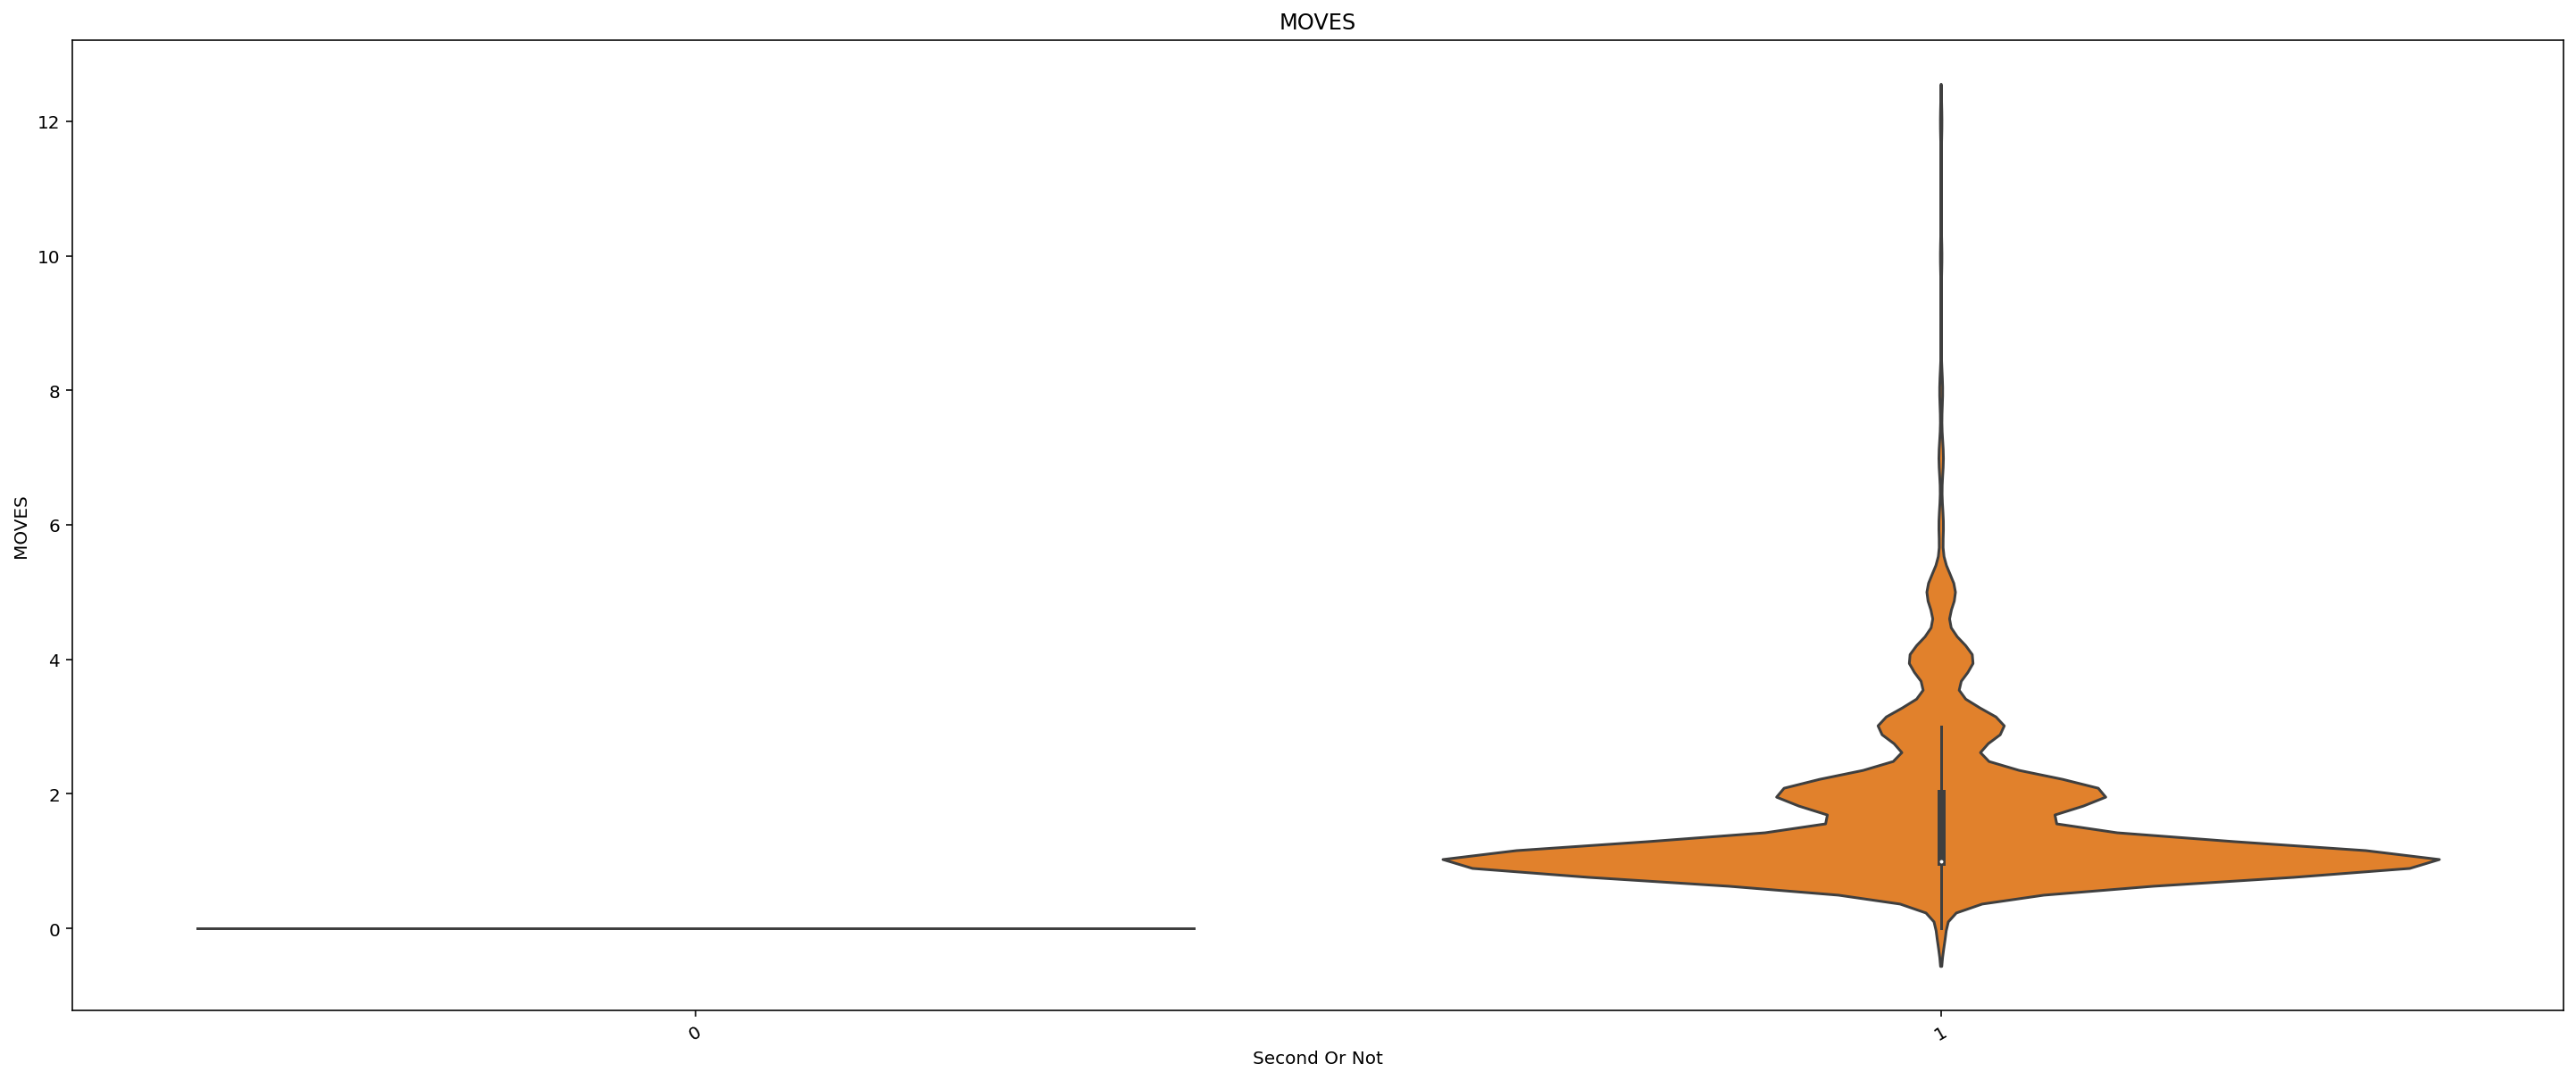

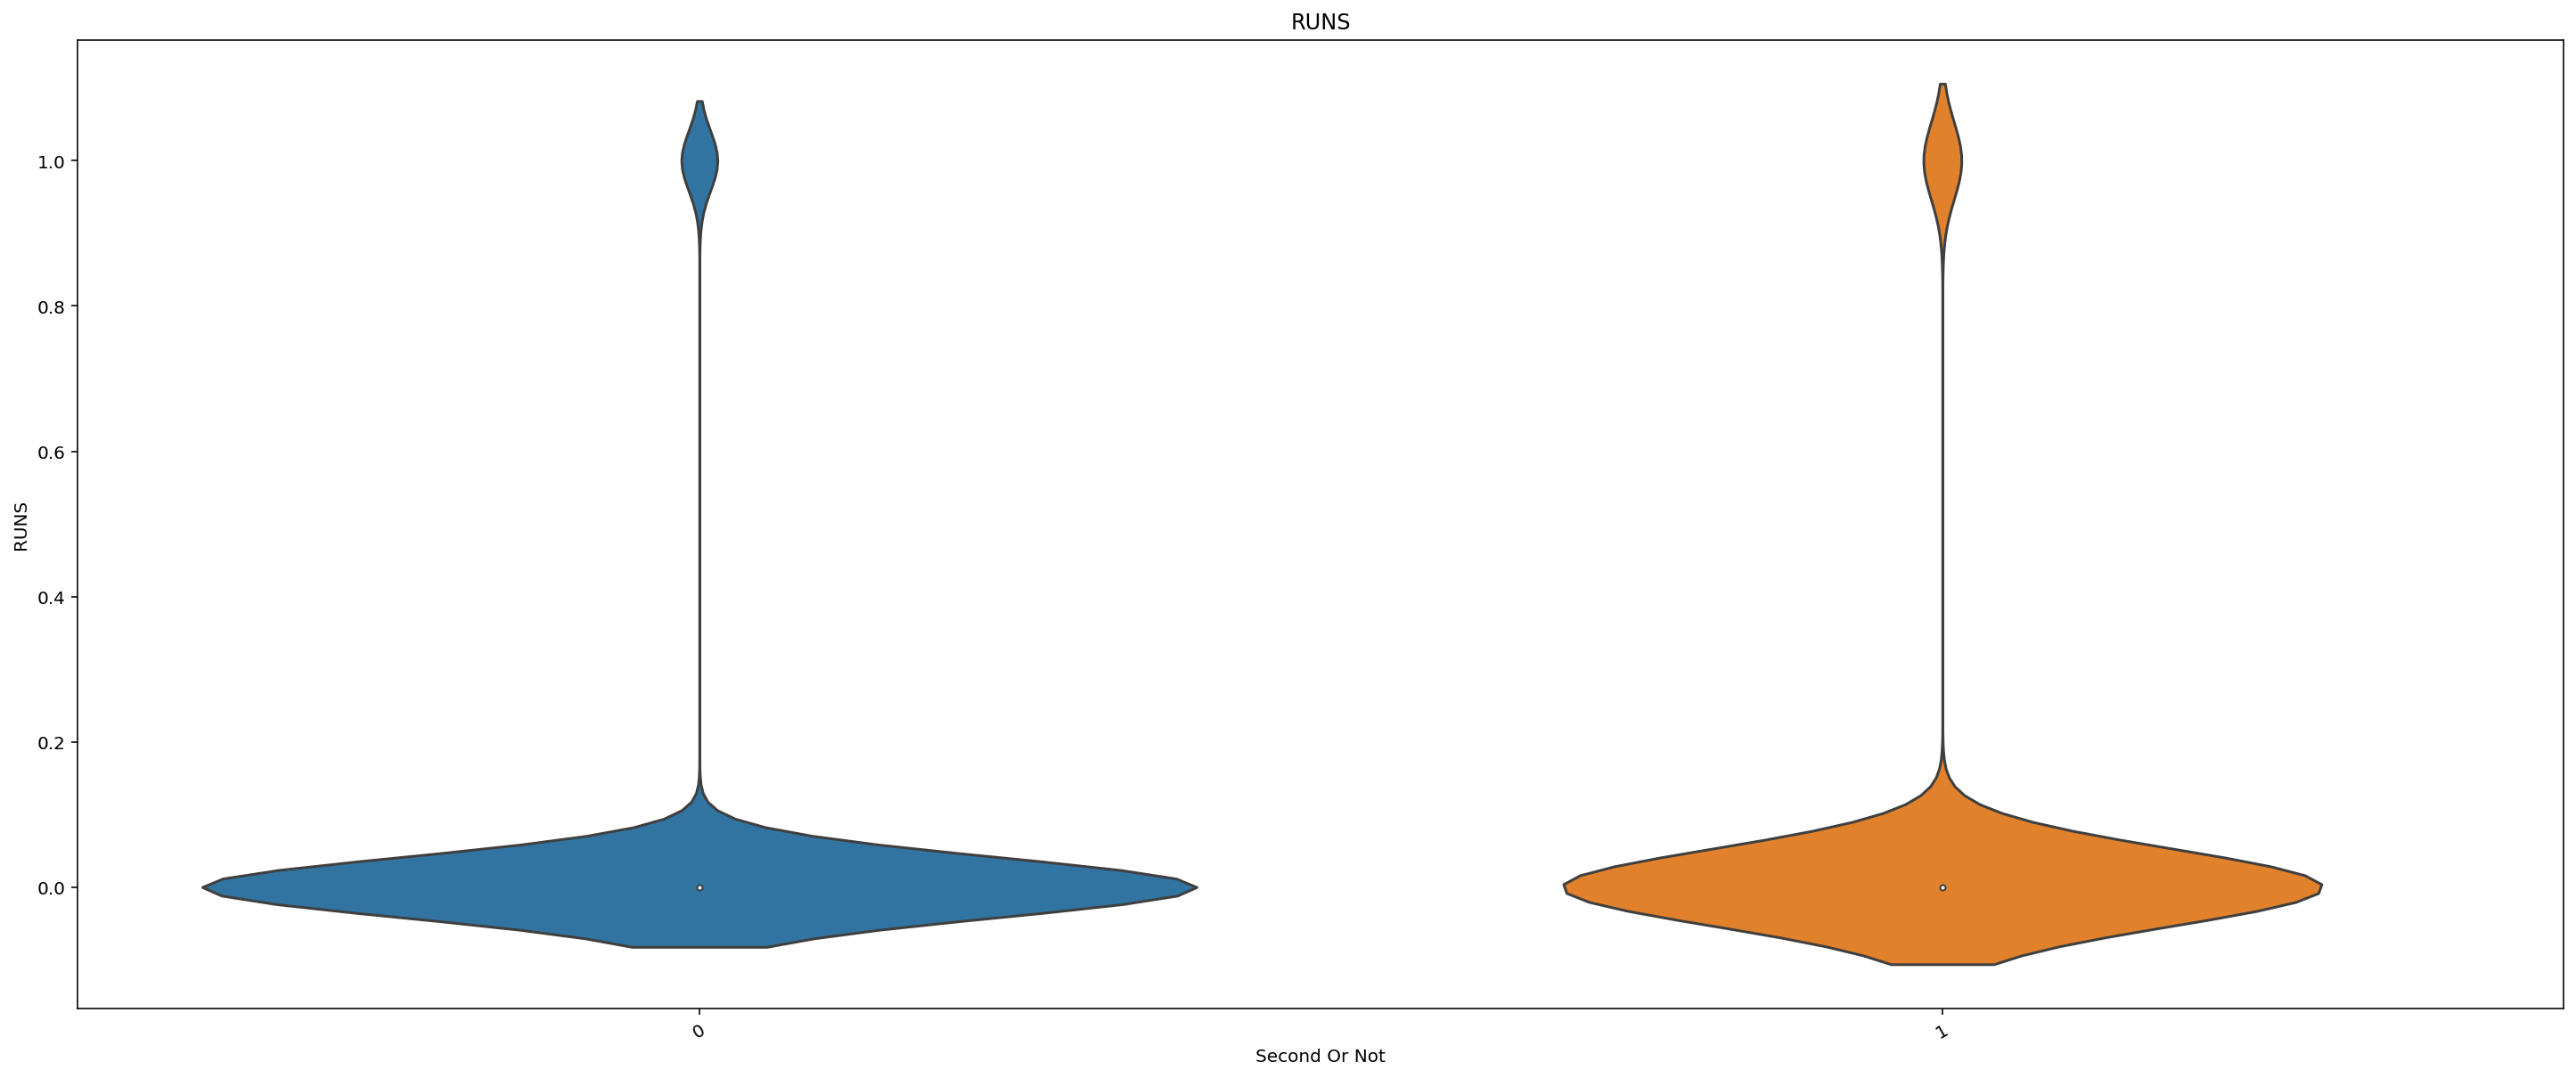

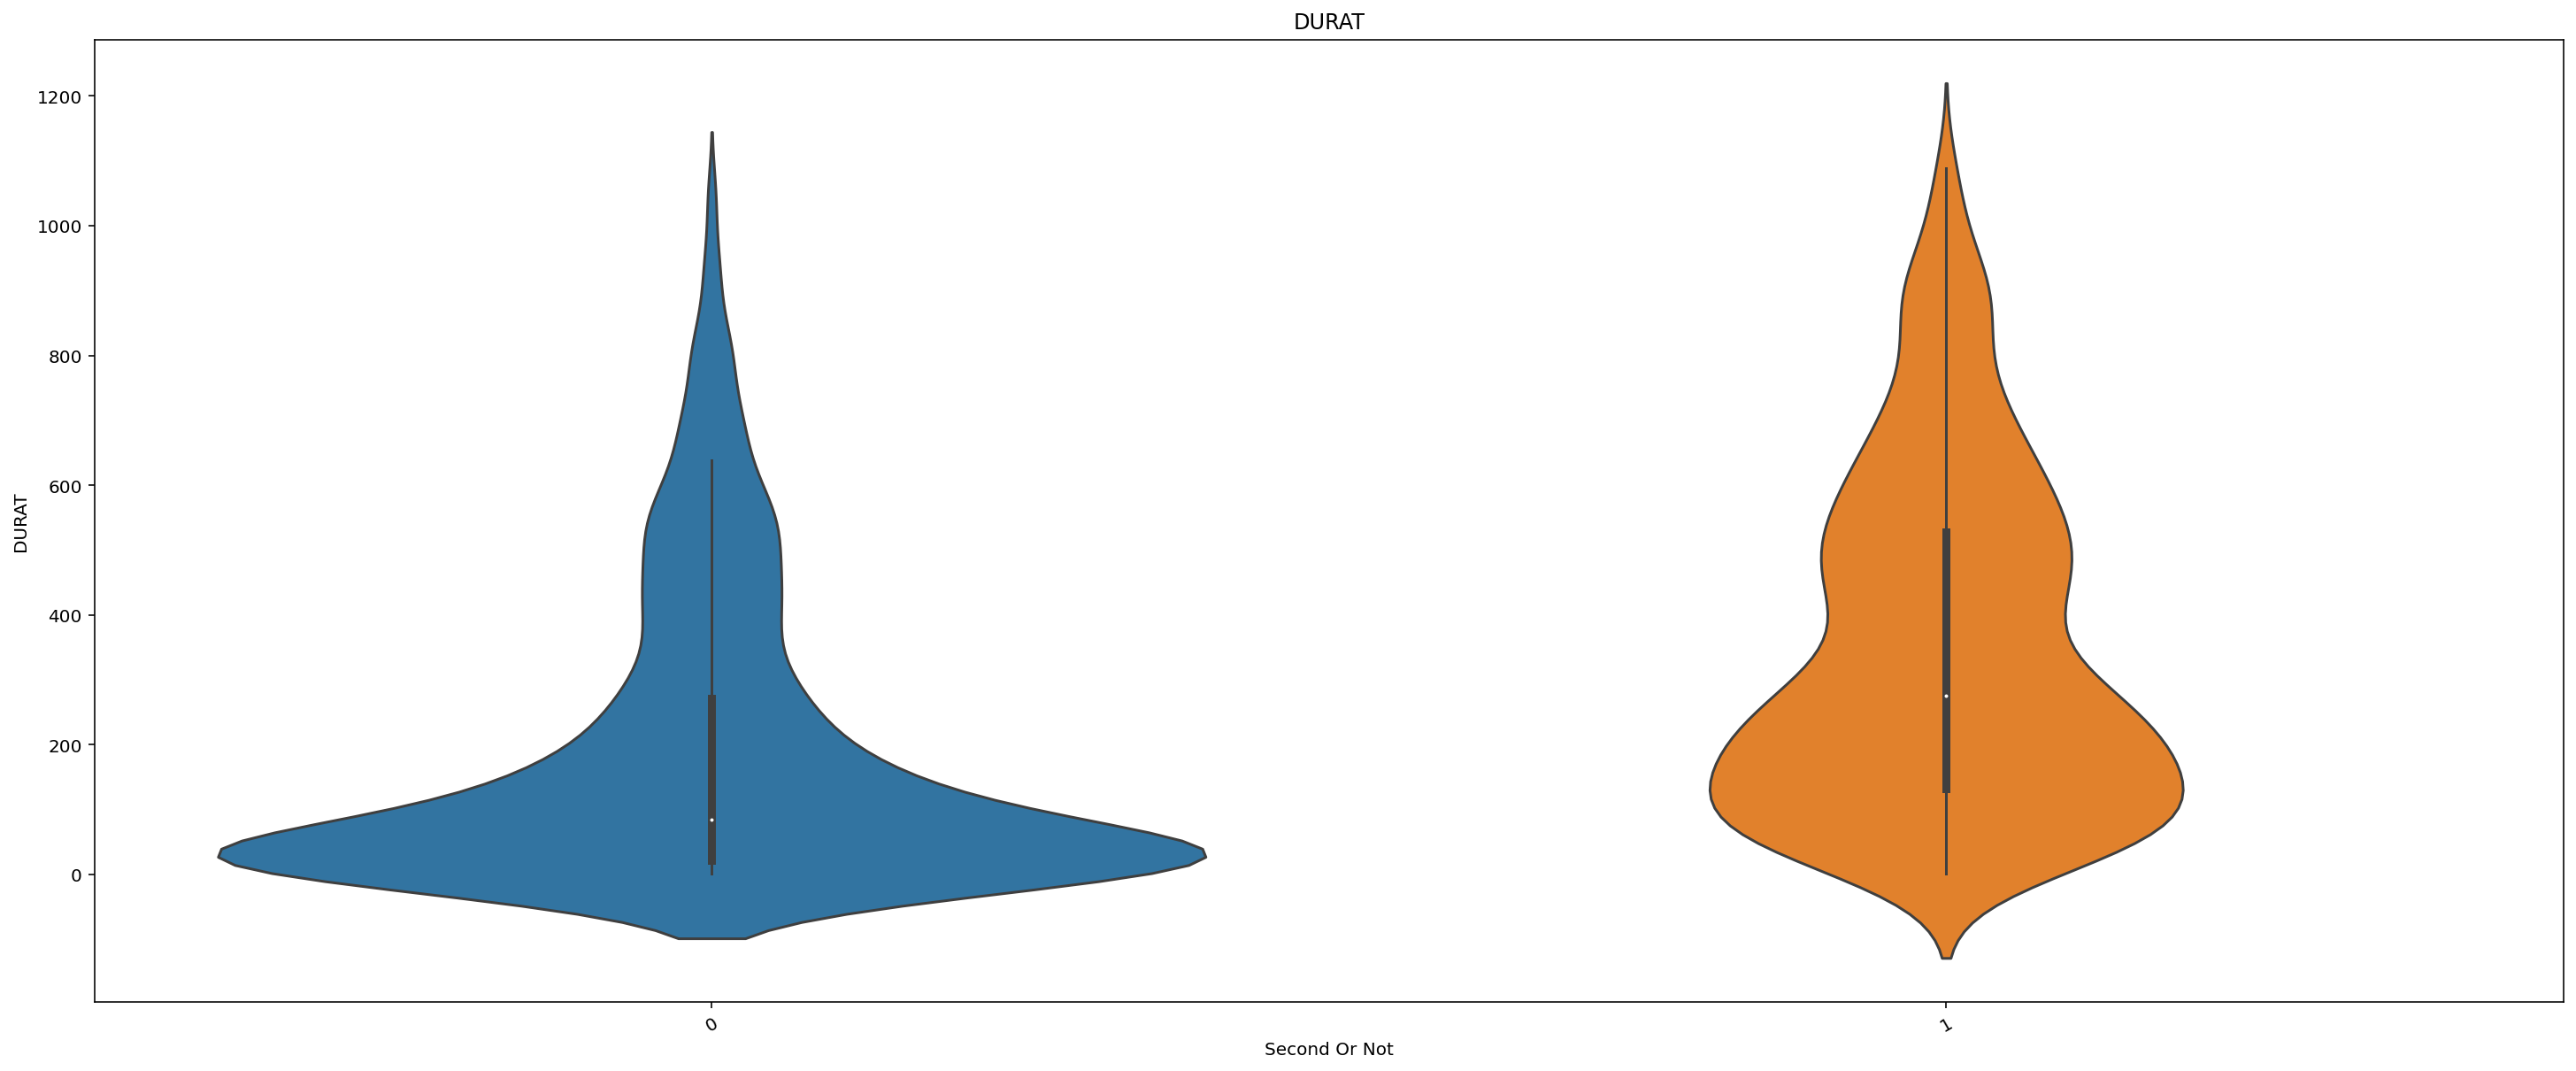

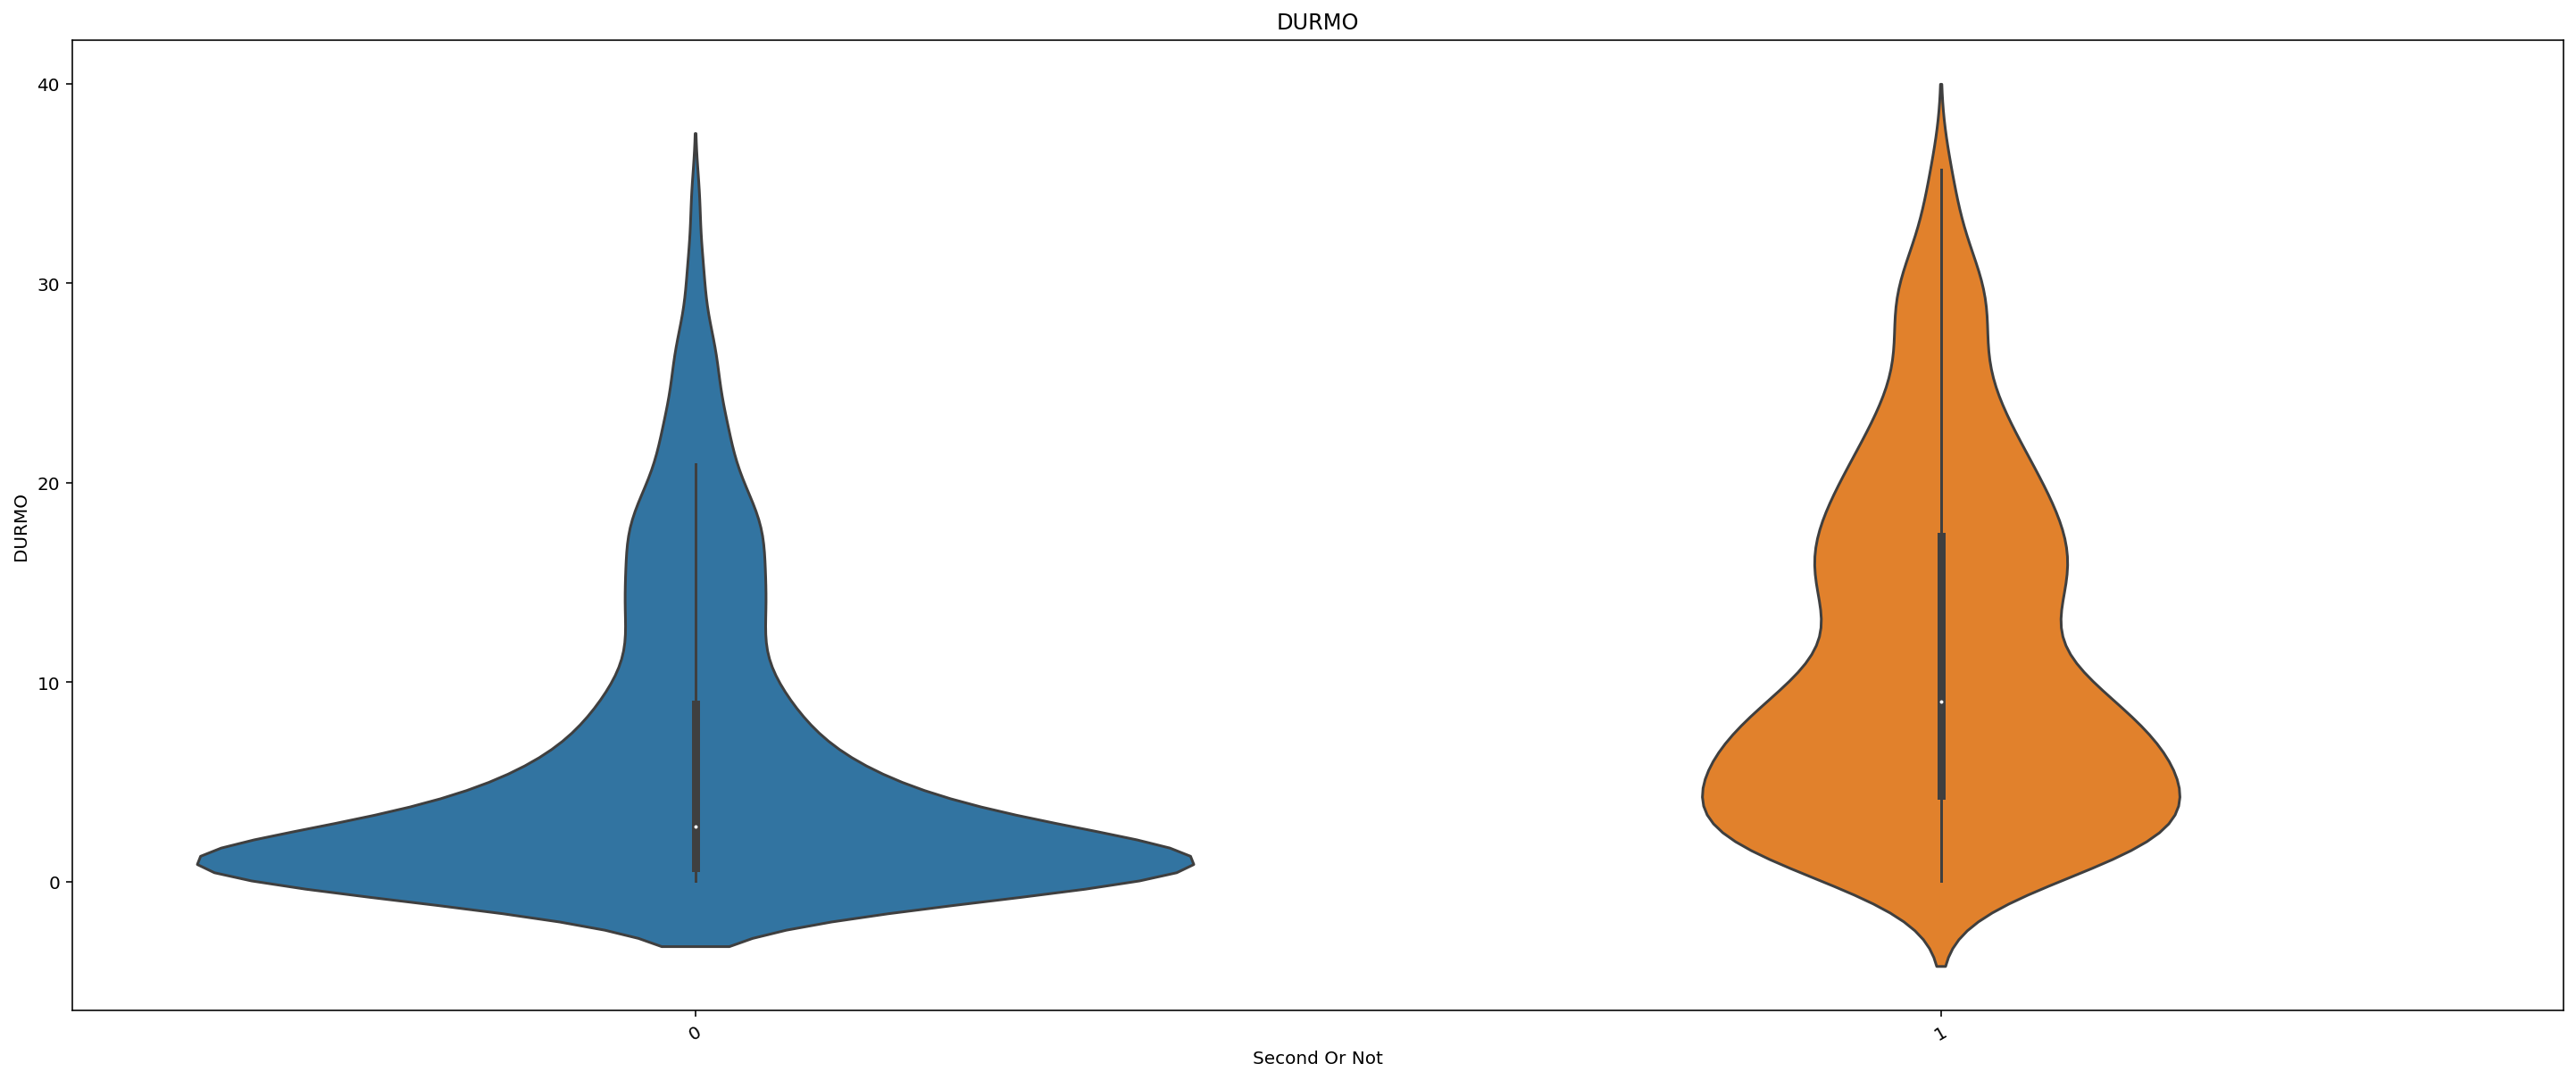

In [87]:
fig = plt.figure(figsize = (120,160))
count = 1
for feature in raw_numerical_var:
    violinplt(x = 'Second Or Not', y = feature,title = feature)
    count +=1

<Figure size 8640x11520 with 0 Axes>

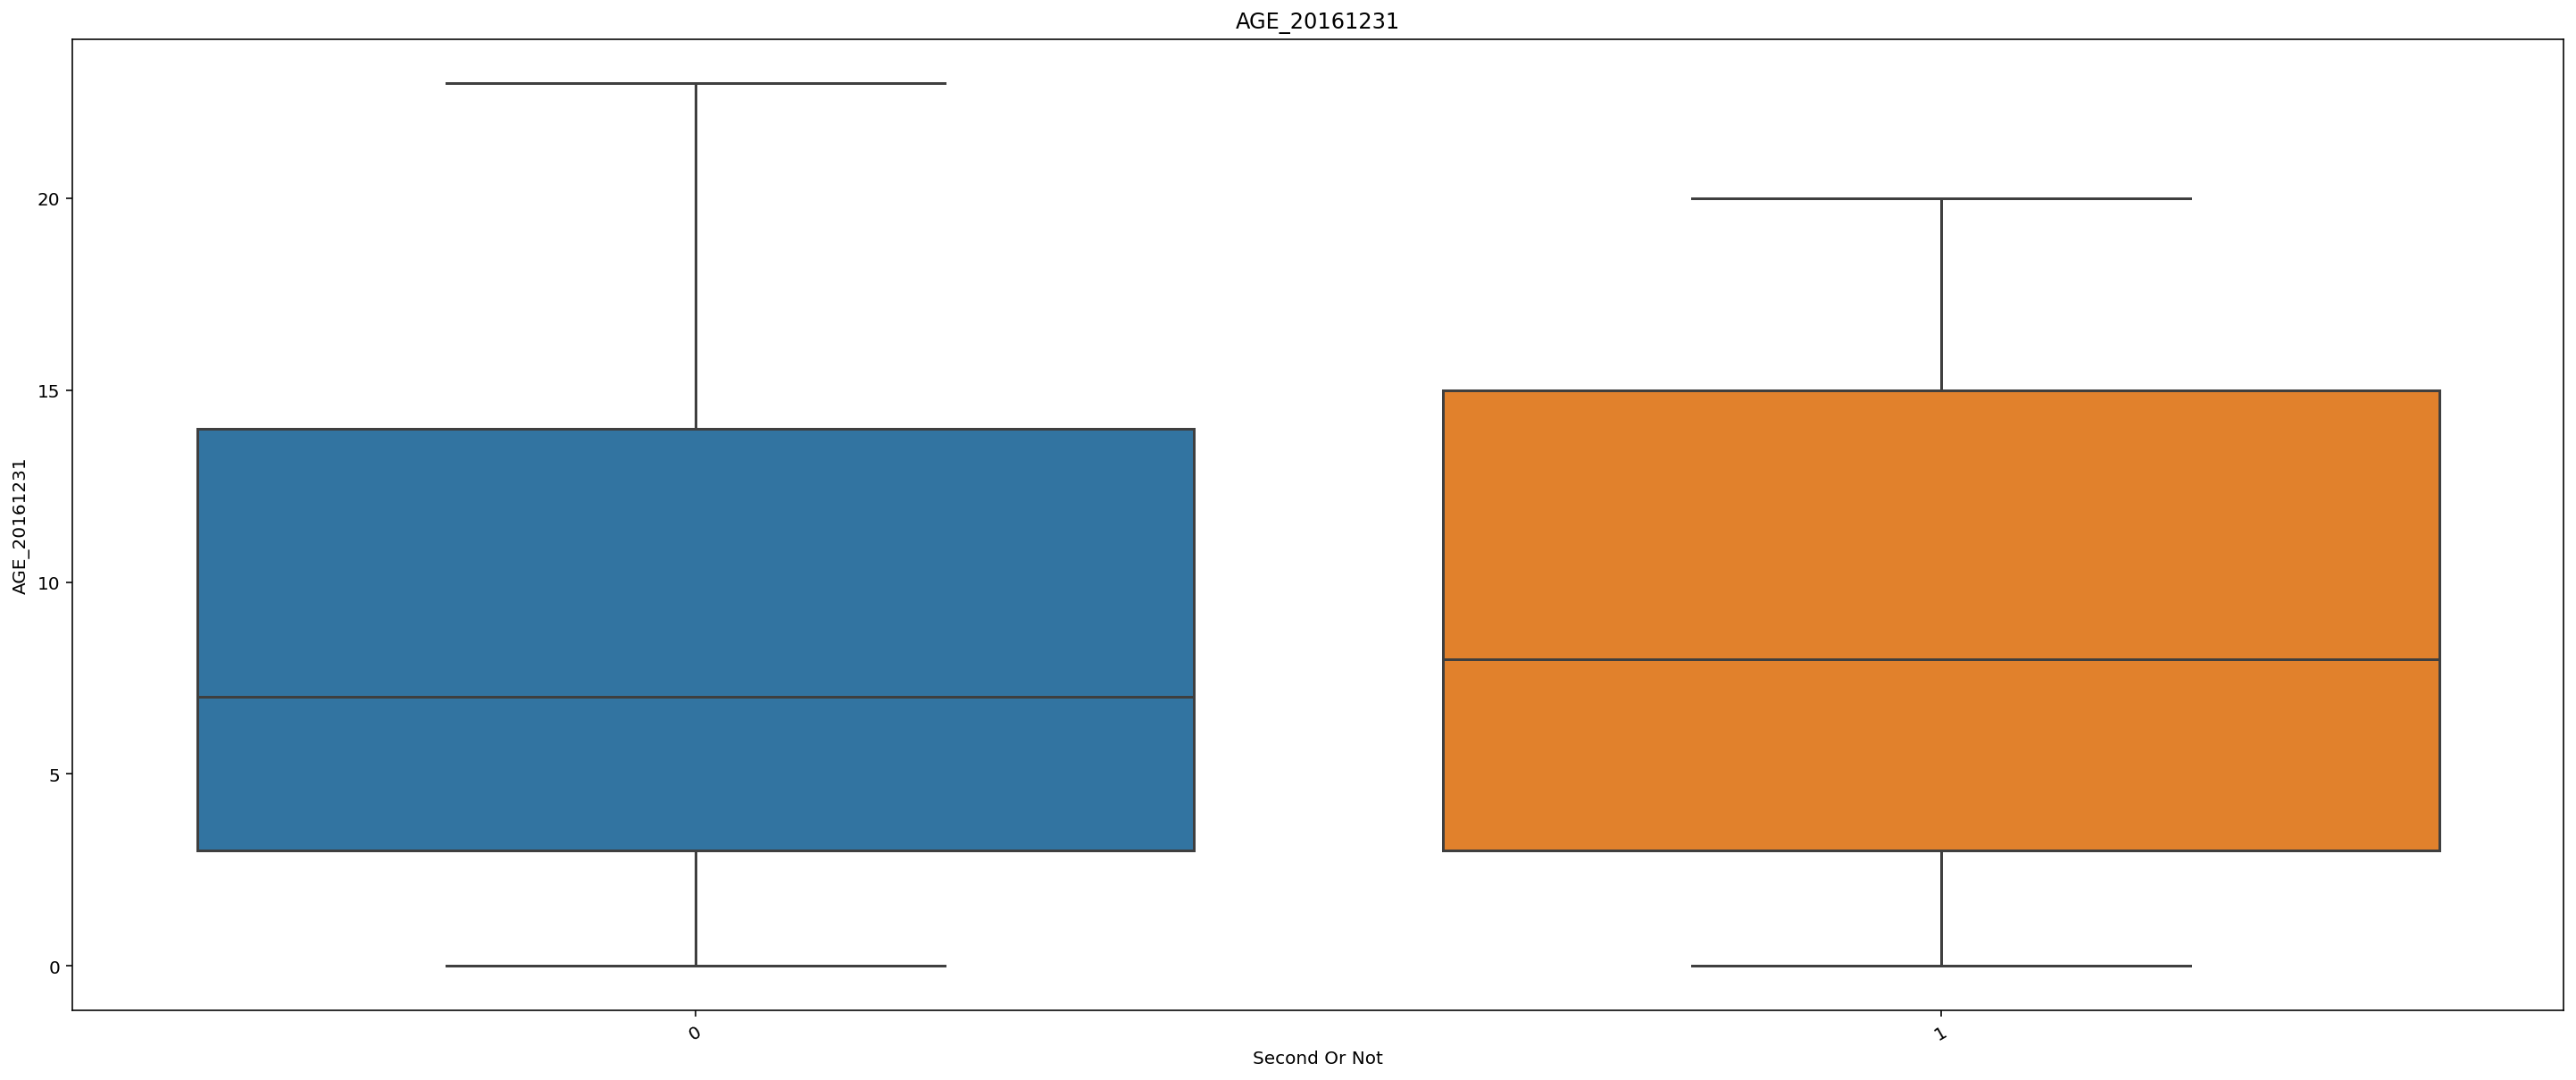

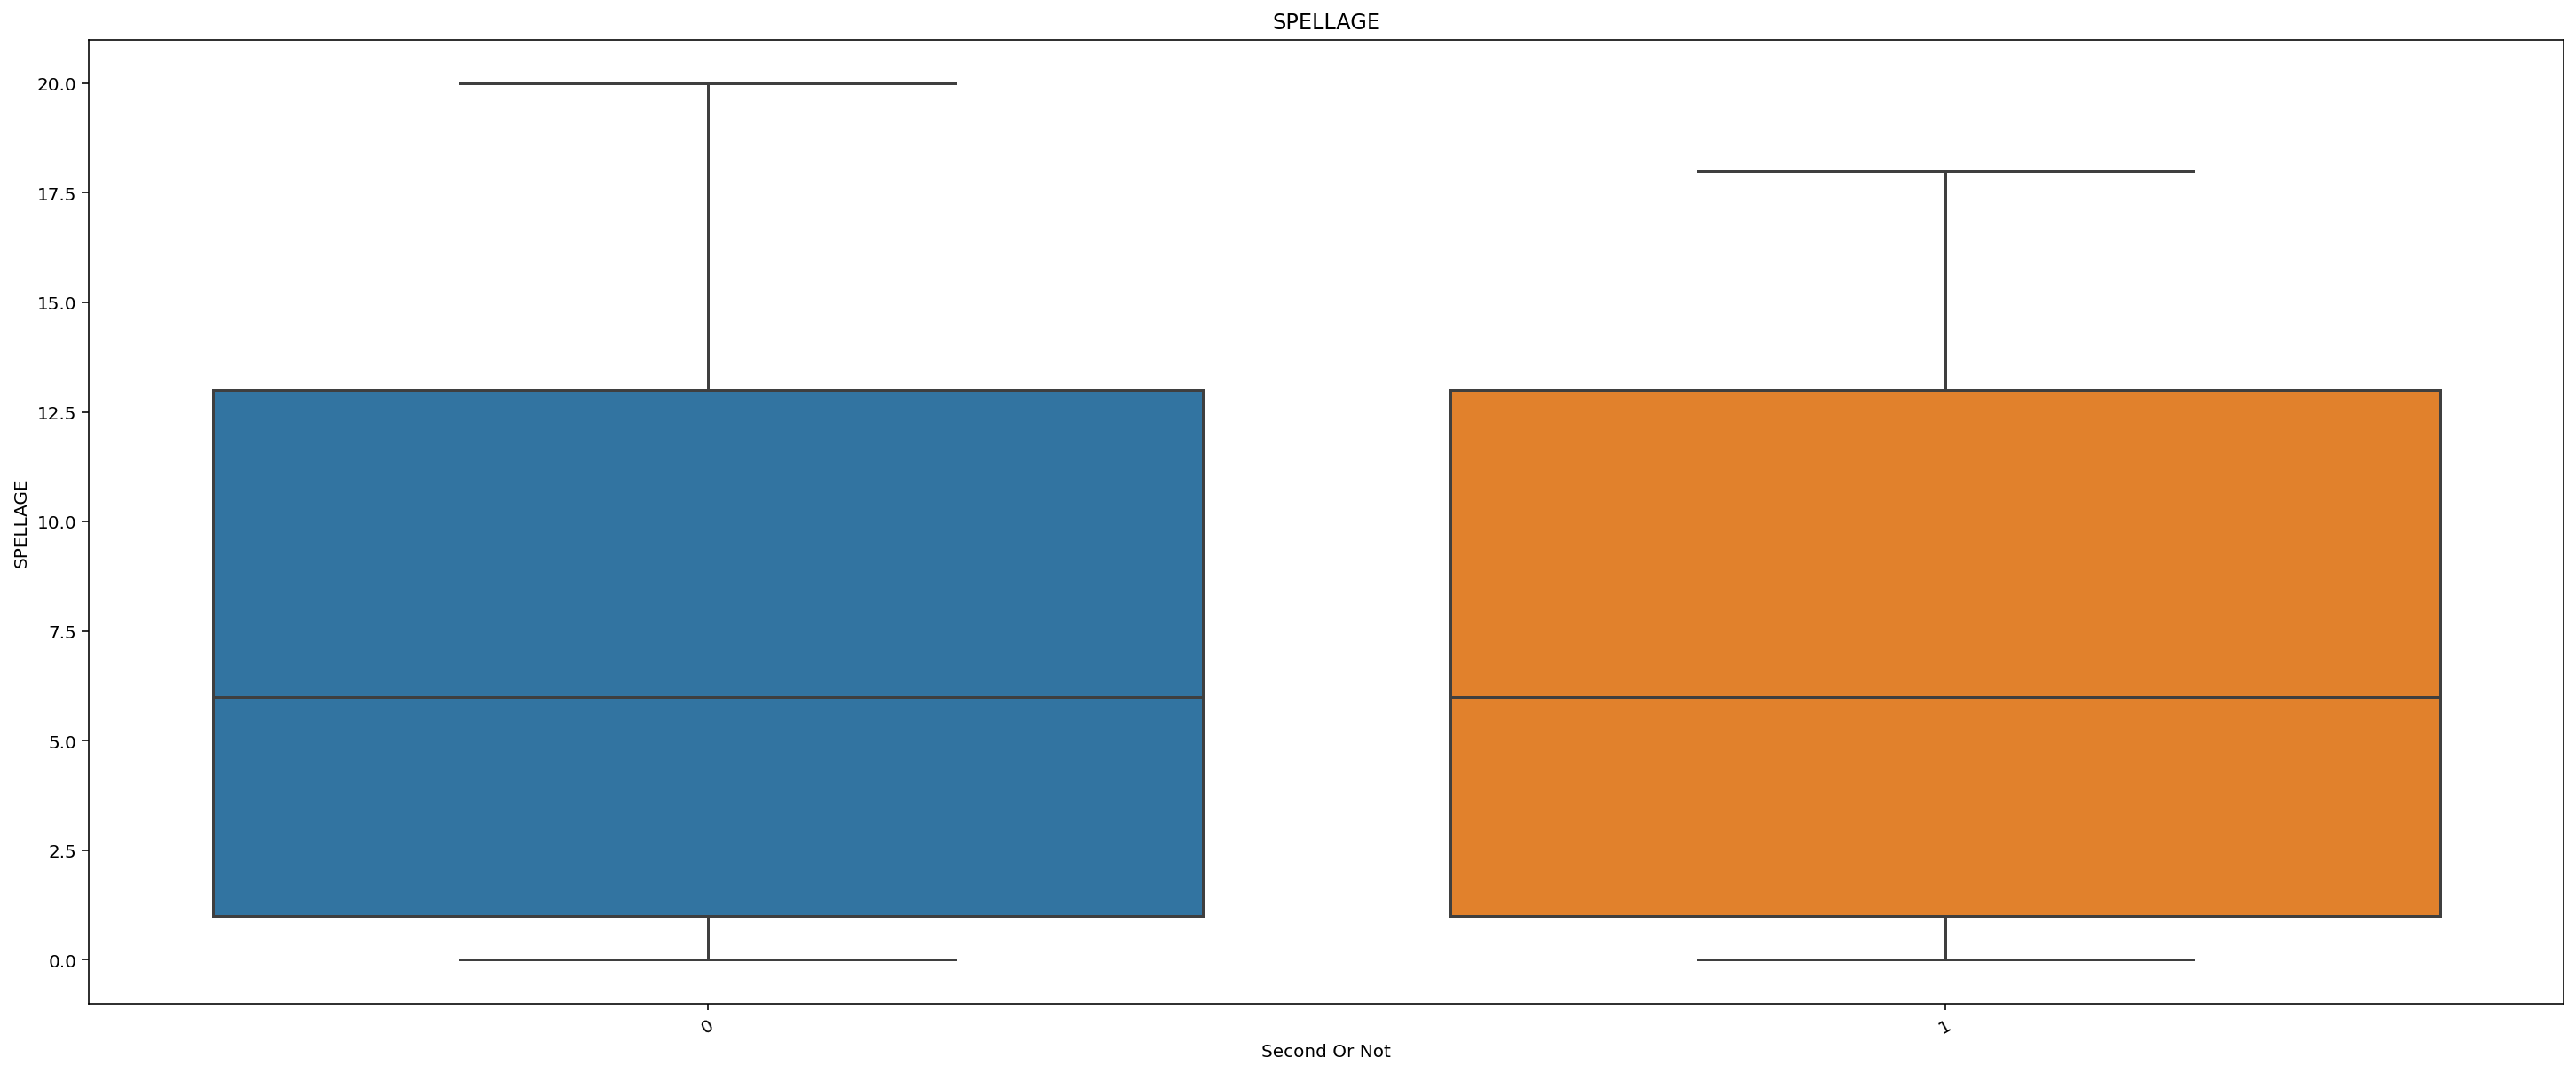

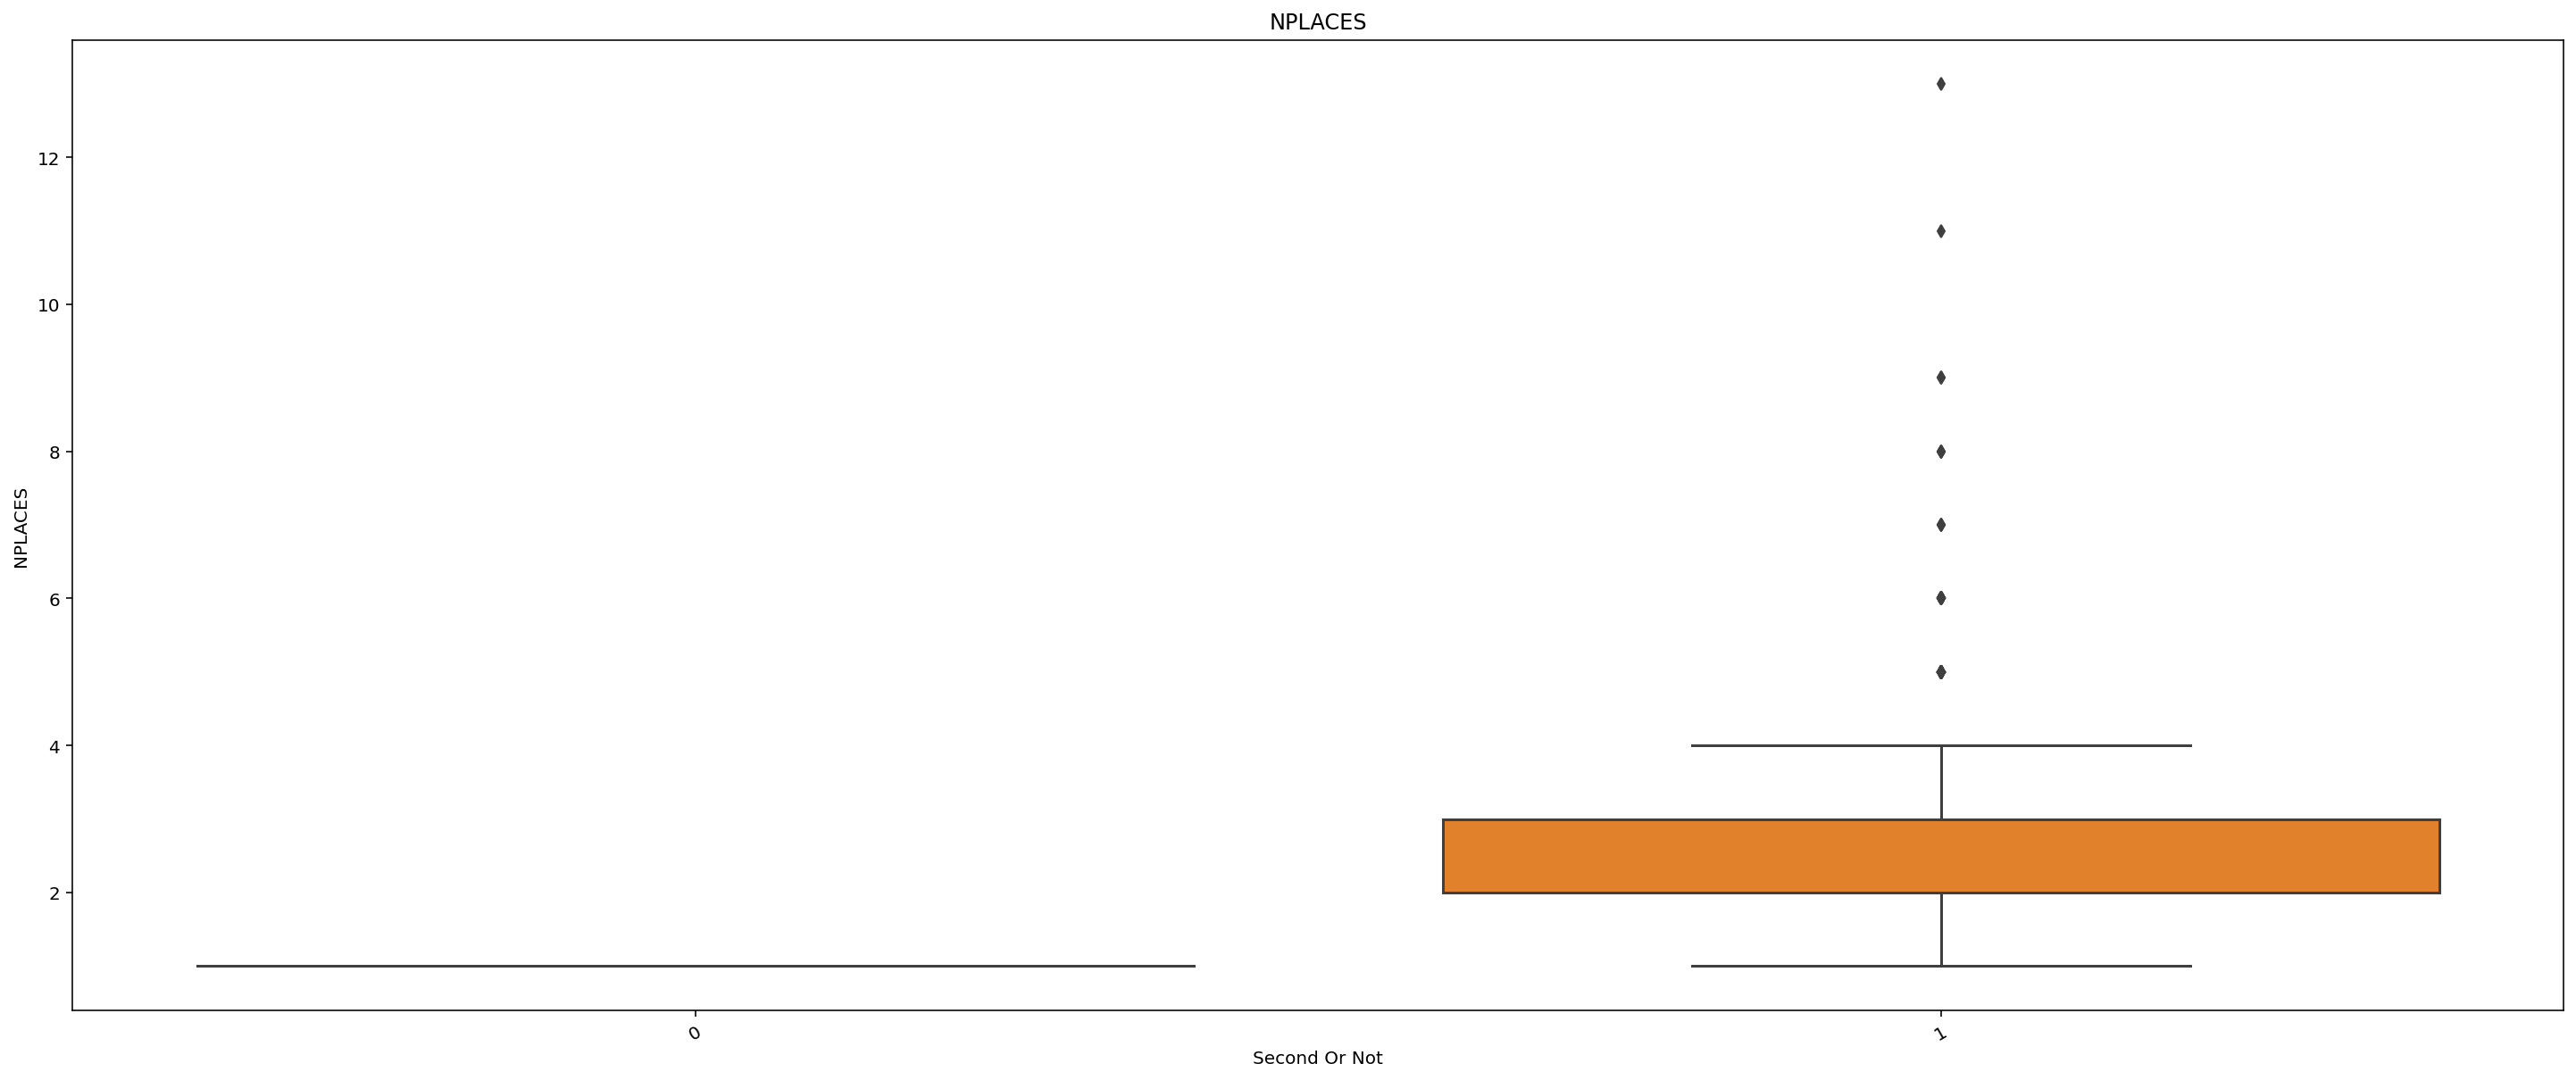

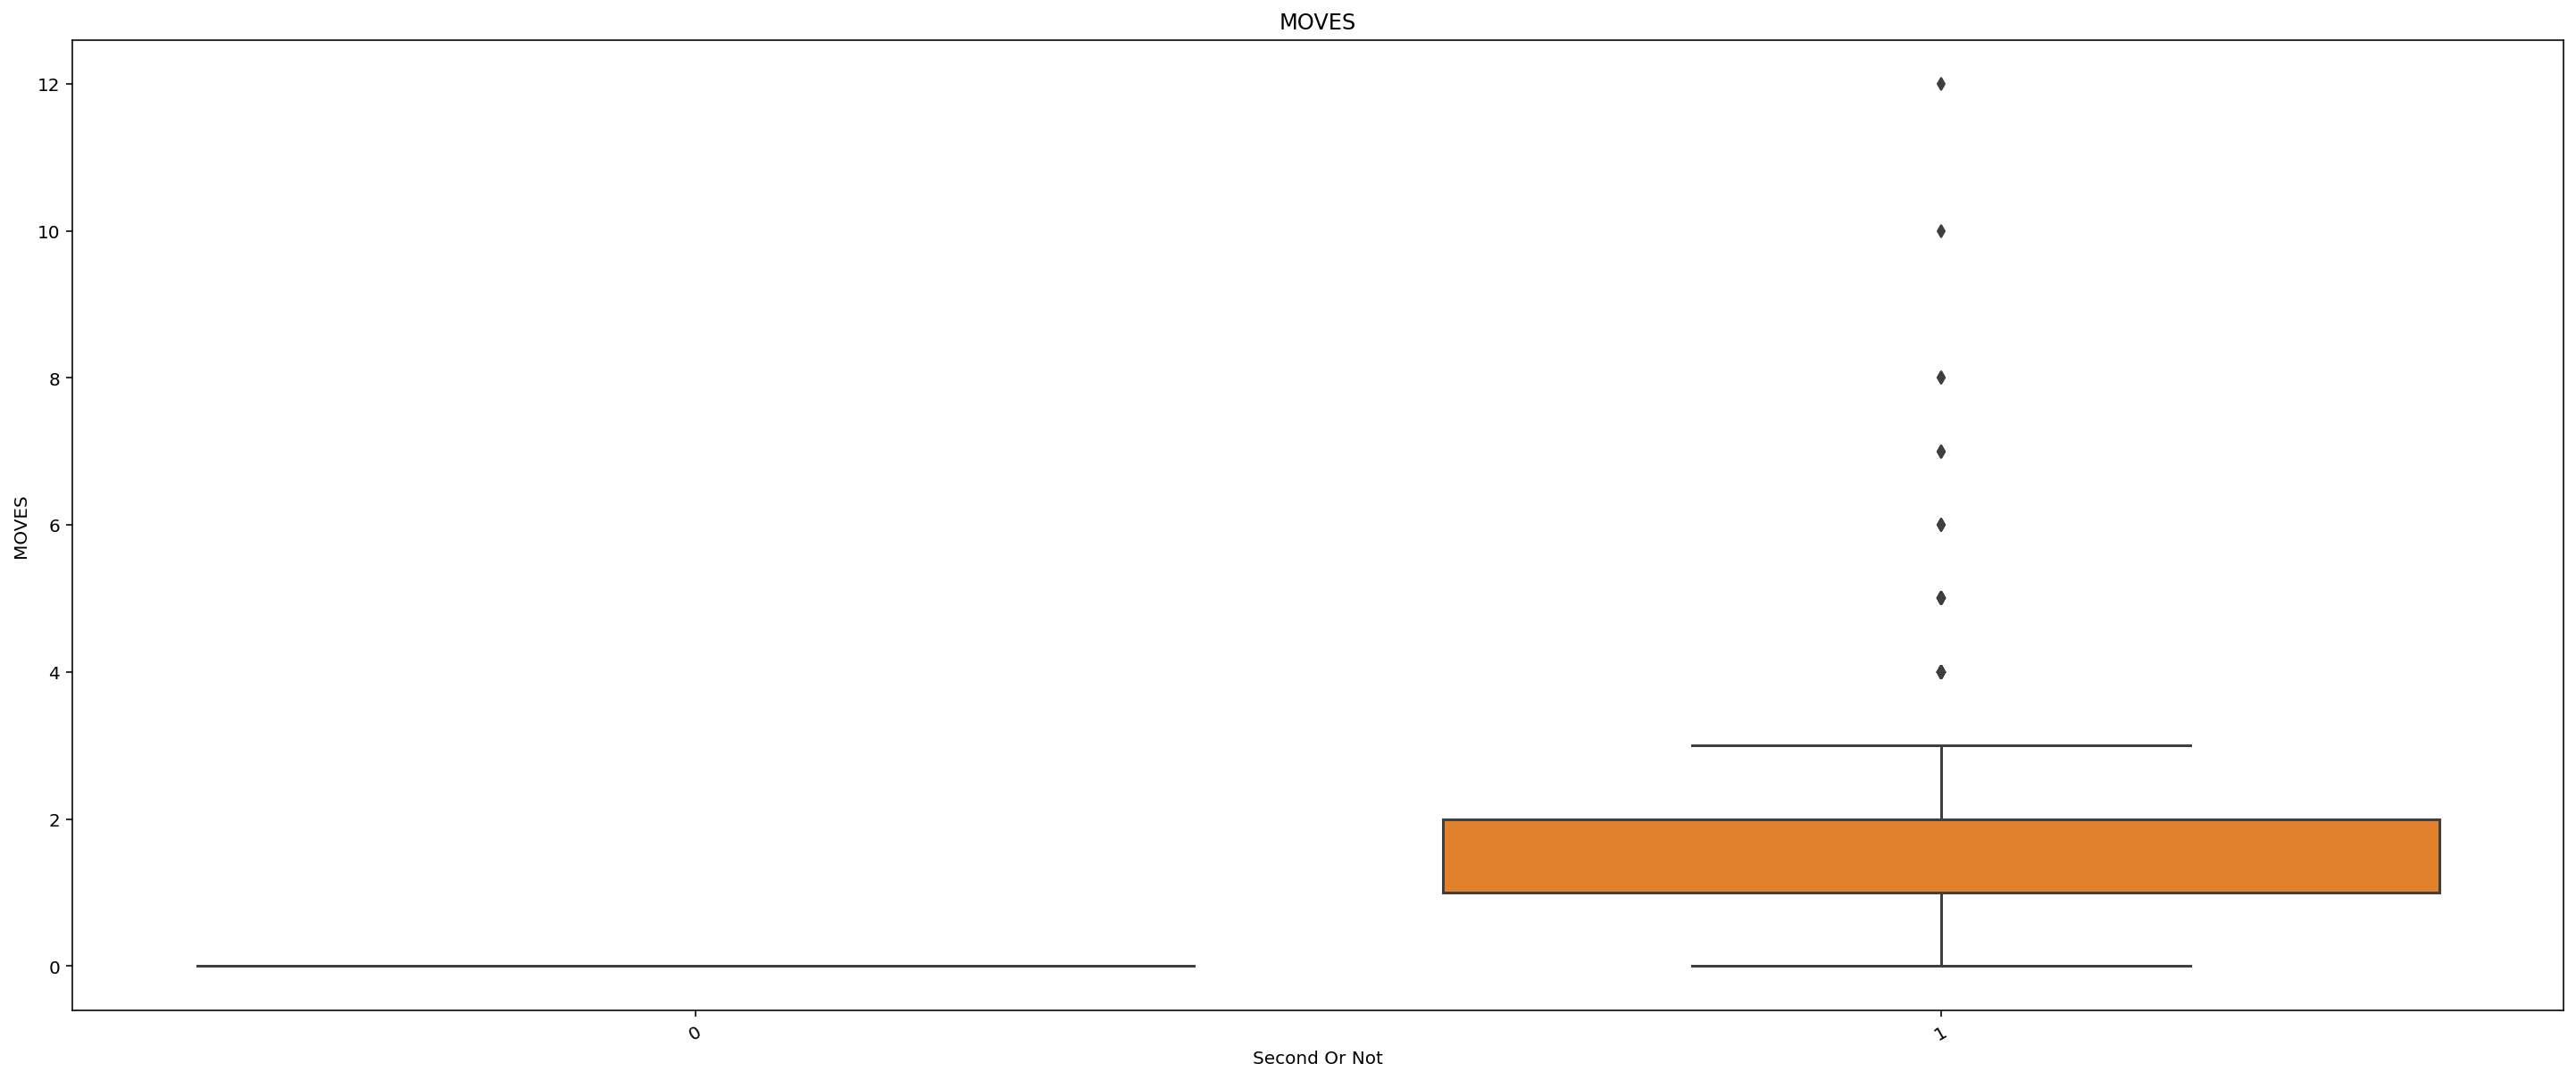

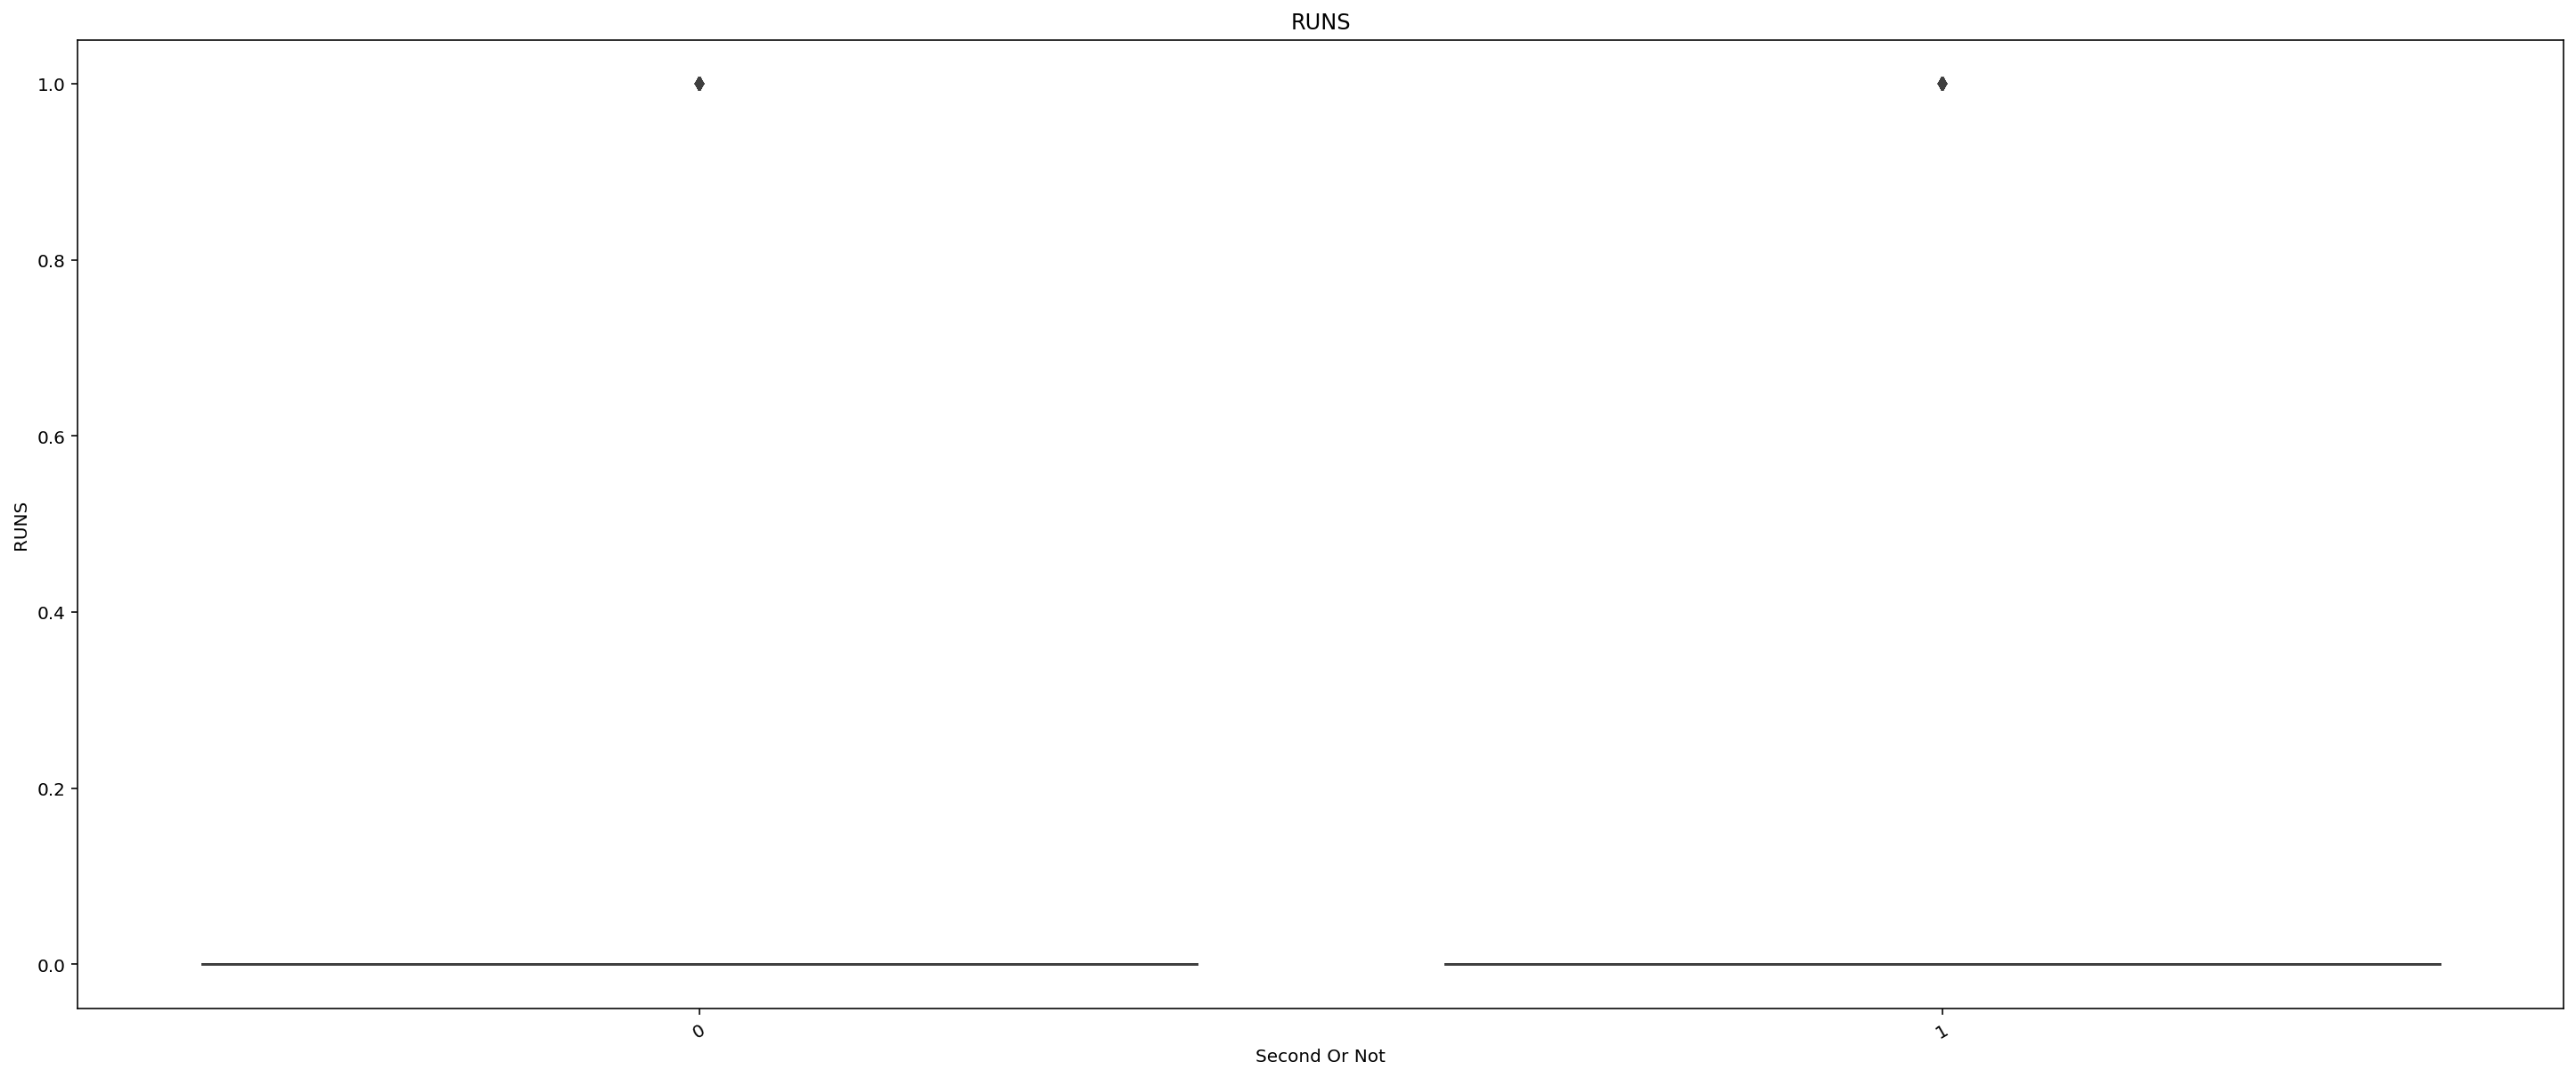

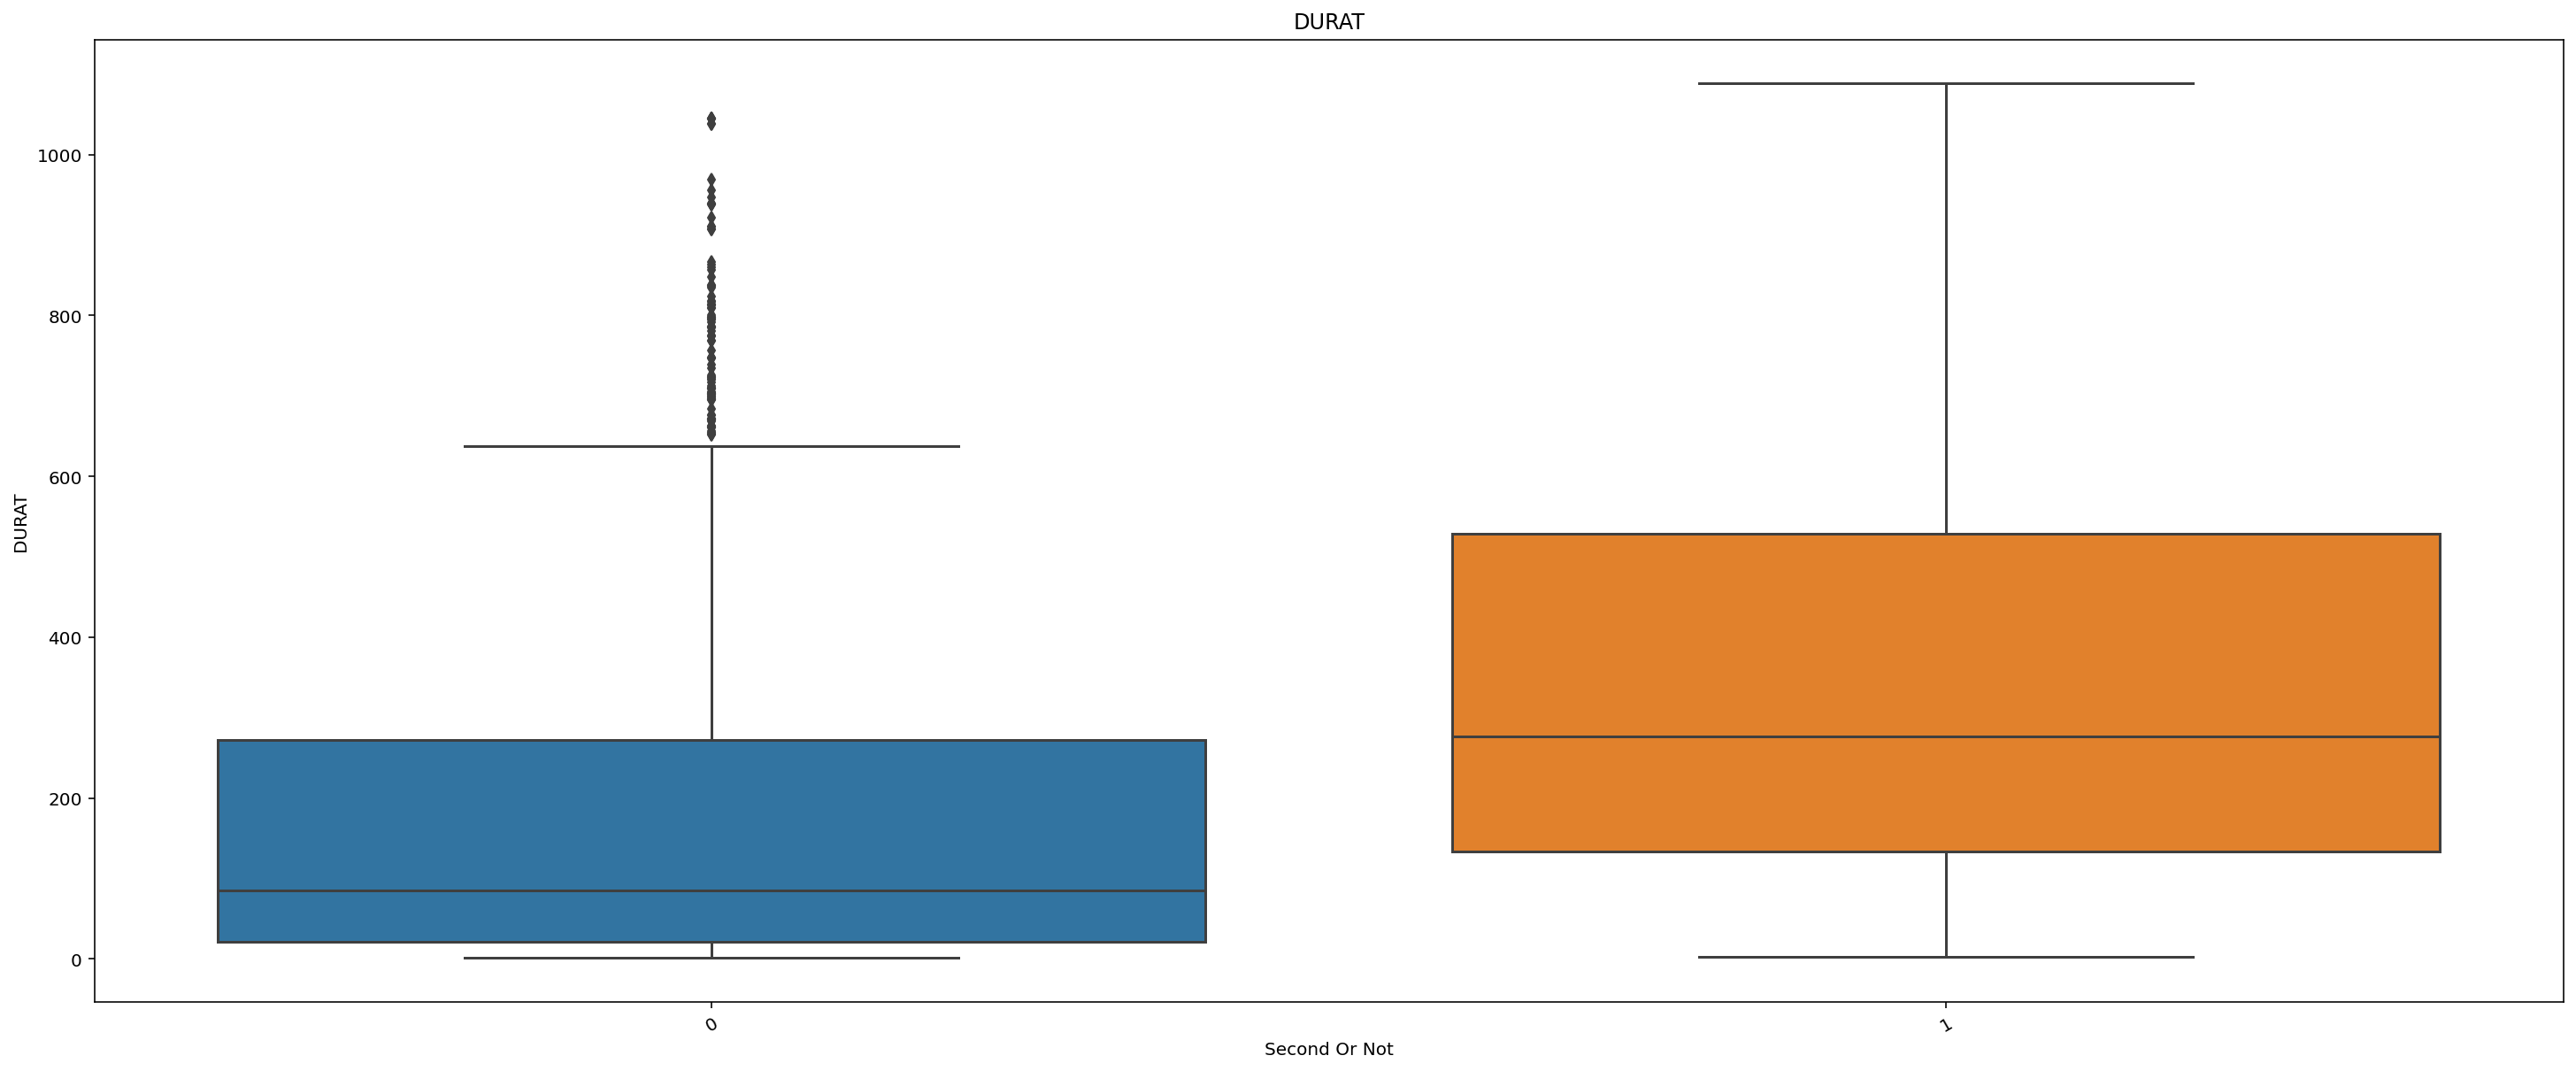

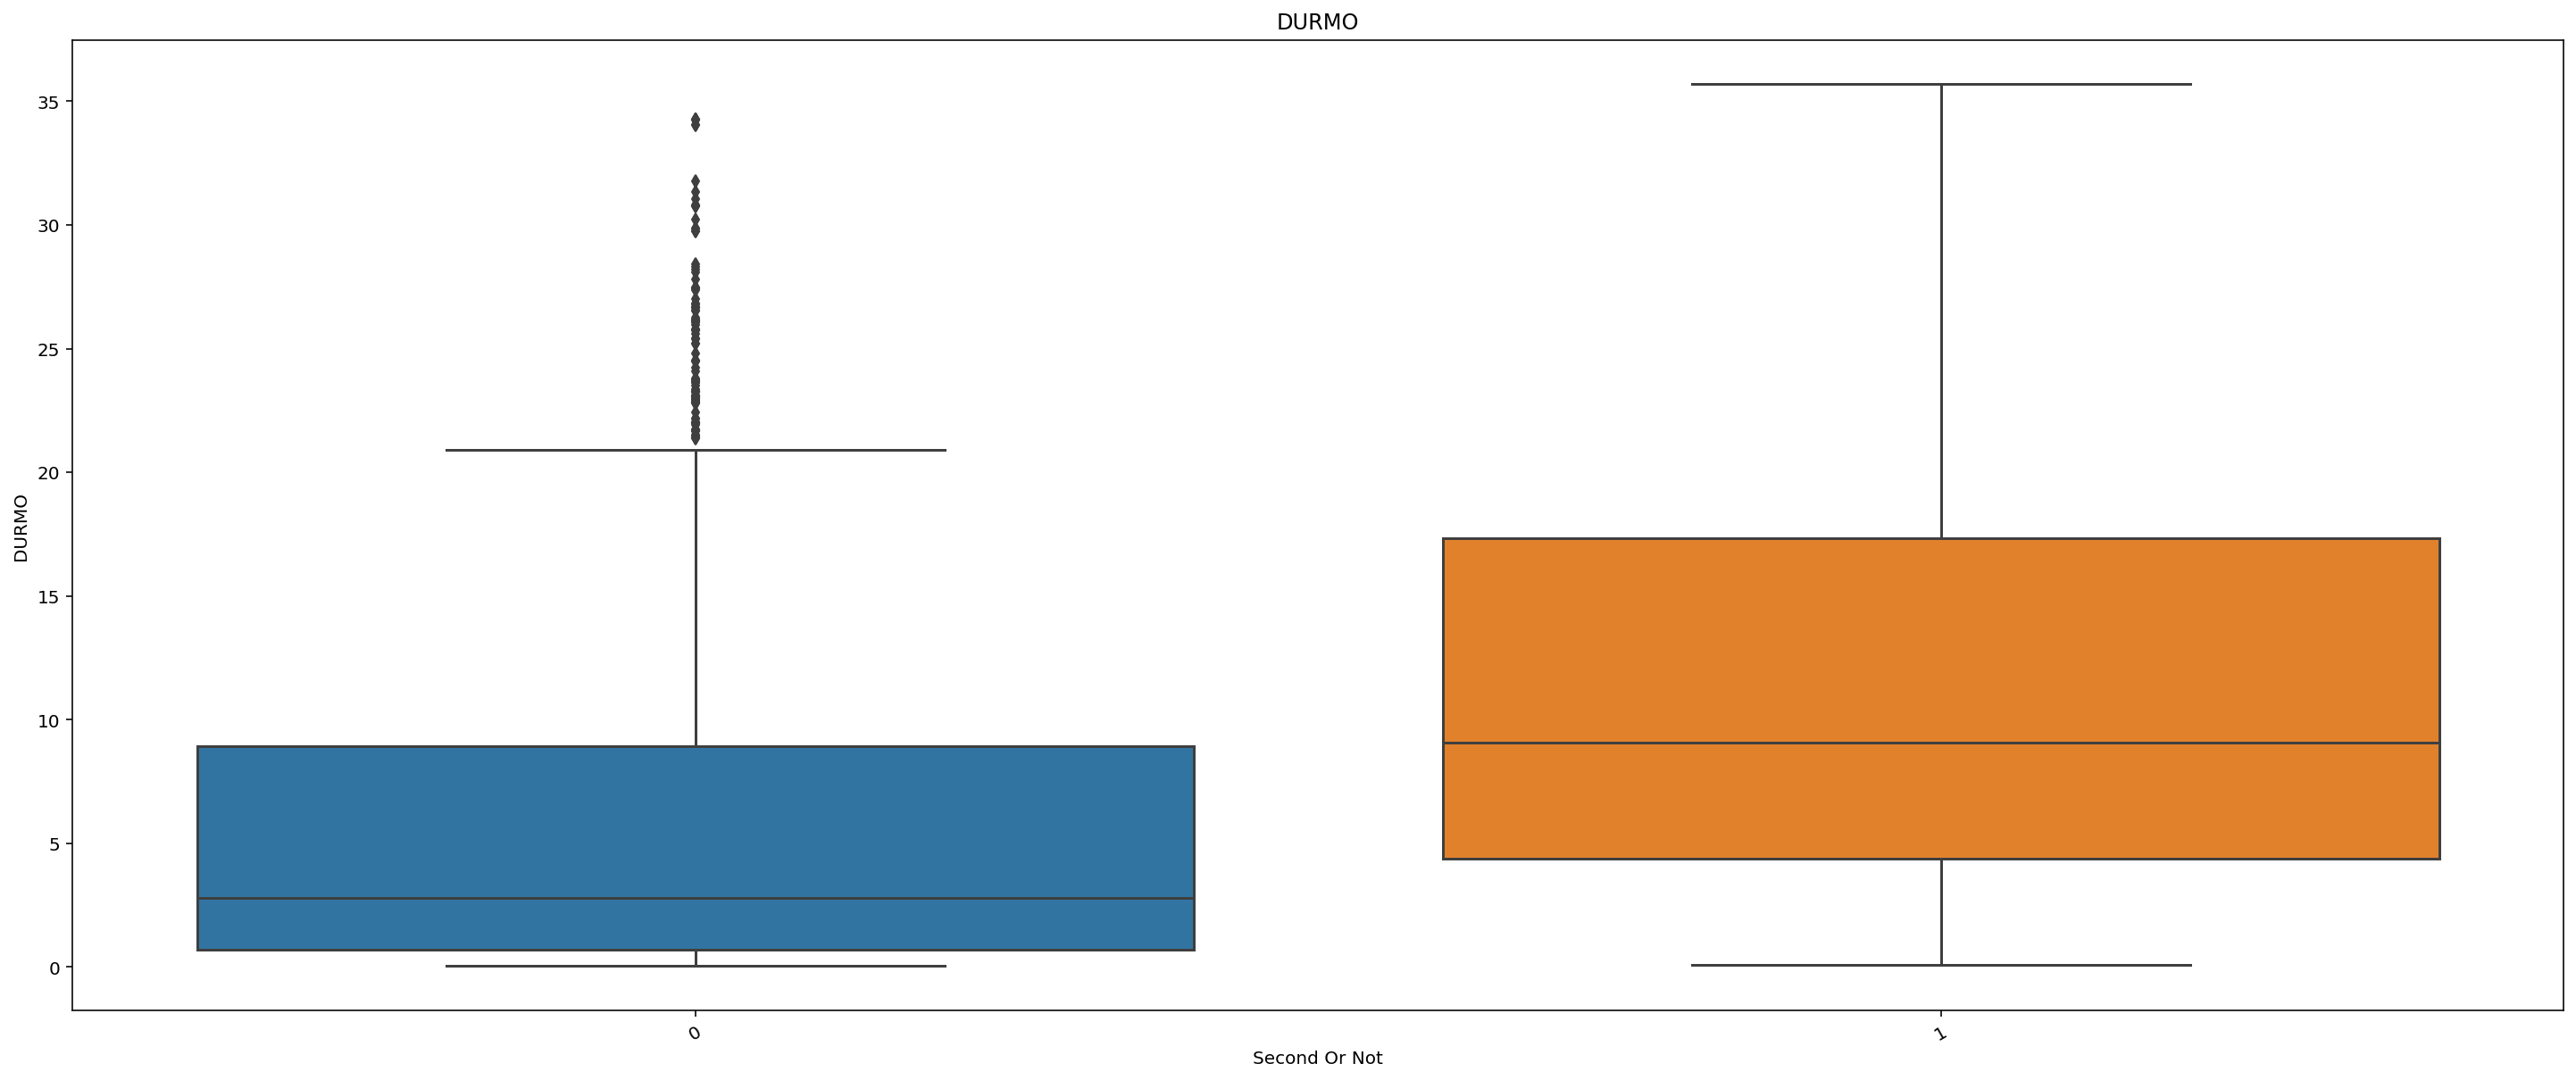

In [84]:
fig = plt.figure(figsize = (120,160))
count = 1
for feature in raw_numerical_var:
    boxplt(x = 'Second Or Not', y = feature,title = feature)
    count +=1

#### Date Features

In [157]:
raw_date_var 

['INYEAR',
 'START',
 'STOP',
 'PLACE2_DATE',
 'IM',
 'IY',
 'IYMO',
 'OM',
 'OY',
 'OYMO']

In [163]:
data_df['INYEAR'].value_counts()

2014    982
2015    969
2016    898
Name: INYEAR, dtype: int64

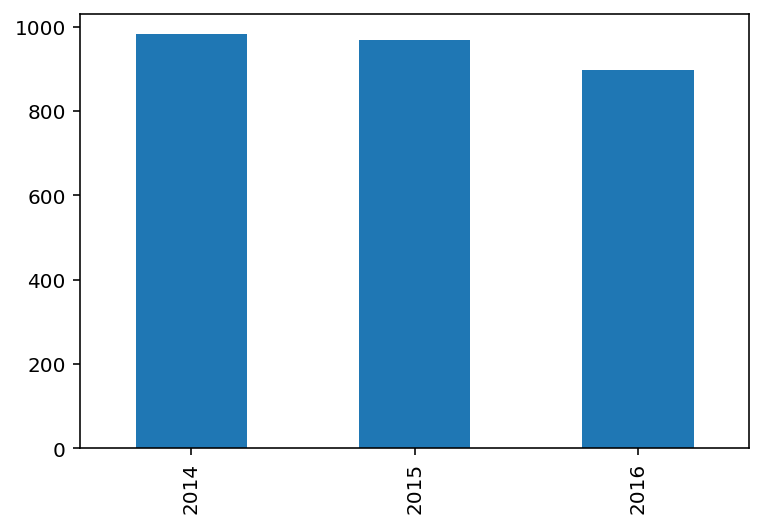

In [164]:
data_df['INYEAR'].value_counts().plot(kind = 'bar')

In [168]:
start_count = data_df['START'].value_counts().sort_index()
start_count

2014-01-02    1
2014-01-03    2
2014-01-06    4
2014-01-07    2
2014-01-08    8
             ..
2016-12-23    1
2016-12-24    2
2016-12-25    2
2016-12-27    3
2016-12-30    4
Name: START, Length: 834, dtype: int64

Text(0.5, 1.0, 'Start Count ')

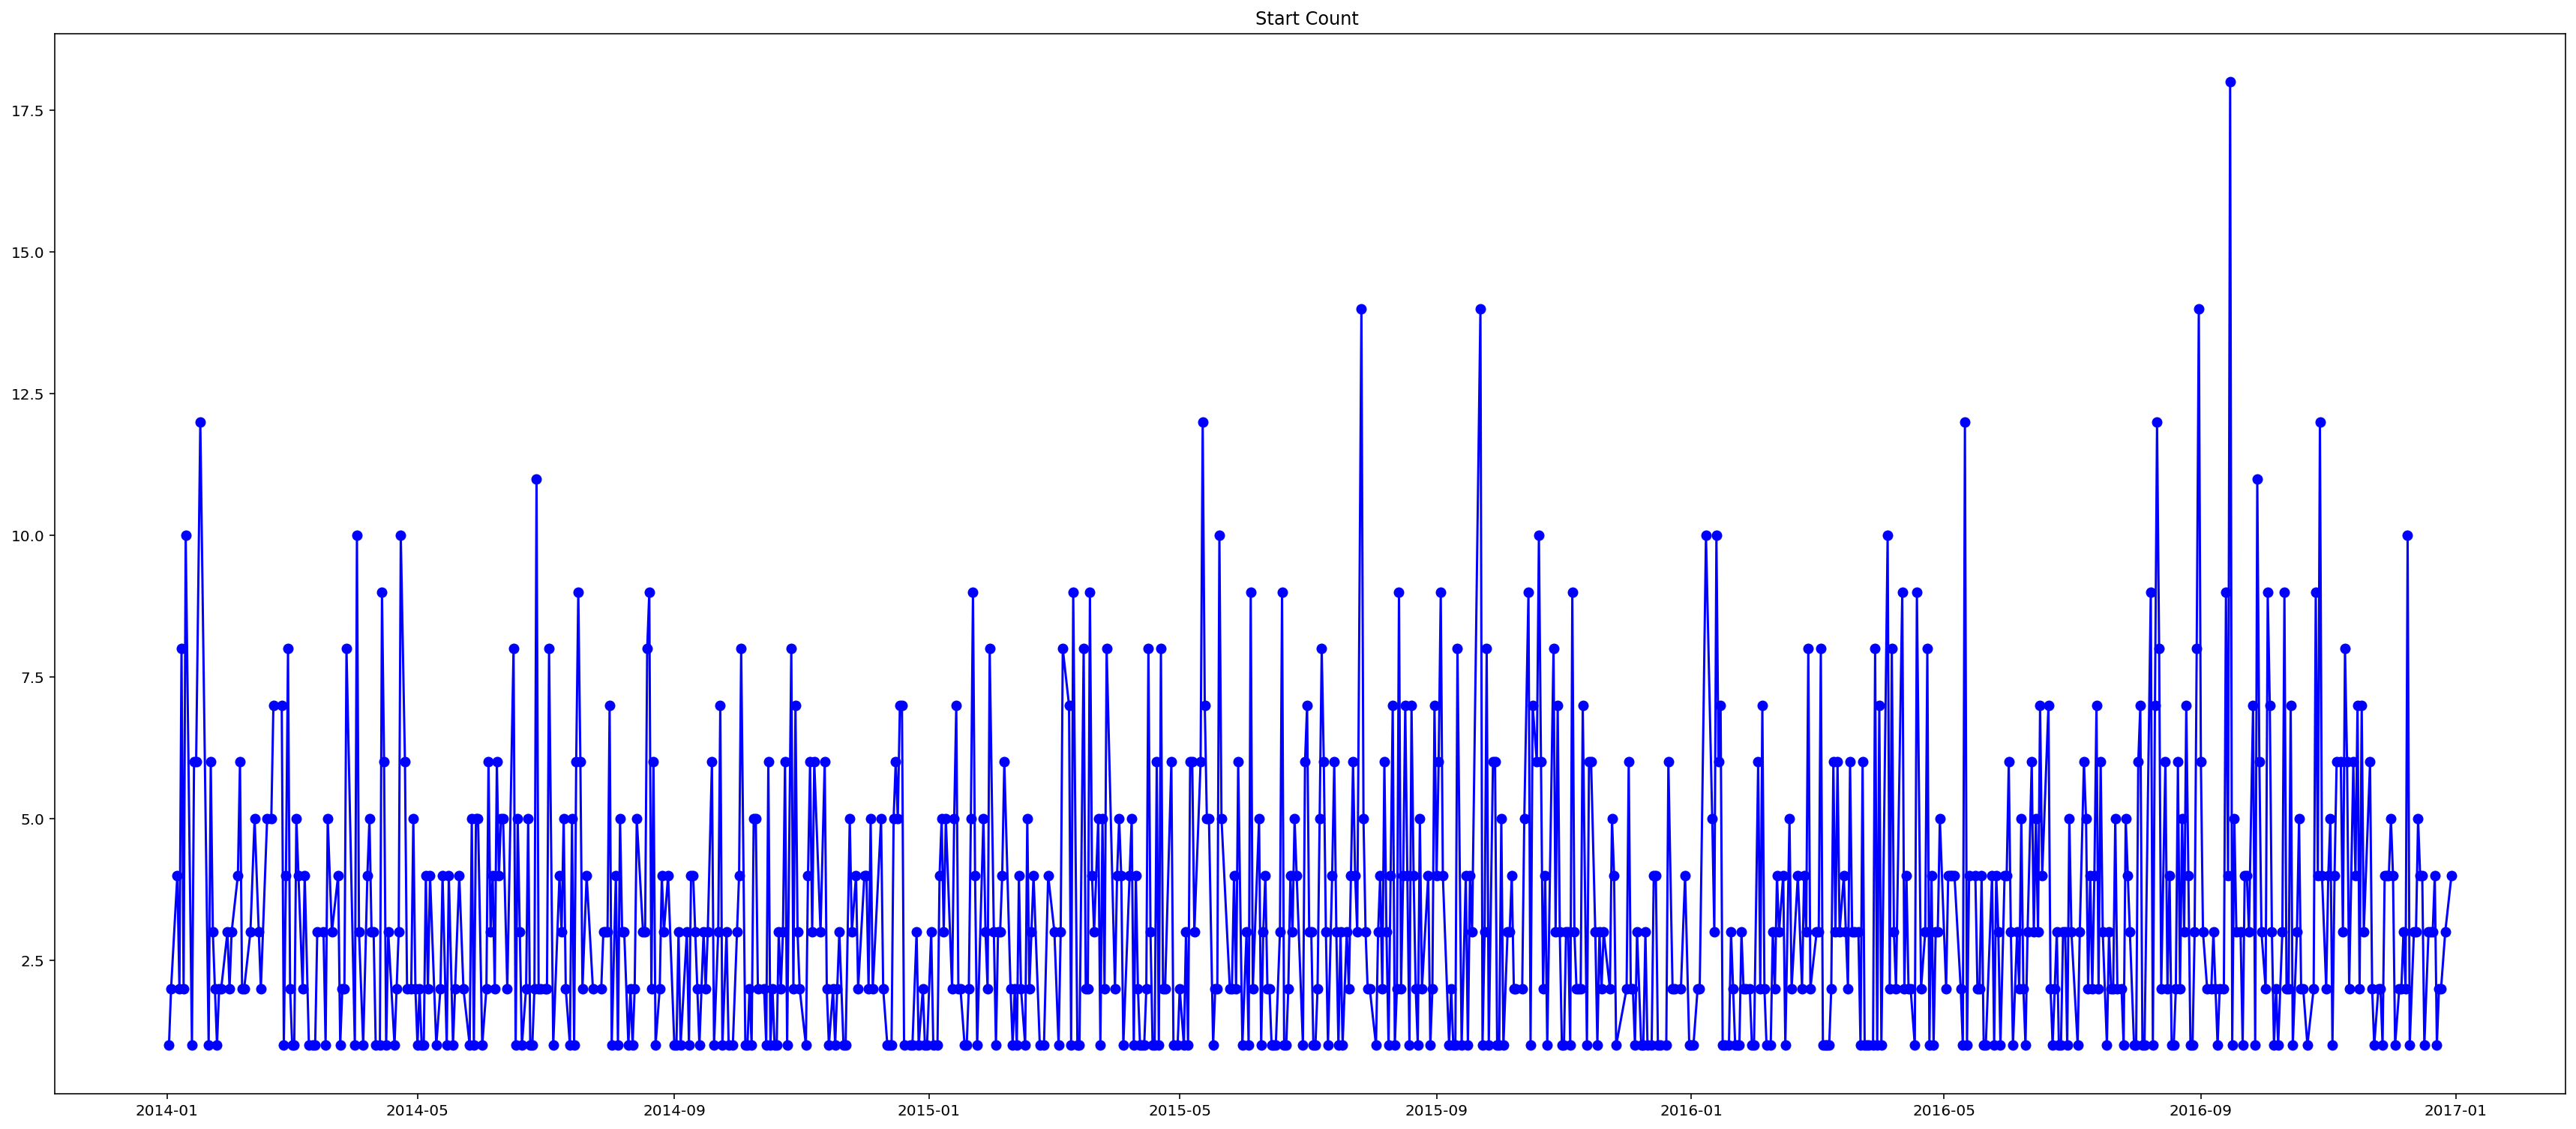

In [169]:
fig,ax = plt.subplots(figsize = (30,13))
plt.plot(start_count.index,start_count,'o-',color = 'b',label="DAU")
ax.set_title('Start Count ')

In [170]:
stop_count = data_df['STOP'].value_counts().sort_index()
stop_count

2014-01-10       1
2014-01-17       2
2014-01-24       1
2014-01-27       1
2014-01-28       1
              ... 
2016-12-21       8
2016-12-22       3
2016-12-27       1
2016-12-30       1
2017-01-01    1062
Name: STOP, Length: 639, dtype: int64

Text(0.5, 1.0, 'Stop Count ')

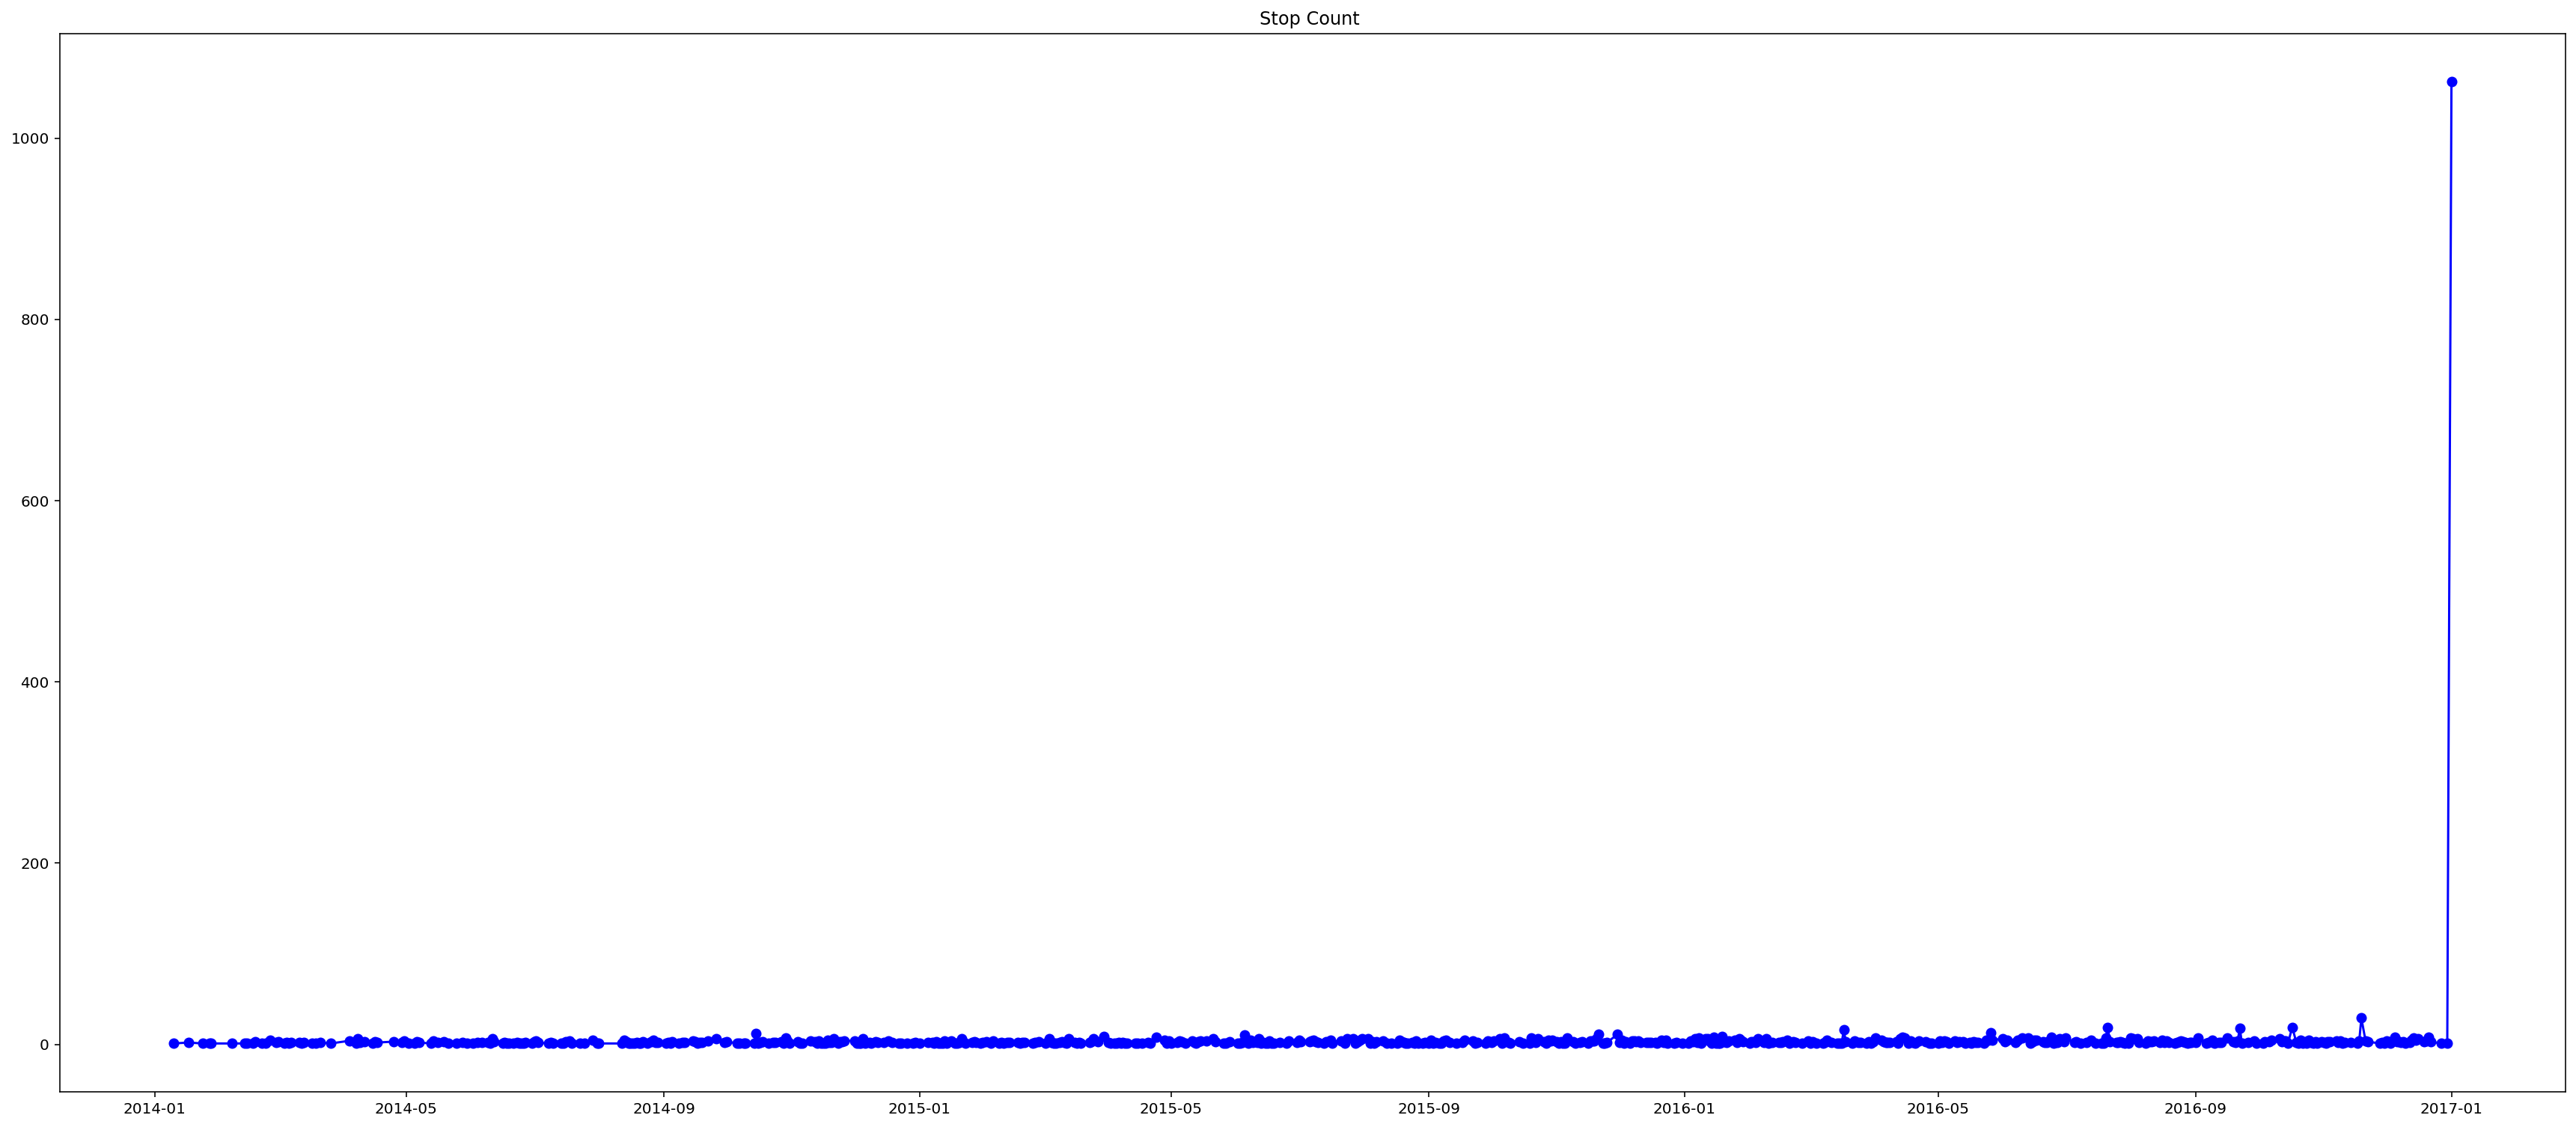

In [173]:
fig,ax = plt.subplots(figsize = (30,13))
plt.plot(stop_count.index,stop_count,'o-',color = 'b',label="DAU")
ax.set_title('Stop Count ')

In [177]:
second_start_count = data_df[data_df['PLACE2_DATE']!=0]['PLACE2_DATE'].value_counts().sort_index()
second_start_count

2014-01-09    1
2014-01-10    1
2014-01-13    1
2014-01-21    4
2014-01-22    1
             ..
2016-12-17    2
2016-12-19    3
2016-12-22    1
2016-12-23    3
2016-12-30    1
Name: PLACE2_DATE, Length: 516, dtype: int64

Text(0.5, 1.0, 'Second Start Count')

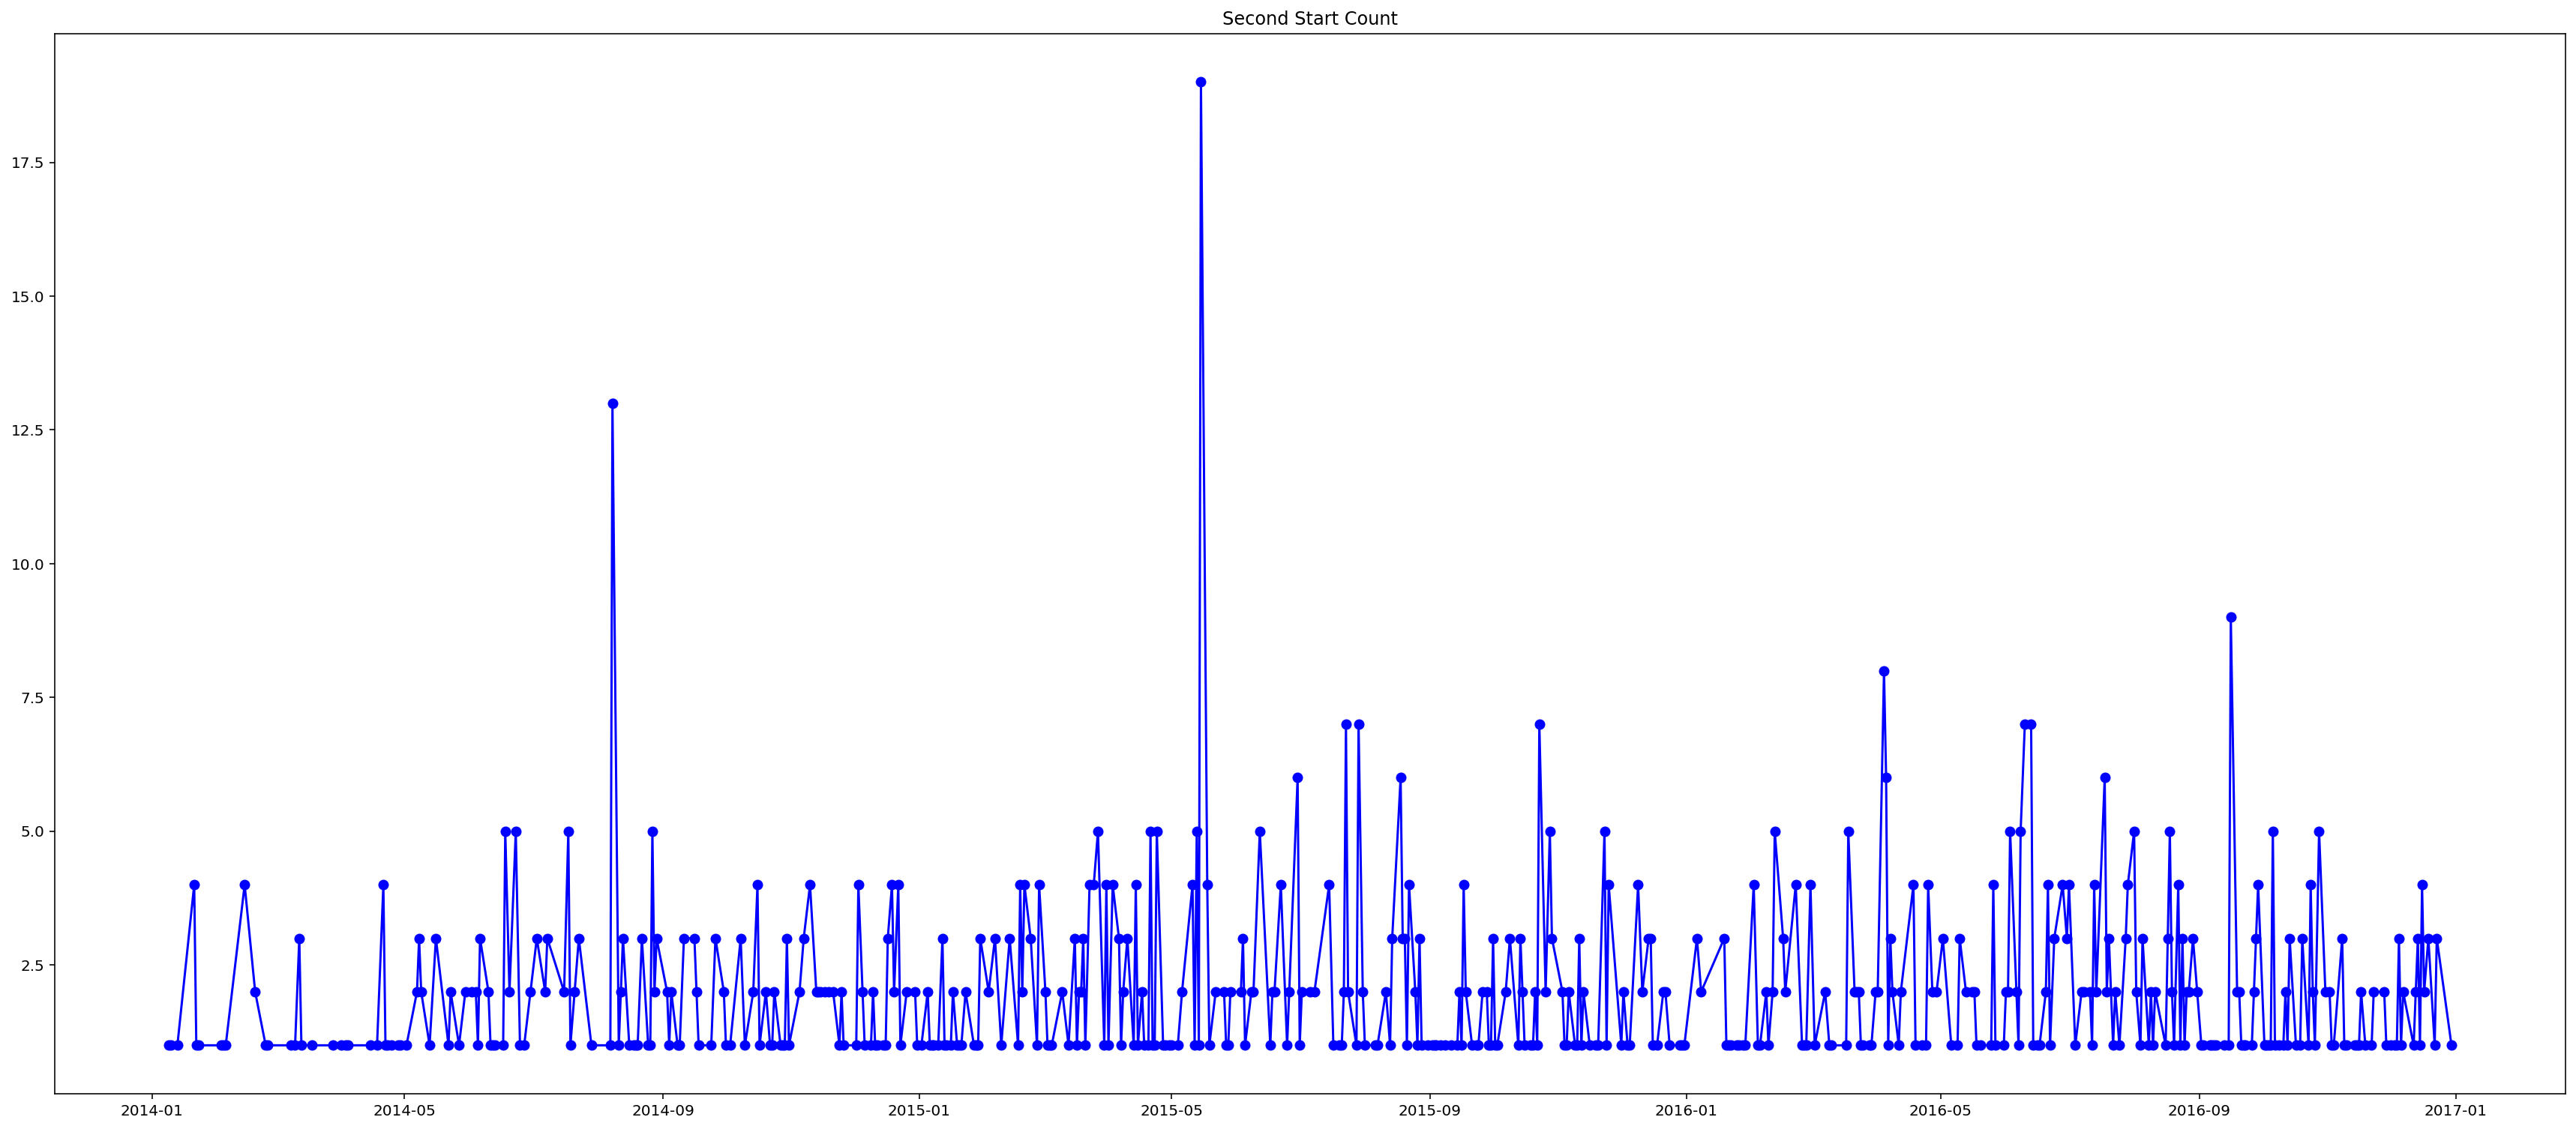

In [179]:
fig,ax = plt.subplots(figsize = (30,13))
plt.plot(second_start_count.index,second_start_count,'o-',color = 'b',label="DAU")
ax.set_title('Second Start Count')

Text(0.5, 1.0, '1st v.s. 2nd Start Count ')

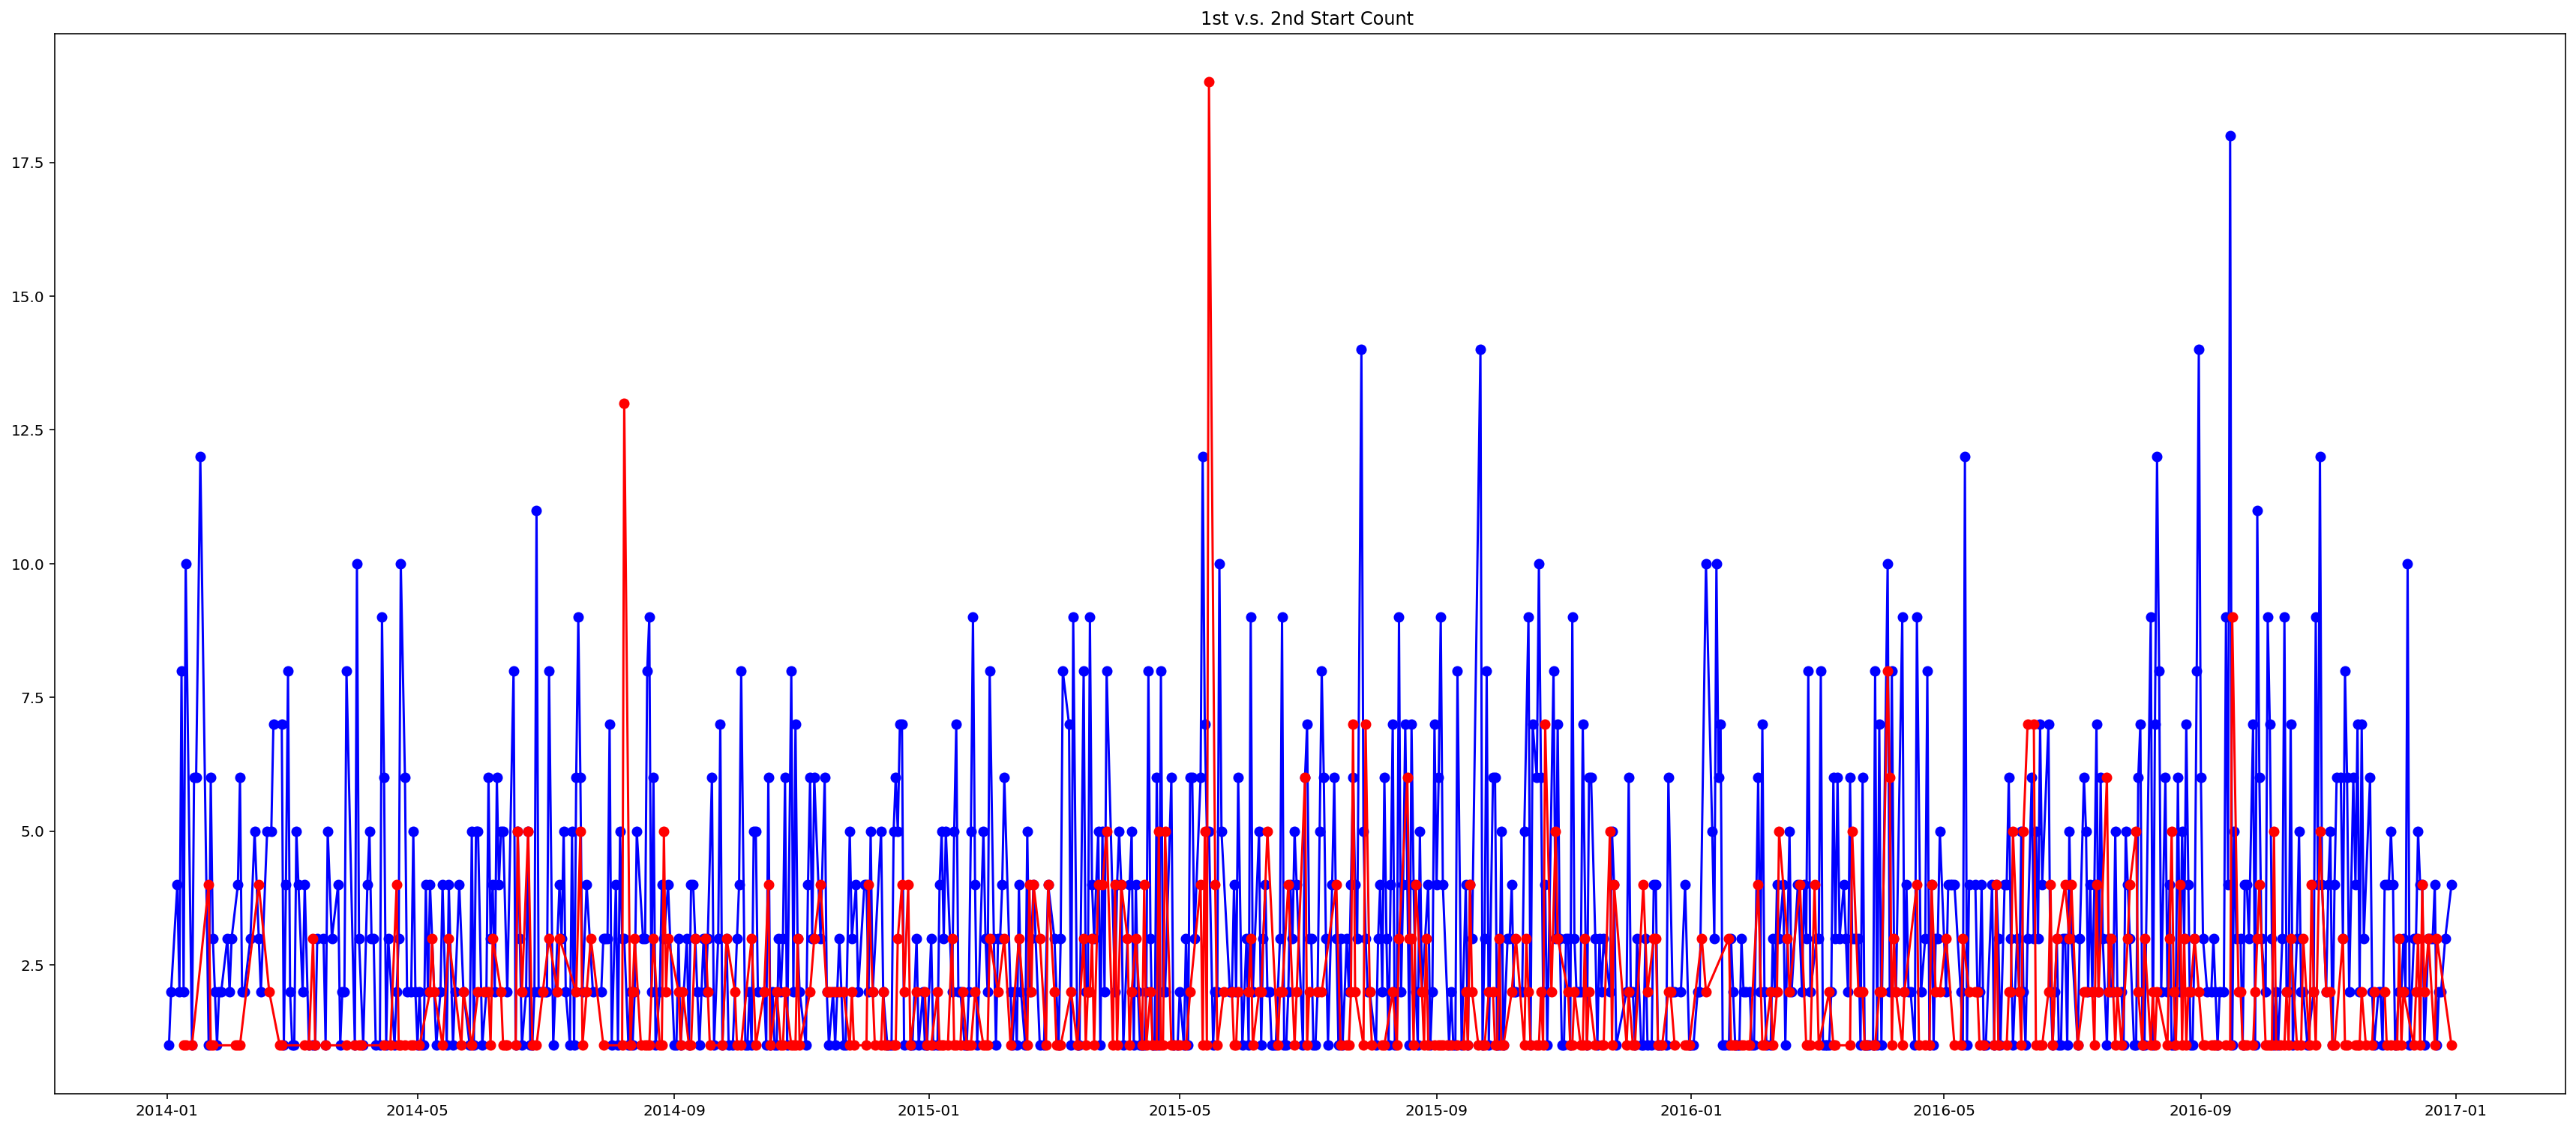

In [180]:
fig,ax = plt.subplots(figsize = (30,13))
plt.plot(start_count.index,start_count,'o-',color = 'b',label="First Start")
plt.plot(second_start_count.index,second_start_count,'o-',color = 'r',label="Second Start")
ax.set_title('1st v.s. 2nd Start Count ')

## 2.4 Data Transformation

In [88]:
data_df.dtypes

ID                        int64
ST_CNTYNAME              object
GENDER                   object
HISPANIC                 object
ETHNIC                   object
ETHNIC2                  object
AGE_20161231              int64
AGECAT7                 float64
SPELLAGE                  int64
INYEAR                    int64
SPELL                     int64
START            datetime64[ns]
STOP             datetime64[ns]
SPELLONE                  int64
TYPE                     object
PLACE1                   object
PLACE2                   object
PLACE2_DATE              object
LASTPLACE                object
LEVELCHG                  int64
NPLACES                   int64
MOVES                     int64
DISCH                     int64
RUNS                      int64
REENTER                   int64
DURAT                     int64
DURMO                   float64
DURCAT                    int64
RECAT                     int64
EXIT                     object
IM                        int64
IY      

In [89]:
data_df[raw_ordinal_var].dtypes

AGECAT7    float64
DURCAT       int64
RECAT        int64
dtype: object

In [90]:
data_df[raw_nominal_var].dtypes

ID              int64
ST_CNTYNAME    object
GENDER         object
HISPANIC       object
ETHNIC         object
ETHNIC2        object
SPELL           int64
SPELLONE        int64
TYPE           object
PLACE1         object
PLACE2         object
LASTPLACE      object
LEVELCHG        int64
DISCH           int64
REENTER         int64
EXIT           object
dtype: object

In [316]:
for col in multi_var:
    feature_data_df =  pd.get_dummies(data_df[col], prefix=col)
    print(feature_data_df)
    data_df = data_df.drop(columns = [col])
    data_df = data_df.join(feature_data_df)
    print(data_df)

      TYPE_AL  TYPE_FC  TYPE_GH  TYPE_IL  TYPE_KC  TYPE_MX  TYPE_RC  TYPE_RT  TYPE_SF  TYPE_SG  TYPE_UK
0           0        0        0        0        0        0        0        0        0        1        0
1           0        0        0        0        1        0        0        0        0        0        0
2           0        0        0        0        1        0        0        0        0        0        0
3           0        1        0        0        0        0        0        0        0        0        0
4           0        0        0        0        1        0        0        0        0        0        0
...       ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...
2844        0        0        0        0        1        0        0        0        0        0        0
2845        0        0        0        0        0        0        0        0        0        1        0
2846        0        0        0        0        0        0      

      LASTPLACE_PAL  LASTPLACE_PFC  LASTPLACE_PGH  LASTPLACE_PIL  LASTPLACE_PKC  LASTPLACE_PRC  LASTPLACE_PRT  LASTPLACE_PSF  LASTPLACE_PSG  LASTPLACE_PUK
0                 0              0              0              0              0              0              0              0              1              0
1                 0              0              0              0              1              0              0              0              0              0
2                 0              0              0              0              1              0              0              0              0              0
3                 0              1              0              0              0              0              0              0              0              0
4                 0              0              0              0              1              0              0              0              0              0
...             ...            ...            ...            ...      

In [317]:
data_df

ID   ST_CNTYNAME GENDER  AGE_20161231  AGECAT7  SPELLAGE  INYEAR      START       STOP  SPELLONE          PLACE2_DATE  LEVELCHG  NPLACES  MOVES  DISCH  RUNS  REENTER  DURAT      DURMO  DURCAT  RECAT  IM    IY    IYMO  OM    OY    OYMO  Second Or Not  First Spell Duration  TYPE_AL  TYPE_FC  TYPE_GH  TYPE_IL  TYPE_KC  TYPE_MX  TYPE_RC  TYPE_RT  TYPE_SF  TYPE_SG  TYPE_UK  PLACE2_0  PLACE2_PAL  PLACE2_PFC  PLACE2_PGH  PLACE2_PIL  PLACE2_PKC  PLACE2_PRC  PLACE2_PRT  PLACE2_PSF  PLACE2_PSG  PLACE2_PUK  PLACE1_PAL  PLACE1_PFC  PLACE1_PGH  PLACE1_PIL  PLACE1_PKC  PLACE1_PRC  PLACE1_PRT  PLACE1_PSF  PLACE1_PSG  PLACE1_PUK  SPELL_1  SPELL_2  SPELL_3  SPELL_4  SPELL_5  SPELL_6  EXIT_XCA  EXIT_XJP  EXIT_XLC  EXIT_XOP  EXIT_XOT  EXIT_XRF  EXIT_XRL  EXIT_XRM  EXIT_XRY  EXIT_XUK  EXIT_ZTC  LASTPLACE_PAL  LASTPLACE_PFC  LASTPLACE_PGH  LASTPLACE_PIL  LASTPLACE_PKC  LASTPLACE_PRC  LASTPLACE_PRT  LASTPLACE_PSF  LASTPLACE_PSG  LASTPLACE_PUK  HISPANIC_N  HISPANIC_U  HISPANIC_Y  ETHNIC2_BL  \
0     3000901899  PA_Allegheny      F            20      7.0        17    2014 2014-01-02 2014-04-29         1                    0         0        1      0      1     0        0    117   3.836066       3      6   1  2014  201401   4  2014  201404              0                   117        0        0        0        0        0        0        0        0        0        1        0         1           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0        1        0        0        0        0        0         0         0         0         0         0         1         0         0         0         0         0              0              0              0              0              0              0              0              0              1              0           0           1           0           0   
1     3002061648  PA_Allegheny      M             7      3.0         4    2014 2014-01-03 2014-03-04         1                    0         0        1      0      1     0        0     60   1.967213       2      6   1  2014  201401   3  2014  201403              0                    60        0        0        0        0        1        0        0        0        0        0        0         1           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0        1        0        0        0        0        0         0         0         0         0         0         1         0         0         0         0         0              0              0              0              0              1              0              0              0              0              0           0           1           0           1   
2     3002306442  PA_Allegheny      M             3      1.0         0    2014 2014-01-03 2014-02-25         1                    0         0        1      0      1     0        1     53   1.737705       2      1   1  2014  201401   2  2014  201402              0                    53        0        0        0        0        1        0        0        0        0        0        0         1           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0        1        0        0        0        0        0         0         0         0         0         0         1         0         0         0         0         0              0              0              0              0              1              0              0              0              0              0           1           0           0           0   
3     30020127

In [318]:
data_df['First Spell Duration'] = (data_df['STOP']-data_df['START']).dt.days

In [319]:
data_df['First Spell Duration']

0       117
1        60
2        53
3       939
4       939
       ... 
2844      5
2845      2
2846      2
2847      2
2848      2
Name: First Spell Duration, Length: 2849, dtype: int64

In [320]:
data_df.shape

(2849, 101)

In [328]:
data_df['GENDER']=data_df['GENDER'].replace(['M','F'],[1,0])

In [329]:
data_df[binary_var]

GENDER  SPELLONE  LEVELCHG  DISCH  REENTER
0          0         1         0      1        0
1          1         1         0      1        0
2          1         1         0      1        1
3          1         1         0      1        0
4          0         1         0      1        0
...      ...       ...       ...    ...      ...
2844       1         1         0      0        0
2845       1         1         0      0        0
2846       0         1         0      0        0
2847       1         1         0      0        0
2848       1         1         0      0        0

[2849 rows x 5 columns]

In [330]:
data_df.columns

Index(['ID', 'ST_CNTYNAME', 'GENDER', 'AGE_20161231', 'AGECAT7', 'SPELLAGE', 'INYEAR', 'START', 'STOP', 'SPELLONE',
       ...
       'ETHNIC2_BL', 'ETHNIC2_OT', 'ETHNIC2_WH', 'ETHNIC_AN', 'ETHNIC_AS', 'ETHNIC_BL', 'ETHNIC_MU', 'ETHNIC_OT', 'ETHNIC_UK', 'ETHNIC_WH'], dtype='object', length=101)

# 3. Statistical Analysis on Correlation

In [331]:
raw_numerical_var += ['First Spell Duration']
raw_numerical_var 

['AGE_20161231',
 'SPELLAGE',
 'NPLACES',
 'MOVES',
 'RUNS',
 'DURAT',
 'DURMO',
 'First Spell Duration']

In [332]:
raw_ordinal_var

['AGECAT7', 'DURCAT', 'RECAT']

In [333]:
all_var = data_df.columns
all_var

Index(['ID', 'ST_CNTYNAME', 'GENDER', 'AGE_20161231', 'AGECAT7', 'SPELLAGE', 'INYEAR', 'START', 'STOP', 'SPELLONE',
       ...
       'ETHNIC2_BL', 'ETHNIC2_OT', 'ETHNIC2_WH', 'ETHNIC_AN', 'ETHNIC_AS', 'ETHNIC_BL', 'ETHNIC_MU', 'ETHNIC_OT', 'ETHNIC_UK', 'ETHNIC_WH'], dtype='object', length=101)

## 3.1 Categorical Features —— Chi-Square

In [334]:
selected_nominal_var = list(set(all_var) - set(['ID','ST_CNTYNAME','Second Or Not']) -  set(raw_ordinal_var) - set(raw_numerical_var) - set(raw_date_var))
selected_nominal_var

['TYPE_AL',
 'PLACE2_PRT',
 'PLACE2_PSF',
 'LASTPLACE_PFC',
 'PLACE2_PGH',
 'EXIT_XRY',
 'PLACE2_PFC',
 'PLACE2_PAL',
 'EXIT_XJP',
 'SPELLONE',
 'ETHNIC2_WH',
 'TYPE_KC',
 'LASTPLACE_PIL',
 'TYPE_RT',
 'SPELL_2',
 'EXIT_ZTC',
 'TYPE_GH',
 'EXIT_XUK',
 'SPELL_6',
 'TYPE_UK',
 'TYPE_SG',
 'PLACE1_PIL',
 'LASTPLACE_PAL',
 'PLACE1_PSF',
 'SPELL_4',
 'PLACE2_PIL',
 'PLACE1_PUK',
 'LASTPLACE_PUK',
 'HISPANIC_U',
 'ETHNIC_UK',
 'PLACE1_PAL',
 'HISPANIC_Y',
 'DISCH',
 'ETHNIC2_BL',
 'ETHNIC_AN',
 'TYPE_FC',
 'ETHNIC_AS',
 'LASTPLACE_PRT',
 'TYPE_RC',
 'SPELL_1',
 'PLACE1_PKC',
 'TYPE_MX',
 'EXIT_XRL',
 'ETHNIC2_OT',
 'PLACE1_PSG',
 'LASTPLACE_PSF',
 'EXIT_XLC',
 'PLACE2_0',
 'ETHNIC_MU',
 'EXIT_XRM',
 'TYPE_SF',
 'EXIT_XOP',
 'PLACE2_PKC',
 'LEVELCHG',
 'PLACE1_PFC',
 'REENTER',
 'PLACE2_PUK',
 'SPELL_3',
 'PLACE1_PGH',
 'ETHNIC_OT',
 'PLACE2_PSG',
 'EXIT_XRF',
 'ETHNIC_WH',
 'PLACE2_PRC',
 'LASTPLACE_PRC',
 'TYPE_IL',
 'EXIT_XOT',
 'PLACE1_PRC',
 'HISPANIC_N',
 'ETHNIC_BL',
 'SPELL_5',
 'EXIT

In [335]:
categ_var = raw_ordinal_var + selected_nominal_var
categ_var

['AGECAT7',
 'DURCAT',
 'RECAT',
 'TYPE_AL',
 'PLACE2_PRT',
 'PLACE2_PSF',
 'LASTPLACE_PFC',
 'PLACE2_PGH',
 'EXIT_XRY',
 'PLACE2_PFC',
 'PLACE2_PAL',
 'EXIT_XJP',
 'SPELLONE',
 'ETHNIC2_WH',
 'TYPE_KC',
 'LASTPLACE_PIL',
 'TYPE_RT',
 'SPELL_2',
 'EXIT_ZTC',
 'TYPE_GH',
 'EXIT_XUK',
 'SPELL_6',
 'TYPE_UK',
 'TYPE_SG',
 'PLACE1_PIL',
 'LASTPLACE_PAL',
 'PLACE1_PSF',
 'SPELL_4',
 'PLACE2_PIL',
 'PLACE1_PUK',
 'LASTPLACE_PUK',
 'HISPANIC_U',
 'ETHNIC_UK',
 'PLACE1_PAL',
 'HISPANIC_Y',
 'DISCH',
 'ETHNIC2_BL',
 'ETHNIC_AN',
 'TYPE_FC',
 'ETHNIC_AS',
 'LASTPLACE_PRT',
 'TYPE_RC',
 'SPELL_1',
 'PLACE1_PKC',
 'TYPE_MX',
 'EXIT_XRL',
 'ETHNIC2_OT',
 'PLACE1_PSG',
 'LASTPLACE_PSF',
 'EXIT_XLC',
 'PLACE2_0',
 'ETHNIC_MU',
 'EXIT_XRM',
 'TYPE_SF',
 'EXIT_XOP',
 'PLACE2_PKC',
 'LEVELCHG',
 'PLACE1_PFC',
 'REENTER',
 'PLACE2_PUK',
 'SPELL_3',
 'PLACE1_PGH',
 'ETHNIC_OT',
 'PLACE2_PSG',
 'EXIT_XRF',
 'ETHNIC_WH',
 'PLACE2_PRC',
 'LASTPLACE_PRC',
 'TYPE_IL',
 'EXIT_XOT',
 'PLACE1_PRC',
 'HISPANIC_N',

In [336]:
len(categ_var)

80

In [337]:
from sklearn.feature_selection import chi2

In [338]:
from sklearn.feature_selection import SelectKBest,f_classif

In [340]:
selector_chi2 = SelectKBest(chi2, k='all')
selector_chi2.fit_transform(data_df[categ_var], data_df['Second Or Not'])

array([[7., 3., 6., ..., 1., 0., 0.],
       [3., 2., 6., ..., 0., 1., 1.],
       [1., 2., 1., ..., 0., 1., 1.],
       ...,
       [3., 1., 0., ..., 0., 0., 0.],
       [2., 1., 0., ..., 0., 1., 1.],
       [2., 1., 0., ..., 0., 1., 1.]])

In [342]:
col_ls = (selector_chi2.pvalues_).T.tolist()
feature_importance = pd.Series(col_ls,index = data_df[categ_var].columns)
print(feature_importance)

order = feature_importance.map(lambda x:x).abs().sort_values(ascending = False)
order.to_dict()

for i,(key,value) in enumerate(order.items()):
    print(i+1,' ',key,' ',value)

AGECAT7           8.732335e-02
DURCAT            1.146111e-74
RECAT             3.853378e-16
TYPE_AL           4.530915e-02
PLACE2_PRT        3.484536e-05
PLACE2_PSF        3.680211e-30
LASTPLACE_PFC     4.362462e-07
PLACE2_PGH        1.561392e-24
EXIT_XRY          1.033079e-01
PLACE2_PFC        5.584640e-81
PLACE2_PAL        1.416584e-05
EXIT_XJP          2.133843e-02
SPELLONE          9.930287e-01
ETHNIC2_WH        8.994446e-01
TYPE_KC           8.838142e-02
LASTPLACE_PIL     4.743812e-06
TYPE_RT           5.325211e-04
SPELL_2           7.461684e-01
EXIT_ZTC          1.499953e-04
TYPE_GH           9.719646e-06
EXIT_XUK          6.531738e-01
SPELL_6           6.999773e-01
TYPE_UK           1.306488e-09
TYPE_SG           3.506615e-11
PLACE1_PIL        2.157910e-01
LASTPLACE_PAL     4.530915e-02
PLACE1_PSF        2.229203e-20
SPELL_4           6.415503e-01
PLACE2_PIL        6.779736e-08
PLACE1_PUK        9.072588e-02
LASTPLACE_PUK     1.562483e-17
HISPANIC_U        5.388891e-01
ETHNIC_U

Text(0.5, 1.0, 'Feature Importance (Discrete-Chi2, Descending)')

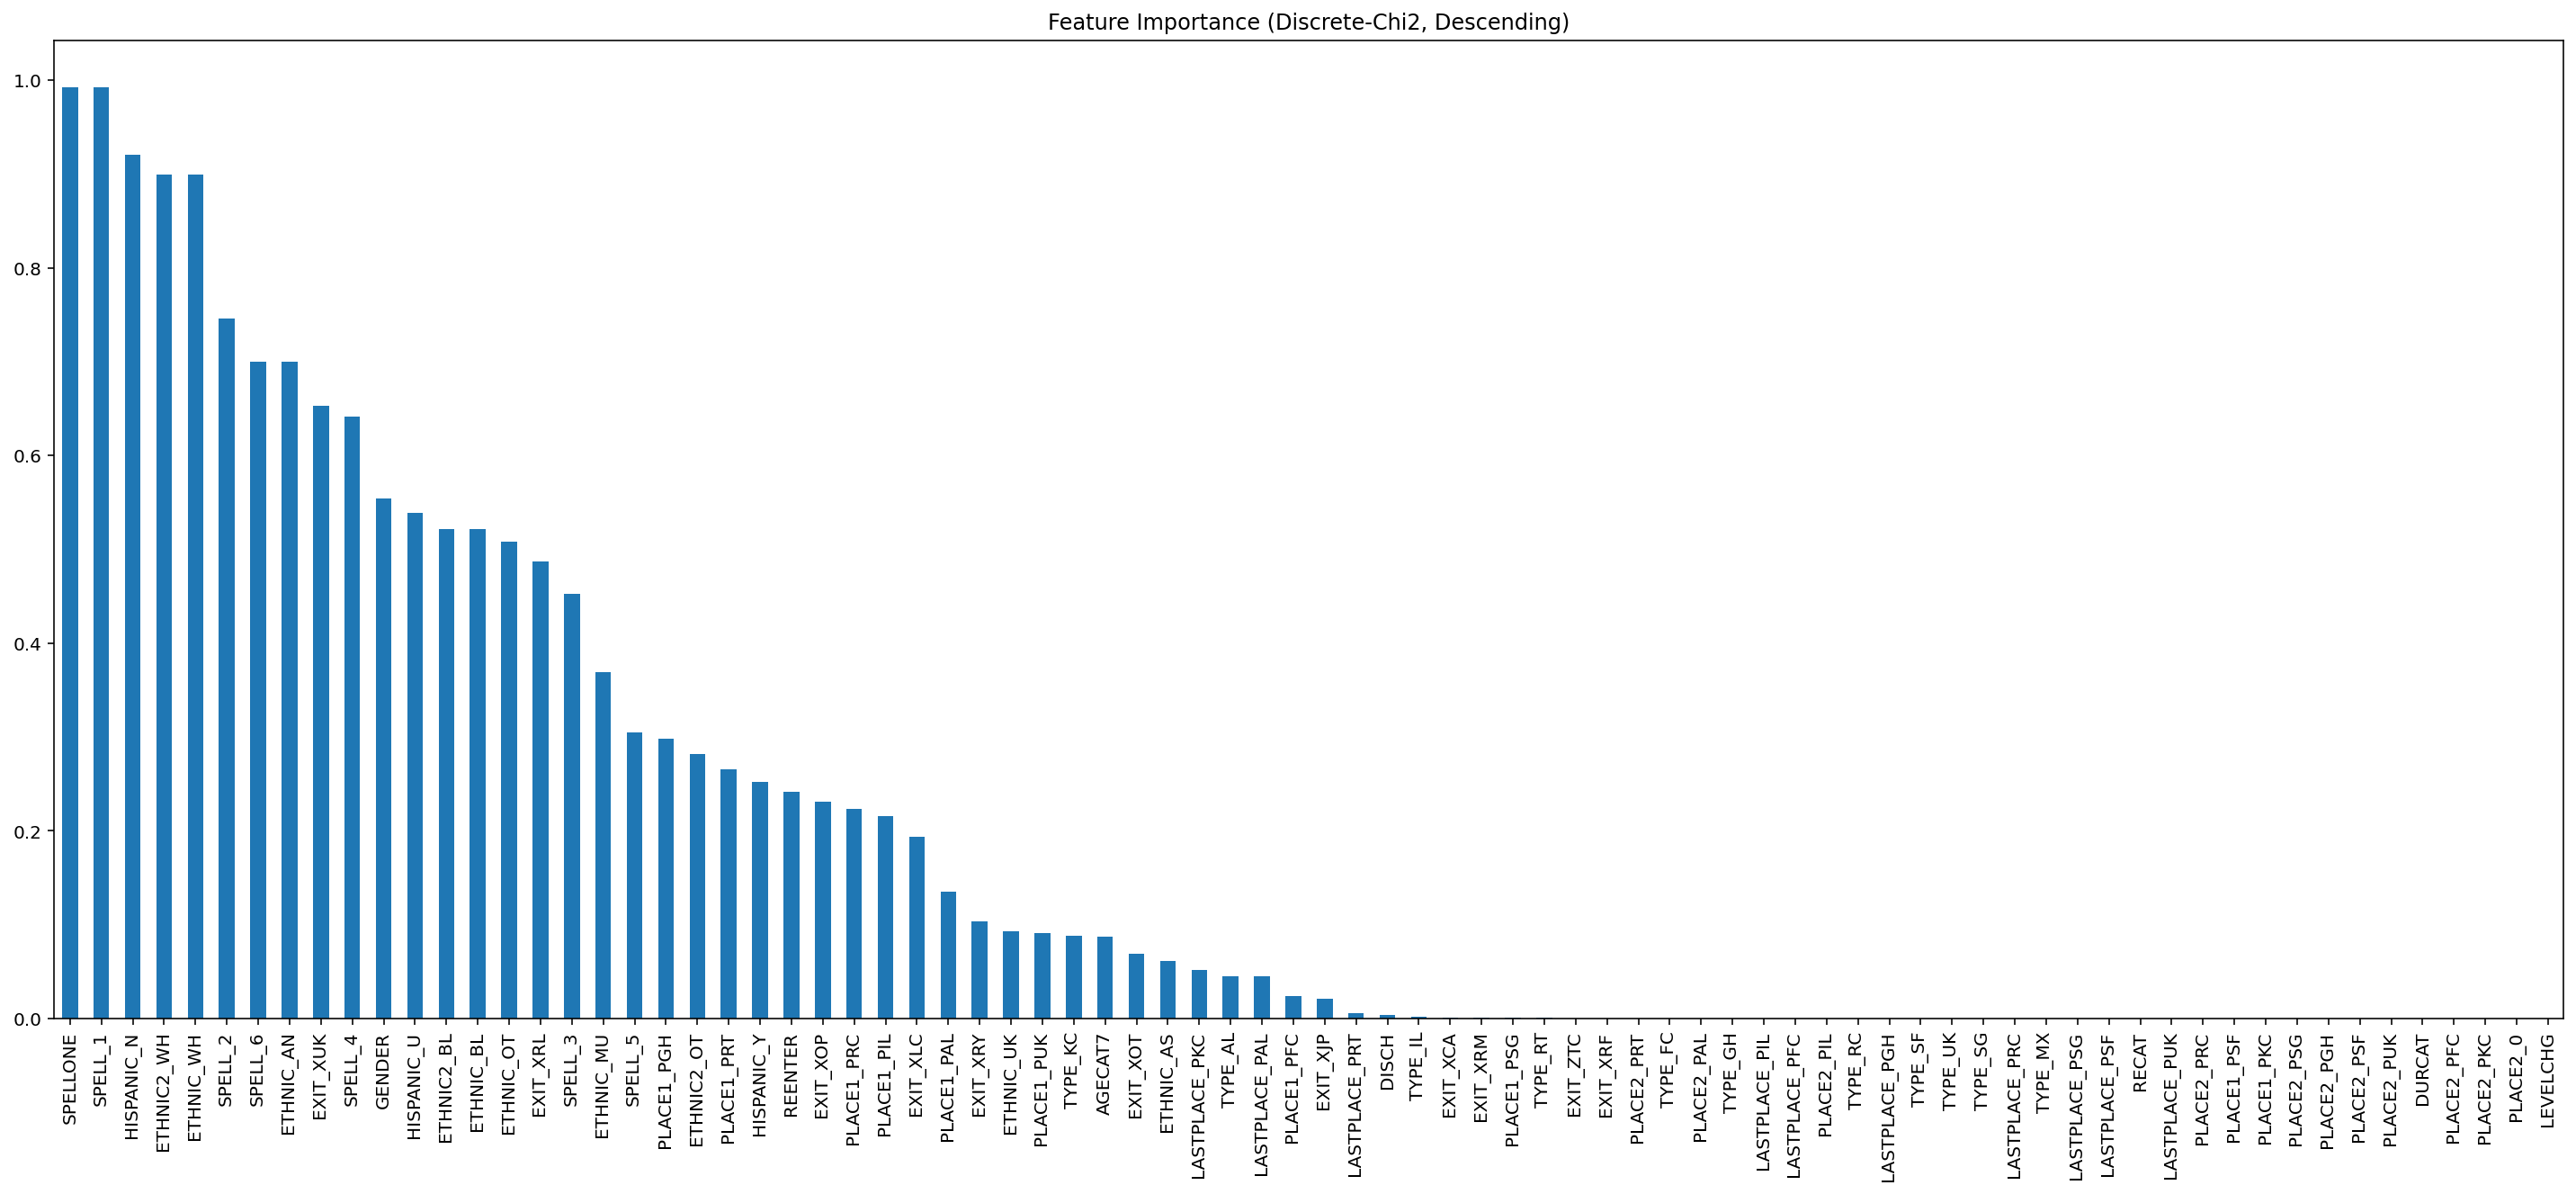

In [343]:
fig,ax = plt.subplots(figsize=(25,10))
order.plot.bar()
ax.set_title("Feature Importance (Discrete-Chi2, Descending)")

## 3.2 Numerical Features —— Pearson

In [344]:
data_df[raw_numerical_var]

AGE_20161231  SPELLAGE  NPLACES  MOVES  RUNS  DURAT      DURMO  First Spell Duration
0               20        17        1      0     0    117   3.836066                   117
1                7         4        1      0     0     60   1.967213                    60
2                3         0        1      0     0     53   1.737705                    53
3                6         4        1      0     0    939  30.786885                   939
4                5         2        1      0     0    939  30.786885                   939
...            ...       ...      ...    ...   ...    ...        ...                   ...
2844             2         2        2      1     0      5   0.163934                     5
2845            14        14        1      0     0      2   0.065574                     2
2846             5         5        1      0     0      2   0.065574                     2
2847             2         2        1      0     0      2   0.065574                     2
2848             2         2        1      0     0      2   0.065574                     2

[2849 rows x 8 columns]

In [345]:
from scipy.stats import pearsonr

In [346]:
def multivariate_pearsonr(X, y):
    corrs,pvalues = [],[]
    for column_i in range(X.shape[1]):
        corr,pvalue = pearsonr(X[:,column_i],y)
        corrs.append(abs(corr))
        pvalues.append(pvalue)
    return (np.array(corrs),np.array(pvalues))

In [348]:
selector_pearson = SelectKBest(multivariate_pearsonr, k='all')
selector_pearson.fit_transform(data_df[raw_numerical_var], data_df['Second Or Not'])

array([[2.00000000e+01, 1.70000000e+01, 1.00000000e+00, ...,
        1.17000000e+02, 3.83606557e+00, 1.17000000e+02],
       [7.00000000e+00, 4.00000000e+00, 1.00000000e+00, ...,
        6.00000000e+01, 1.96721312e+00, 6.00000000e+01],
       [3.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        5.30000000e+01, 1.73770492e+00, 5.30000000e+01],
       ...,
       [5.00000000e+00, 5.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 6.55737710e-02, 2.00000000e+00],
       [2.00000000e+00, 2.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 6.55737710e-02, 2.00000000e+00],
       [2.00000000e+00, 2.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 6.55737710e-02, 2.00000000e+00]])

Text(0.5, 1.0, 'Feature Importance (Continuous-Pearson, Descending)')

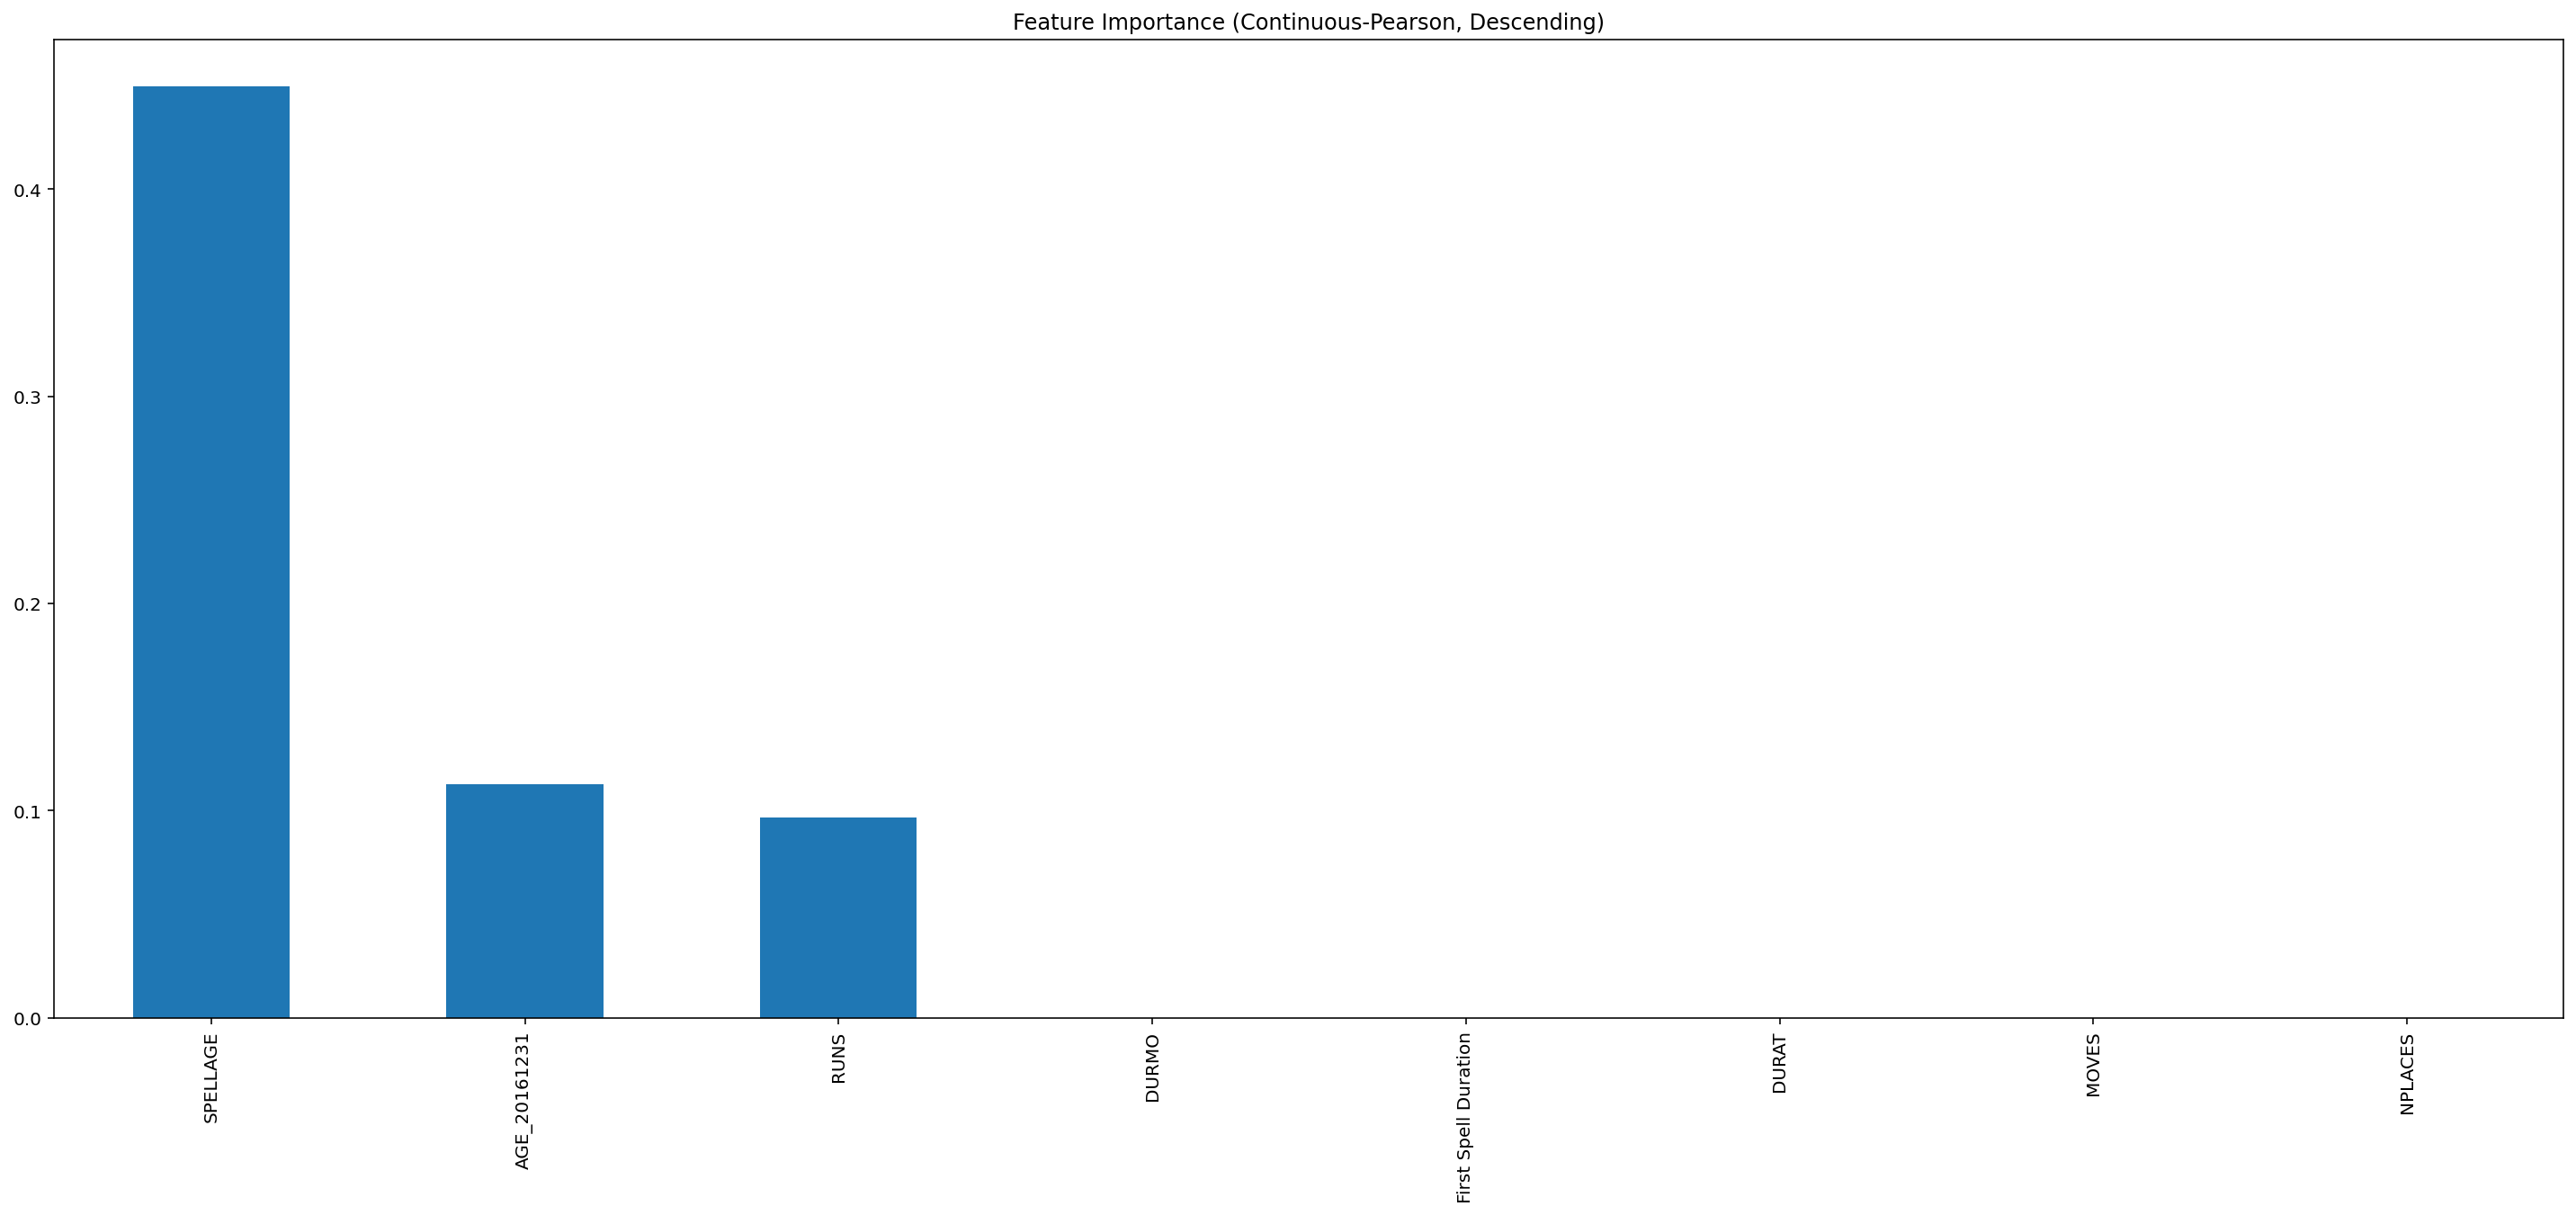

In [349]:
cols = selector_pearson.get_support(indices=True) #cols: boolean list for feature column selection 
                                  #selected feature column indices (indices = True)

col_ls = (selector_pearson.pvalues_).T.tolist()
feature_importance = pd.Series(col_ls,index = data_df[raw_numerical_var].columns)

order = feature_importance.map(lambda x:x).abs().sort_values(ascending = False)
order.to_dict()

fig,ax = plt.subplots(figsize=(25,10))
order.plot.bar()
ax.set_title("Feature Importance (Continuous-Pearson, Descending)")

# 4. Modeling——XGBoost

In [354]:
from sklearn.model_selection import train_test_split

In [382]:
PLACE2_features = []
import re
for feature in set(categ_var):
    p2 = re.findall('PLACE2.*',feature,re.IGNORECASE)
    if len(p2)==1:
        PLACE2_features+=p2
        

In [406]:
spell_features = []
import re
for feature in set(categ_var):
    p2 = re.findall('SPELL.*',feature,re.IGNORECASE)
    if len(p2)==1:
        spell_features+=p2

In [407]:
spell_features

['SPELLONE', 'SPELL_6', 'SPELL_2', 'SPELL_4', 'SPELL_1', 'SPELL_3', 'SPELL_5']

In [408]:
X = data_df[set(raw_numerical_var+categ_var)-set(PLACE2_features)-set(spell_features)]
y =data_df['Second Or Not']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [409]:
X.columns

Index(['DURAT', 'TYPE_AL', 'AGE_20161231', 'LASTPLACE_PFC', 'SPELLAGE', 'EXIT_XRY', 'NPLACES', 'First Spell Duration', 'EXIT_XJP', 'ETHNIC2_WH', 'RUNS', 'TYPE_KC', 'LASTPLACE_PIL', 'TYPE_RT', 'EXIT_ZTC', 'TYPE_GH', 'EXIT_XUK', 'TYPE_UK', 'LASTPLACE_PAL', 'TYPE_SG', 'PLACE1_PIL', 'PLACE1_PSF', 'PLACE1_PUK', 'LASTPLACE_PUK', 'HISPANIC_U', 'ETHNIC_UK', 'PLACE1_PAL', 'HISPANIC_Y', 'DISCH', 'AGECAT7', 'ETHNIC2_BL', 'ETHNIC_AN', 'TYPE_FC', 'ETHNIC_AS', 'LASTPLACE_PRT', 'TYPE_RC', 'PLACE1_PKC', 'TYPE_MX', 'EXIT_XRL', 'ETHNIC2_OT', 'PLACE1_PSG', 'LASTPLACE_PSF', 'EXIT_XLC', 'ETHNIC_MU', 'EXIT_XRM', 'TYPE_SF', 'EXIT_XOP', 'LEVELCHG', 'PLACE1_PFC', 'REENTER', 'PLACE1_PGH', 'ETHNIC_OT', 'EXIT_XRF', 'DURMO', 'RECAT', 'ETHNIC_WH', 'MOVES', 'LASTPLACE_PRC', 'TYPE_IL', 'EXIT_XOT', 'PLACE1_PRC', 'HISPANIC_N', 'ETHNIC_BL', 'EXIT_XCA', 'PLACE1_PRT', 'LASTPLACE_PGH', 'LASTPLACE_PSG', 'GENDER', 'LASTPLACE_PKC', 'DURCAT'], dtype='object')

In [410]:
from sklearn import preprocessing

In [411]:
min_max_scaler = preprocessing.MinMaxScaler()
scaler = min_max_scaler.fit(X_train)

In [412]:
scaler.data_max_

array([1.0890000e+03, 1.0000000e+00, 2.3000000e+01, 1.0000000e+00,
       2.0000000e+01, 1.0000000e+00, 9.0000000e+00, 1.0890000e+03,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 7.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 3.5704918e+01, 6.0000000e+00, 1.0000000e+00,
       8.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e

In [413]:
X_train = scaler.transform(X_train)

In [414]:
X_train

array([[6.43382353e-03, 0.00000000e+00, 4.78260870e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.88235294e-02, 0.00000000e+00, 8.69565217e-02, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e-01],
       [1.05698529e-01, 0.00000000e+00, 5.21739130e-01, ...,
        1.00000000e+00, 1.00000000e+00, 4.00000000e-01],
       ...,
       [9.19117647e-04, 0.00000000e+00, 7.39130435e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.44485294e-02, 0.00000000e+00, 4.34782609e-01, ...,
        0.00000000e+00, 1.00000000e+00, 2.00000000e-01],
       [4.22794118e-02, 0.00000000e+00, 8.69565217e-02, ...,
        0.00000000e+00, 1.00000000e+00, 2.00000000e-01]])

In [415]:
X_test = scaler.transform(X_test)

In [416]:
X_test

array([[0.03308824, 0.        , 0.7826087 , ..., 1.        , 1.        ,
        0.2       ],
       [0.28033088, 0.        , 0.17391304, ..., 0.        , 0.        ,
        0.6       ],
       [0.26838235, 0.        , 0.60869565, ..., 1.        , 0.        ,
        0.6       ],
       ...,
       [0.13143382, 0.        , 0.60869565, ..., 1.        , 0.        ,
        0.4       ],
       [0.79595588, 0.        , 0.73913043, ..., 0.        , 1.        ,
        1.        ],
       [0.08639706, 0.        , 0.13043478, ..., 0.        , 1.        ,
        0.4       ]])

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

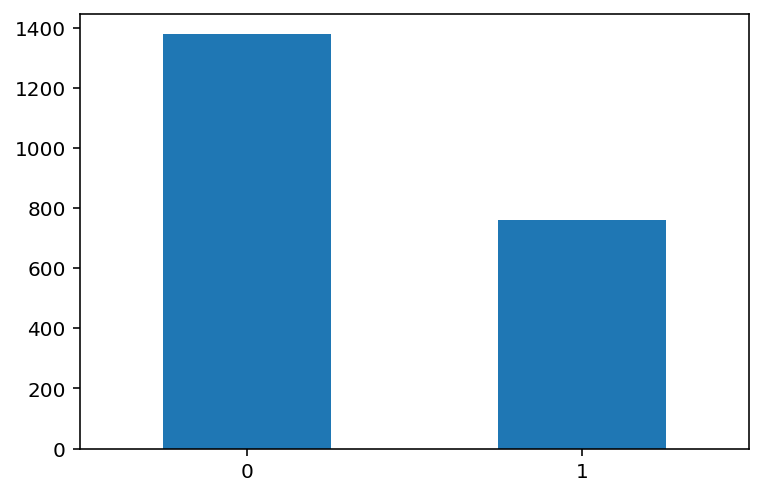

In [417]:
y_train.value_counts().plot(kind = 'bar')
plt.xticks(rotation =0)

In [418]:
import xgboost as xgb
from xgboost import XGBClassifier

In [419]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, recall_score,precision_score, roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [420]:
def xgboost(X_train,X_test,y_train,y_test):
    xgbc= xgb.XGBClassifier(objective="binary:logistic", random_state=42)
    param_grid = {'eta':[0.01,0.05,0.10,0.15,0.20,0.25,0.3],
                  'min_child_weight':uniform(0,5),
                  'max_depth':range(1,15),
                  'gamma':uniform(0,0.1),
                 'subsample':uniform(0.1,1),
                 'colsample_bytree':uniform(0,1),
                 'lambda':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000],
                 'alpha':[0.001,0.01,0.1,1,10,100,1000]}
    scores = ['accuracy','f1','recall']

    fig, ax = plt.subplots(3, 2,figsize = (40,30))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

    count = 1
    for sc in scores:
        grid=RandomizedSearchCV(estimator = xgbc, param_distributions = param_grid,scoring = sc)
        print("# Tuning hyper-parameters for %s" % sc)
        grid.fit(X_train,y_train)
        print(grid.best_params_)
        xgbc = grid.best_estimator_   
        y_pred_xgbc = xgbc.predict(X_test)
        y_pred_xgbc_pos_proba = xgbc.predict_proba(X_test)[:,1]
        

        print('accuracy = ',accuracy_score(y_test,y_pred_xgbc))
        print('f1_score = ',f1_score(y_test,y_pred_xgbc))
        print('recall = ',recall_score(y_test,y_pred_xgbc))
        print('precision = ',precision_score(y_test,y_pred_xgbc))
        
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgbc_pos_proba, pos_label=1)
        auc1 = np.trapz(recall, precision)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgbc, pos_label=1)
        auc2 = np.trapz(tpr, fpr)
        plt.subplot(3, 3, count)
        plt.plot(precision, recall, linestyle='-', alpha=0.5, color= "C0", label = 'PRC AUC='+"%.2f"%auc1) 
        plt.legend(title = 'PR-Curve for xgboost')
        plt.title("PR Curve")
        plt.xlabel("precision")
        plt.ylabel("recall")
        
        plt.subplot(3, 3, count+1)
        plt.plot(fpr, tpr, linestyle='-', alpha=0.5, color= "C1", label = 'ROC AUC='+"%.2f"%auc2)   
        plt.legend(title = 'ROC for xgboost')
        plt.title("ROC Curve")
        plt.xlabel('FPR')
        plt.ylabel('TPR')
 


        plt.subplot(3, 3, count+2)
        mat = confusion_matrix(y_test,y_pred_xgbc)
        sns.heatmap(mat.T, square=True, annot=True, cbar=False,
                xticklabels=[0,1],
                yticklabels=[0,1])
        plt.xlabel('true label')
        plt.ylabel('predicted label')
        plt.title(sc)
        count+=3

# Tuning hyper-parameters for accuracy


C:\Users\Yunge Li\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value 1.03077 for Parameter subsample exceed bound [0,1]
subsample: Row subsample ratio of training instance.

  FitFailedWarning)
C:\Users\Yunge Li\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value 1.09504 for Parameter subsample exceed bound [0,1]
subsample: Row subsample ratio of training instance.

  FitFailedWarning)


{'alpha': 100, 'colsample_bytree': 0.6854352338908086, 'eta': 0.25, 'gamma': 0.042770558457588786, 'lambda': 1000, 'max_depth': 4, 'min_child_weight': 3.0745648040945204, 'subsample': 0.49875523330218385}
accuracy =  0.9985974754558204
f1_score =  0.9982788296041308
recall =  0.9965635738831615
precision =  1.0
# Tuning hyper-parameters for f1
{'alpha': 0.001, 'colsample_bytree': 0.8323825740237927, 'eta': 0.2, 'gamma': 0.07672337358153125, 'lambda': 0.0001, 'max_depth': 10, 'min_child_weight': 1.565013197350385, 'subsample': 0.6374880477385064}
accuracy =  0.9985974754558204
f1_score =  0.9982788296041308
recall =  0.9965635738831615
precision =  1.0
# Tuning hyper-parameters for recall


C:\Users\Yunge Li\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value 1.08825 for Parameter subsample exceed bound [0,1]
subsample: Row subsample ratio of training instance.

  FitFailedWarning)
C:\Users\Yunge Li\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value 1.02163 for Parameter subsample exceed bound [0,1]
subsample: Row subsample ratio of training instance.

  FitFailedWarning)
C:\Users\Yunge Li\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostErro

{'alpha': 0.1, 'colsample_bytree': 0.944966911344328, 'eta': 0.3, 'gamma': 0.06261631059900256, 'lambda': 1000, 'max_depth': 12, 'min_child_weight': 0.22864404860295395, 'subsample': 0.8382690108108157}
accuracy =  0.9985974754558204
f1_score =  0.9982788296041308
recall =  0.9965635738831615
precision =  1.0


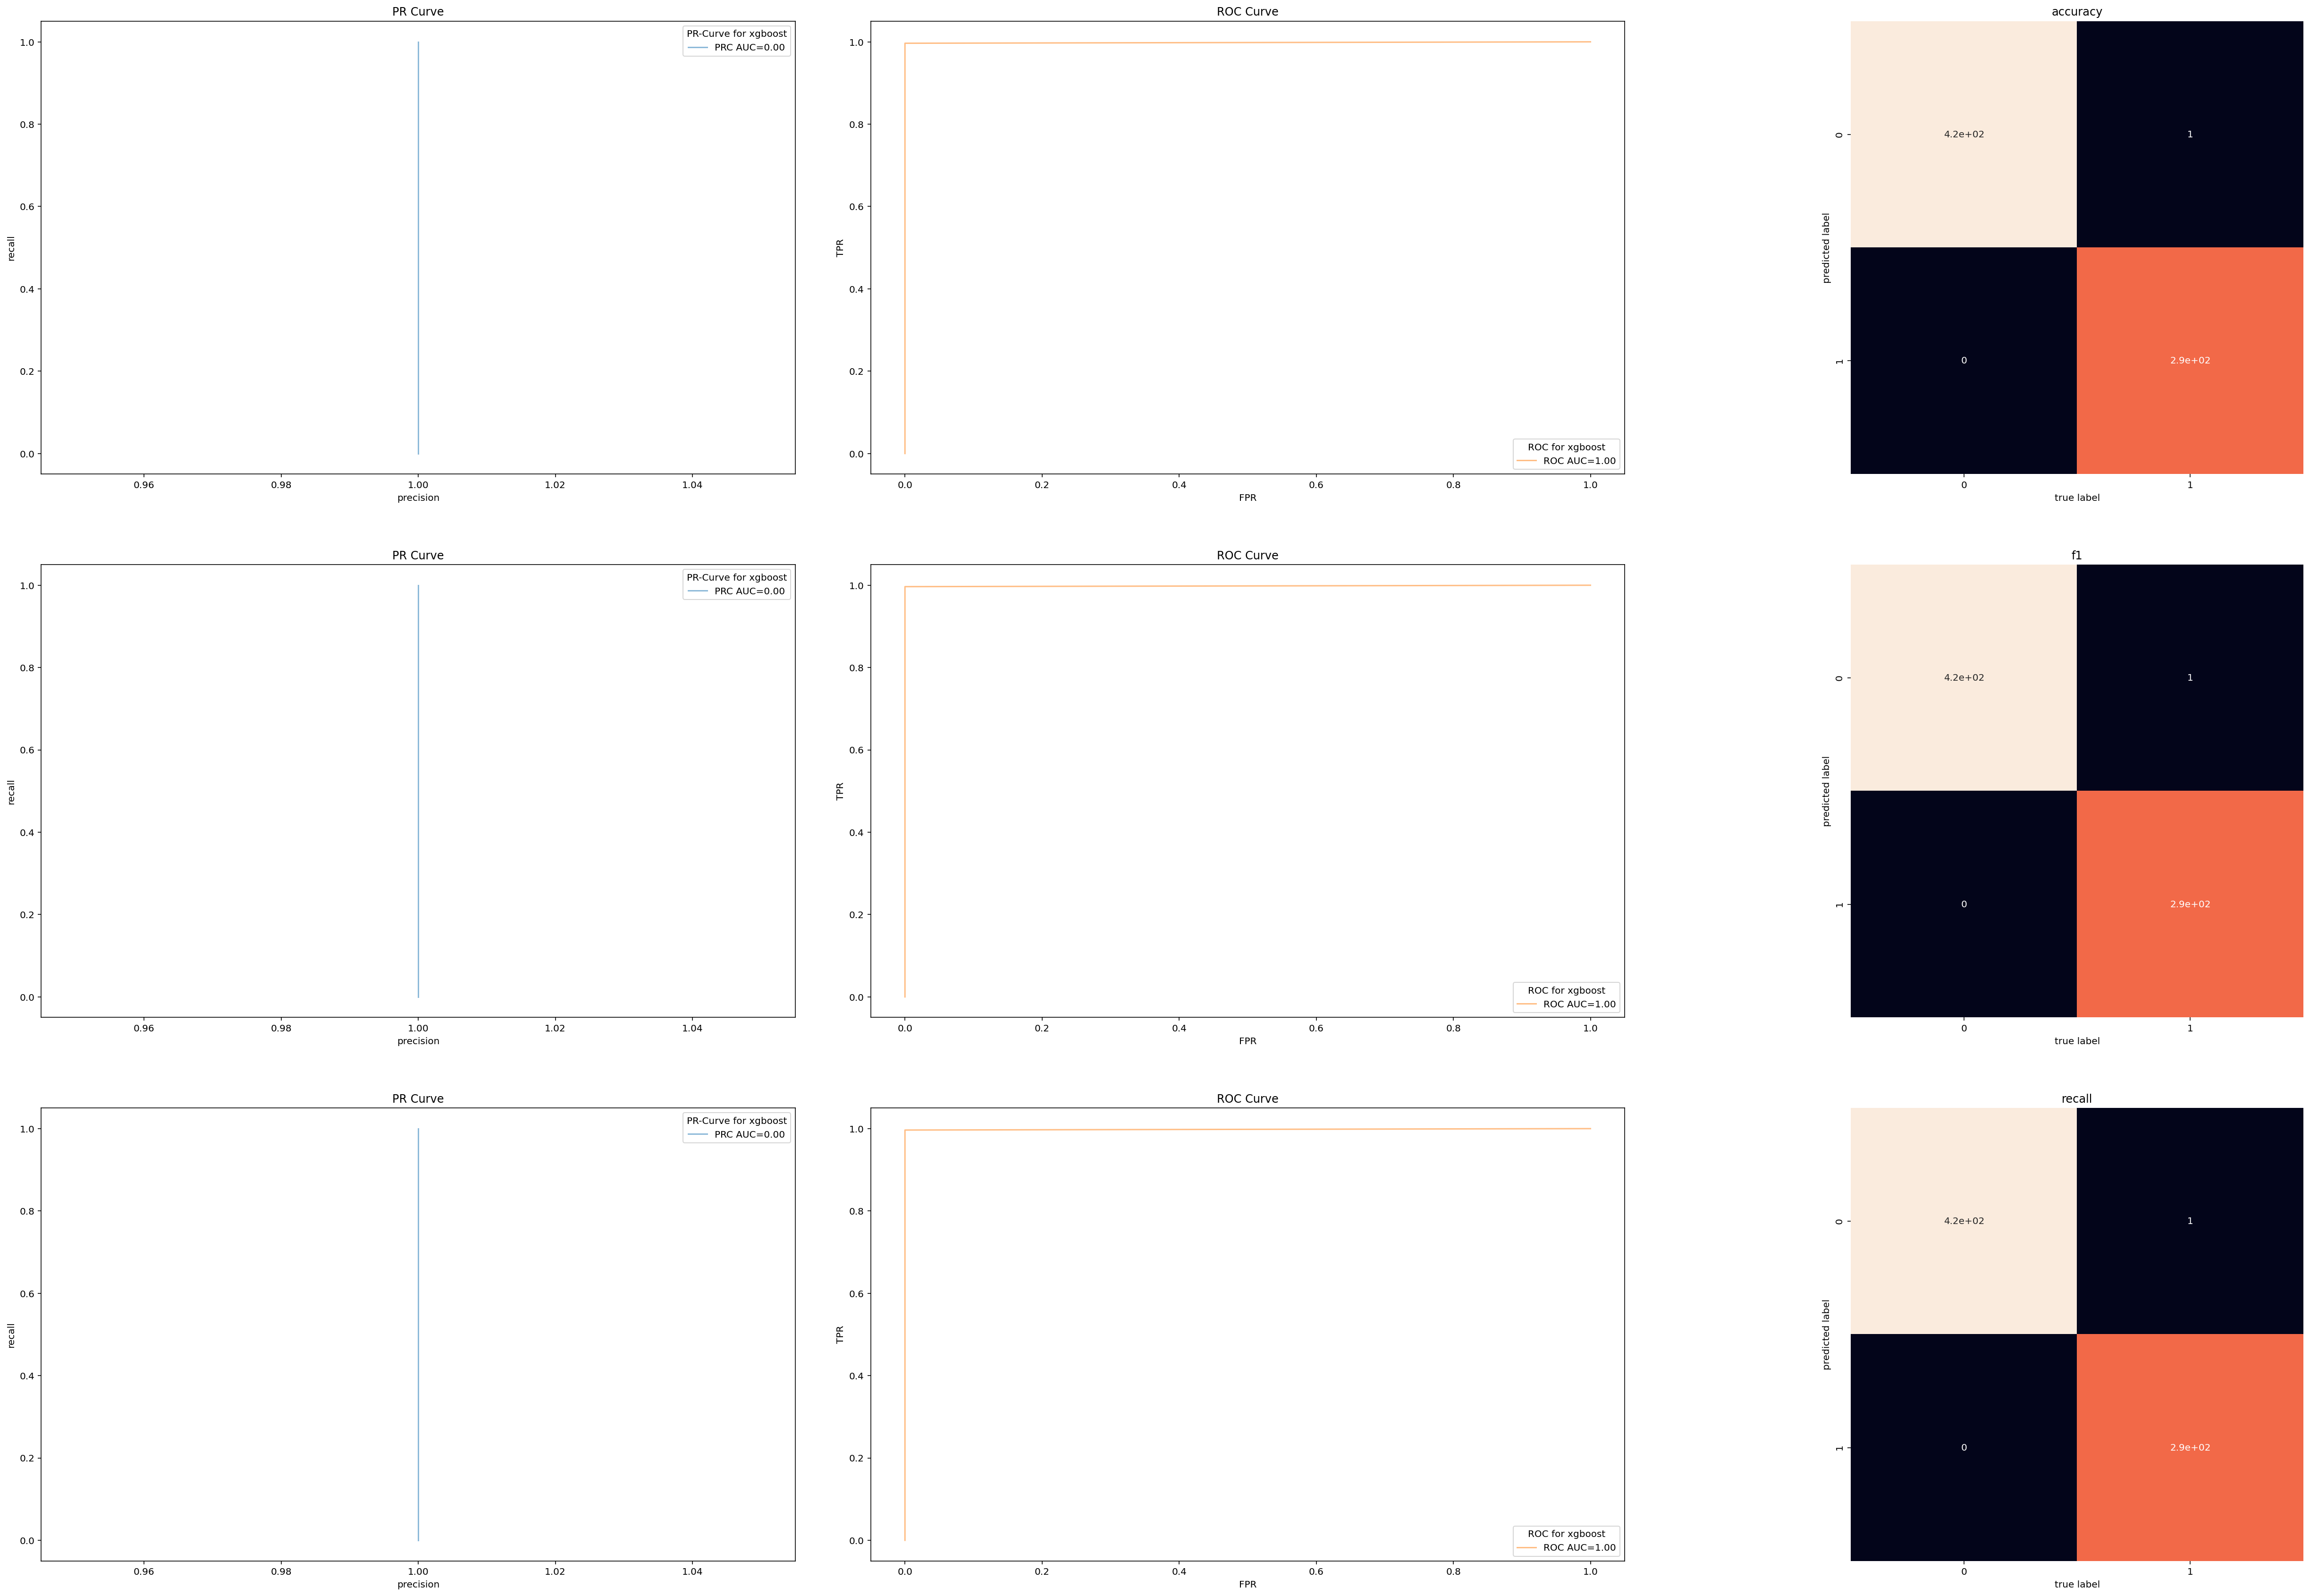

In [421]:
xgboost(X_train, X_test, y_train, y_test)